# Mice Protein Dataset

The aim of this project is to assess if it is possible to accurately calssify the genotype, treatments and  from  the expression levels of 77 proteins. These proteins are 

In [1]:
#Import the necessary packages 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize

pd.options.display.max_rows = 50000
#Above code to print out entire value_counts list 
#https://stackoverflow.com/questions/43909817/how-to-stop-jupyter-outputting-truncated-results-when-using-pd-series-val
pd.set_option('display.max_columns', None)
#https://stackoverflow.com/questions/22235245/calculate-summary-statistics-of-columns-in-dataframe

In [2]:
#To get the current file directory
import os
os.path.abspath(os.getcwd())
#https://stackoverflow.com/questions/3430372/how-do-i-get-the-full-path-of-the-current-files-directory

'/Users/stephaniechoo/Desktop/Case Studies /Task 1 Genetic'

In [3]:
Mice_df='/Users/stephaniechoo/Desktop/Case Studies /Task 1 Genetic/Data_Cortex_Nuclear.xls'

In [4]:
Mice= pd.read_excel(Mice_df)

In [5]:
Mice.head(200)

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0      309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1      309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2      309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3      309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4      309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   
5      309_6  0.447506  0.628176  0.367388  2.385939  4.807635  0.218578   
6      309_7  0.428033  0.573696  0.342709  2.334224  4.473130  0.225173   
7      309_8  0.416923  0.564036  0.327703  2.260135  4.268735  0.214834   
8      309_9  0.386311  0.538428  0.317720  2.125725  4.063950  0.207222   
9     309_10  0.380827  0.499294  0.362462  2.096266  3.598587  0.227649   
10    309_11  0.366511  0.513278  0.327792  2.072572  3.661058  0.229475   
11    309_12  0.364154  0.499411  0.355124  2.006871  3.466627  0.216333   
12    309_13  0.364873  0.482102  0.312539  1.946201  3.349592  0.230898   
13    309_14  0.381911  0.485914  0.310951  1.958907  3.349290  0.225800   
14    309_15  0.374410  0.462313  0.344629  1.861162  3.287123  0.221811   
15     311_1  0.743118  0.862653  0.377742  2.735757  6.067570  0.219049   
16     311_2  0.711480  0.807054  0.351591  2.546888  5.595574  0.199170   
17     311_3  0.704633  0.802537  0.350110  2.467733  5.548400  0.205323   
18     311_4  0.677359  0.770235  0.356397  2.563223  4.975196  0.228087   
19     311_5  0.591572  0.678768  0.312480  2.164182  4.313938  0.195786   
20     311_6  0.618517  0.716672  0.319701  2.285938  4.571180  0.206927   
21     311_7  0.702608  0.699581  0.387750  2.437587  4.449231  0.258500   
22     311_8  0.598869  0.690271  0.349774  2.308371  4.229412  0.221493   
23     311_9  0.561867  0.641892  0.308488  2.157728  4.020693  0.216427   
24    311_10  0.550970  0.561356  0.320853  2.197868  3.558896  0.237770   
25    311_11  0.538413  0.701865  0.384445  2.482137  4.109706  0.288018   
26    311_12  0.521127  0.583045  0.304279  2.053415  3.381345  0.251661   
27    311_13  0.488372  0.540086  0.291310  1.913403  2.873623  0.215422   
28    311_14  0.514855  0.564791  0.316056  1.957016  2.978824  0.250632   
29    311_15  0.485100  0.556375  0.287250  1.892166  2.847005  0.223041   
30     320_1  0.627582  0.954187  0.446958  2.930717  5.915039  0.197897   
31     320_2  0.651253  0.962021  0.464964  2.992689  5.975028  0.202810   
32     320_3  0.644346  0.967179  0.470056  3.073847  5.927379  0.205131   
33     320_4  0.568229  0.812018  0.393465  2.606780  5.808102  0.218211   
34     320_5  0.587038  0.863728  0.411203  2.757975  6.006657  0.223688   
35     320_6  0.595904  0.861763  0.421204  2.831169  6.368257  0.233017   
36     320_7  0.522918  0.721090  0.363541  2.456261  5.191732  0.229179   
37     320_8  0.530855  0.748072  0.385529  2.573126  5.495063  0.237427   
38     320_9  0.534999  0.773863  0.391588  2.667701  5.987583  0.246624   
39    320_10  0.519443  0.736371  0.370568  2.503050  4.947198  0.266489   
40    320_11  0.508590  0.735699  0.384369  2.545403  5.101001  0.257127   
41    320_12  0.516538  0.737479  0.383670  2.624646  5.601210  0.259119   
42    320_13  0.454421  0.685278  0.360301  2.392890  4.500000  0.278715   
43    320_14  0.471746  0.697323  0.371540  2.472661  4.652025  0.278197   
44    320_15  0.481273  0.684116  0.360785  2.538809  5.008123  0.287229   
45     321_1  0.560614  0.763028  0.402962  2.933516  6.317279  0.192320   
46     321_2  0.516108  0.749622  0.401297  2.919243  6.306811  0.192541   
47     321_3  0.507321  0.770026  0.417959  2.925818  6.766150  0.201012   
48     321_4  0.505093  0.695549  0.376029  2.915585  5.917957  0.226734   
49     321_5  0.479120  0.689170  0.381125  2.913558  6.066537  0.221882   
50     321_6  0.457992  0.703492  0.385843  2.904392  6.318467  0.216858   
51     321_7  0.420542  0.622951  0.342757  2.635162 

In [6]:
Mice.dtypes

MouseID             object
DYRK1A_N           float64
ITSN1_N            float64
BDNF_N             float64
NR1_N              float64
NR2A_N             float64
pAKT_N             float64
pBRAF_N            float64
pCAMKII_N          float64
pCREB_N            float64
pELK_N             float64
pERK_N             float64
pJNK_N             float64
PKCA_N             float64
pMEK_N             float64
pNR1_N             float64
pNR2A_N            float64
pNR2B_N            float64
pPKCAB_N           float64
pRSK_N             float64
AKT_N              float64
BRAF_N             float64
CAMKII_N           float64
CREB_N             float64
ELK_N              float64
ERK_N              float64
GSK3B_N            float64
JNK_N              float64
MEK_N              float64
TRKA_N             float64
RSK_N              float64
APP_N              float64
Bcatenin_N         float64
SOD1_N             float64
MTOR_N             float64
P38_N              float64
pMTOR_N            float64
D

In [7]:
#Checking for null vlaues in each column, indicating proteins
Mice.isnull().sum()

MouseID              0
DYRK1A_N             3
ITSN1_N              3
BDNF_N               3
NR1_N                3
NR2A_N               3
pAKT_N               3
pBRAF_N              3
pCAMKII_N            3
pCREB_N              3
pELK_N               3
pERK_N               3
pJNK_N               3
PKCA_N               3
pMEK_N               3
pNR1_N               3
pNR2A_N              3
pNR2B_N              3
pPKCAB_N             3
pRSK_N               3
AKT_N                3
BRAF_N               3
CAMKII_N             3
CREB_N               3
ELK_N               18
ERK_N                3
GSK3B_N              3
JNK_N                3
MEK_N                7
TRKA_N               3
RSK_N                3
APP_N                3
Bcatenin_N          18
SOD1_N               3
MTOR_N               3
P38_N                3
pMTOR_N              3
DSCR1_N              3
AMPKA_N              3
NR2B_N               3
pNUMB_N              3
RAPTOR_N             3
TIAM1_N              3
pP70S6_N   

In [8]:
# counting null values by row (replicate)
Mice.isnull().sum(axis=1)

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
30       1
31       1
32       1
33       1
34       1
35       1
36       1
37       1
38       1
39       1
40       1
41       1
42       1
43       1
44       1
45       3
46       3
47       3
48       3
49       3
50       3
51       3
52       3
53       3
54       3
55       3
56       3
57       3
58       3
59       3
60       4
61       4
62       4
63       4
64       4
65       4
66       4
67       4
68       4
69       4
70       4
71       4
72       4
73       4
74       4
75       0
76       0
77       0
78       0
79       0
80       0
81       0
82       0
83       0
84       0
85       0
86       0
87       0
88       0
89       0
90       0

In [9]:
Mice_raw = pd.DataFrame(Mice)

In [10]:
proteins = Mice_raw.columns[1:77]
print(proteins)

Index(['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N',
       'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N'],
      dtype='object')


Split the data set to drop the mouse ID and to split the mouseID into MouseName and Mouse_Test into 2 different columns

In [11]:
Mice_raw[['MouseName','Mouse_Test']] = Mice_raw.MouseID.str.split("_",expand=True)
Mice_raw.drop(['MouseID'], axis=1, inplace=True)
Mice_raw.head()

#Reference https://www.geeksforgeeks.org/split-a-text-column-into-two-columns-in-pandas-dataframe/

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   

   pCAMKII_N   pCREB_N    pELK_N    pERK_N    pJNK_N    PKCA_N    pMEK_N  \
0   2.373744  0.232224  1.750936  0.687906  0.306382  0.402698  0.296927   
1   2.292150  0.226972  1.596377  0.695006  0.299051  0.385987  0.281319   
2   2.283337  0.230247  1.561316  0.677348  0.291276  0.381002  0.281710   
3   2.152301  0.207004  1.595086  0.583277  0.296729  0.377087  0.313832   
4   2.134014  0.192158  1.504230  0.550960  0.286961  0.363502  0.277964   

     pNR1_N   pNR2A_N   pNR2B_N  pPKCAB_N    pRSK_N     AKT_N    BRAF_N  \
0  1.022060  0.605673  1.877684  2.308745  0.441599  0.859366  0.416289   
1  0.956676  0.587559  1.725774  2.043037  0.445222  0.834659  0.400364   
2  1.003635  0.602449  1.731873  2.017984  0.467668  0.814329  0.399847   
3  0.875390  0.520293  1.566852  2.132754  0.477671  0.727705  0.385639   
4  0.864912  0.507990  1.480059  2.013697  0.483416  0.687794  0.367531   

   CAMKII_N    CREB_N     ELK_N     ERK_N   GSK3B_N     JNK_N     MEK_N  \
0  0.369608  0.178944  1.866358  3.685247  1.537227  0.264526  0.319677   
1  0.356178  0.173680  1.761047  3.485287  1.509249  0.255727  0.304419   
2  0.368089  0.173905  1.765544  3.571456  1.501244  0.259614  0.311747   
3  0.362970  0.179449  1.286277  2.970137  1.419710  0.259536  0.279218   
4  0.355311  0.174836  1.324695  2.896334  1.359876  0.250705  0.273667   

     TRKA_N     RSK_N     APP_N  Bcatenin_N    SOD1_N    MTOR_N     P38_N  \
0  0.813866  0.165846  0.453910    3.037621  0.369510  0.458539  0.335336   
1  0.780504  0.157194  0.430940    2.921882  0.342279  0.423560  0.324835   
2  0.785154  0.160895  0.423187    2.944136  0.343696  0.425005  0.324852   
3  0.734492  0.162210  0.410615    2.500204  0.344509  0.429211  0.330121   
4  0.702699  0.154827  0.398550    2.456560  0.329126  0.408755  0.313415   

    pMTOR_N   DSCR1_N   AMPKA_N    NR2B_N   pNUMB_N  RAPTOR_N   TIAM1_N  \
0  0.825192  0.576916  0.448099  0.586271  0.394721  0.339571  0.482864   
1  0.761718  0.545097  0.420876  0.545097  0.368255  0.321959  0.454519   
2  0.757031  0.543620  0.404630  0.552994  0.363880  0.313086  0.447197   
3  0.746980  0.546763  0.386860  0.547849  0.366771  0.328492  0.442650   
4  0.691956  0.536860  0.360816  0.512824  0.351551  0.312206  0.419095   

   pP70S6_N    NUMB_N   P70S6_N  pGSK3B_N   pPKCG_N    CDK5_N      S6_N  \
0  0.294170  0.182150  0.842725  0.192608  1.443091  0.294700  0.354605   
1  0.276431  0.182086  0.847615  0.194815  1.439460  0.294060  0.354548   
2  0.256648  0.184388  0.856166  0.200737  1.524364  0.301881  0.386087   
3  0.398534  0.161768  0.760234  0.184169  1.612382  0.296382  0.290680   
4  0.393447  0.160200  0.768113  0.185718  1.645807  0.296829  0.309345   

   ADARB1_N  AcetylH3K9_N    RRP1_N     BAX_N     ARC_N   ERBB4_N    nNOS_N  \
0  1.339070      0.170119  0.159102  0.188852  0.106305  0.144989  0.176668   
1  1.306323      0.171427  0.158129  0.184570  0.106592  0.150471  0.178309   
2  1.279600      0.185456  0.148696  0.190532  0.108303  0.145330  0.176213   
3  1.198765      0.159799  0.166112  0.185323  0.103184  0.140656  0.163804   
4  1.206995      0.164650  0.160687  0.188221  0.104784  0.141983  0.167710   

      Tau_N    GFAP_N   GluR3_N   GluR4_N    IL1B_N   P3525_N  pCASP9_N  \
0  0.125190  0.115291  0.228043  0.142756  0.430957  0.247538  1.603310   
1  0.134275  0.118235  0.238073  0.142037  0.457156  0.257632  1.671738   
2  0.132560  0.117760  0.244817  0.142445  0.510472  0.255343  1.663550   
3  0.123210  0.117439  0.234947  0.145068  0.430996  

In [12]:
mean_mouse_protein_values = Mice_raw.groupby(by=['class']).mean().reset_index()
mean_mouse_protein_values

class  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0  c-CS-m  0.480456  0.652587  0.339217  2.381749  4.308540  0.229932   
1  c-CS-s  0.596748  0.772395  0.342315  2.417809  4.280077  0.212423   
2  c-SC-m  0.273203  0.436361  0.290946  2.145633  3.459416  0.241253   
3  c-SC-s  0.274823  0.449354  0.313393  2.404974  3.913096  0.233368   
4  t-CS-m  0.619294  0.797007  0.312732  2.196541  3.565960  0.213621   
5  t-CS-s  0.525735  0.759556  0.305460  2.184606  3.514839  0.214466   
6  t-SC-m  0.329861  0.566783  0.321063  2.379446  4.056223  0.269131   
7  t-SC-s  0.337488  0.549056  0.325586  2.248742  3.565093  0.246759   

    pBRAF_N  pCAMKII_N   pCREB_N    pELK_N    pERK_N    pJNK_N    PKCA_N  \
0  0.182211   2.916187  0.198484  1.492318  0.690865  0.321124  0.339926   
1  0.168356   2.935576  0.208439  1.686844  0.821656  0.284451  0.352651   
2  0.189547   4.736327  0.208149  1.278566  0.354403  0.338879  0.289561   
3  0.184975   3.361288  0.214949  1.327714  0.325854  0.309990  0.289603   
4  0.173956   3.121801  0.203395  1.563905  0.800128  0.277222  0.320117   
5  0.164795   2.488902  0.210041  1.518302  0.695171  0.300348  0.309610   
6  0.201007   4.277257  0.231789  1.381516  0.355569  0.351000  0.315559   
7  0.185318   4.176555  0.227165  1.204840  0.357748  0.318552  0.325517   

     pMEK_N    pNR1_N   pNR2A_N   pNR2B_N  pPKCAB_N    pRSK_N     AKT_N  \
0  0.268076  0.860465  0.682172  1.590753  1.695686  0.440096  0.699964   
1  0.256976  0.856397  0.703243  1.597616  2.028768  0.436652  0.643662   
2  0.286072  0.801377  0.901992  1.543803  1.155948  0.433865  0.649769   
3  0.276365  0.871028  0.776878  1.647015  1.203349  0.424304  0.778791   
4  0.251732  0.771546  0.561772  1.446360  1.689740  0.460781  0.584380   
5  0.251742  0.764615  0.644308  1.517849  1.759352  0.417680  0.639801   
6  0.313569  0.862090  0.838412  1.703787  1.204387  0.444946  0.763324   
7  0.290446  0.803759  0.672640  1.434728  1.539916  0.481016  0.690595   

     BRAF_N  CAMKII_N    CREB_N     ELK_N     ERK_N   GSK3B_N     JNK_N  \
0  0.425950  0.366928  0.177160  1.242596  2.857310  1.286822  0.253813   
1  0.531708  0.367871  0.177622  1.292778  2.864710  1.353292  0.237929   
2  0.264466  0.358820  0.184114  1.036840  2.038041  1.011697  0.230180   
3  0.267661  0.372599  0.177101  1.230394  2.360867  1.013919  0.240210   
4  0.537919  0.328819  0.177874  1.062654  2.293750  1.278817  0.241337   
5  0.436721  0.347577  0.164867  1.235538  2.698129  1.233462  0.232430   
6  0.295295  0.403983  0.195159  1.157687  2.368126  1.105502  0.252214   
7  0.286726  0.356708  0.186668  1.163038  2.368296  1.114735  0.242942   

      MEK_N    TRKA_N     RSK_N     APP_N  Bcatenin_N    SOD1_N    MTOR_N  \
0  0.271238  0.725980  0.166172  0.396652    2.150045  0.330741  0.477525   
1  0.277688  0.705535  0.167997  0.389920    2.228780  0.324796  0.444154   
2  0.261075  0.618626  0.168916  0.350869    1.970838  0.620829  0.460957   
3  0.272528  0.683304  0.169822  0.361185    2.255591  0.856040  0.482234   
4  0.259008  0.689220  0.161129  0.434264    2.037305  0.307775  0.398091   
5  0.262884  0.707482  0.159008  0.441516    1.996940  0.315751  0.388220   
6  0.289777  0.723651  0.182349  0.439771    2.296538  0.832168  0.489528   
7  0.287866  0.699600  0.170080  0.440132    2.236363  0.721386  0.461150   

      P38_N   pMTOR_N   DSCR1_N   AMPKA_N    NR2B_N   pNUMB_N  RAPTOR_N  \
0  0.403777  0.761019  0.595234  0.394016  0.593412  0.410888  0.327668   
1  0.366260  0.734667  0.573343  0.393681  0.555874  0.397125  0.321985   
2  0.482767  0.828520  0.595682  0.364389  0.575470  0.333277  0.324069   
3  0.463736  0.789227  0.560641  0.366398  0.596926  0.295666  0.307209   
4  0.347339  0.663549  0.547146  0.328300  0.506393  0.337797  0.279186   
5  0.308928  0.639788  0.548544  0.332448  0.469835  0.363572  0.272255   
6  0.494494  0.882688  0.661501  0.391234  0.627915  0.358811  0.355510   
7  0.425558  0.

Created a function to fill in average of each class into the null values belonging to that class. 

In [13]:
proteins = Mice_raw.columns[0:77]
print(proteins)

Index(['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N',
       'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N'],
      dtype='object')


For filling all the NA values by their group's average. 
https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group

Then checking if there are any null values left. 

In [14]:
for p in proteins: 
    Mice_raw[p] = Mice_raw[p].fillna(Mice_raw.groupby('class')[p].transform('mean'))

In [15]:
Mice_raw.isnull().sum()

DYRK1A_N           0
ITSN1_N            0
BDNF_N             0
NR1_N              0
NR2A_N             0
pAKT_N             0
pBRAF_N            0
pCAMKII_N          0
pCREB_N            0
pELK_N             0
pERK_N             0
pJNK_N             0
PKCA_N             0
pMEK_N             0
pNR1_N             0
pNR2A_N            0
pNR2B_N            0
pPKCAB_N           0
pRSK_N             0
AKT_N              0
BRAF_N             0
CAMKII_N           0
CREB_N             0
ELK_N              0
ERK_N              0
GSK3B_N            0
JNK_N              0
MEK_N              0
TRKA_N             0
RSK_N              0
APP_N              0
Bcatenin_N         0
SOD1_N             0
MTOR_N             0
P38_N              0
pMTOR_N            0
DSCR1_N            0
AMPKA_N            0
NR2B_N             0
pNUMB_N            0
RAPTOR_N           0
TIAM1_N            0
pP70S6_N           0
NUMB_N             0
P70S6_N            0
pGSK3B_N           0
pPKCG_N            0
CDK5_N       

In [16]:
Mice_raw.head()

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   

   pCAMKII_N   pCREB_N    pELK_N    pERK_N    pJNK_N    PKCA_N    pMEK_N  \
0   2.373744  0.232224  1.750936  0.687906  0.306382  0.402698  0.296927   
1   2.292150  0.226972  1.596377  0.695006  0.299051  0.385987  0.281319   
2   2.283337  0.230247  1.561316  0.677348  0.291276  0.381002  0.281710   
3   2.152301  0.207004  1.595086  0.583277  0.296729  0.377087  0.313832   
4   2.134014  0.192158  1.504230  0.550960  0.286961  0.363502  0.277964   

     pNR1_N   pNR2A_N   pNR2B_N  pPKCAB_N    pRSK_N     AKT_N    BRAF_N  \
0  1.022060  0.605673  1.877684  2.308745  0.441599  0.859366  0.416289   
1  0.956676  0.587559  1.725774  2.043037  0.445222  0.834659  0.400364   
2  1.003635  0.602449  1.731873  2.017984  0.467668  0.814329  0.399847   
3  0.875390  0.520293  1.566852  2.132754  0.477671  0.727705  0.385639   
4  0.864912  0.507990  1.480059  2.013697  0.483416  0.687794  0.367531   

   CAMKII_N    CREB_N     ELK_N     ERK_N   GSK3B_N     JNK_N     MEK_N  \
0  0.369608  0.178944  1.866358  3.685247  1.537227  0.264526  0.319677   
1  0.356178  0.173680  1.761047  3.485287  1.509249  0.255727  0.304419   
2  0.368089  0.173905  1.765544  3.571456  1.501244  0.259614  0.311747   
3  0.362970  0.179449  1.286277  2.970137  1.419710  0.259536  0.279218   
4  0.355311  0.174836  1.324695  2.896334  1.359876  0.250705  0.273667   

     TRKA_N     RSK_N     APP_N  Bcatenin_N    SOD1_N    MTOR_N     P38_N  \
0  0.813866  0.165846  0.453910    3.037621  0.369510  0.458539  0.335336   
1  0.780504  0.157194  0.430940    2.921882  0.342279  0.423560  0.324835   
2  0.785154  0.160895  0.423187    2.944136  0.343696  0.425005  0.324852   
3  0.734492  0.162210  0.410615    2.500204  0.344509  0.429211  0.330121   
4  0.702699  0.154827  0.398550    2.456560  0.329126  0.408755  0.313415   

    pMTOR_N   DSCR1_N   AMPKA_N    NR2B_N   pNUMB_N  RAPTOR_N   TIAM1_N  \
0  0.825192  0.576916  0.448099  0.586271  0.394721  0.339571  0.482864   
1  0.761718  0.545097  0.420876  0.545097  0.368255  0.321959  0.454519   
2  0.757031  0.543620  0.404630  0.552994  0.363880  0.313086  0.447197   
3  0.746980  0.546763  0.386860  0.547849  0.366771  0.328492  0.442650   
4  0.691956  0.536860  0.360816  0.512824  0.351551  0.312206  0.419095   

   pP70S6_N    NUMB_N   P70S6_N  pGSK3B_N   pPKCG_N    CDK5_N      S6_N  \
0  0.294170  0.182150  0.842725  0.192608  1.443091  0.294700  0.354605   
1  0.276431  0.182086  0.847615  0.194815  1.439460  0.294060  0.354548   
2  0.256648  0.184388  0.856166  0.200737  1.524364  0.301881  0.386087   
3  0.398534  0.161768  0.760234  0.184169  1.612382  0.296382  0.290680   
4  0.393447  0.160200  0.768113  0.185718  1.645807  0.296829  0.309345   

   ADARB1_N  AcetylH3K9_N    RRP1_N     BAX_N     ARC_N   ERBB4_N    nNOS_N  \
0  1.339070      0.170119  0.159102  0.188852  0.106305  0.144989  0.176668   
1  1.306323      0.171427  0.158129  0.184570  0.106592  0.150471  0.178309   
2  1.279600      0.185456  0.148696  0.190532  0.108303  0.145330  0.176213   
3  1.198765      0.159799  0.166112  0.185323  0.103184  0.140656  0.163804   
4  1.206995      0.164650  0.160687  0.188221  0.104784  0.141983  0.167710   

      Tau_N    GFAP_N   GluR3_N   GluR4_N    IL1B_N   P3525_N  pCASP9_N  \
0  0.125190  0.115291  0.228043  0.142756  0.430957  0.247538  1.603310   
1  0.134275  0.118235  0.238073  0.142037  0.457156  0.257632  1.671738   
2  0.132560  0.117760  0.244817  0.142445  0.510472  0.255343  1.663550   
3  0.123210  0.117439  0.234947  0.145068  0.430996  

In [17]:
Mice_raw.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      0
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      0
79      0
80      0
81      0
82      0
83      0
84      0
85      0
86      0
87      0
88      0
89      0
90      0
91      0
92      0
93      0
94      0
95      0
96      0
97      0
98      0
99      0


In [18]:
Mice_raw.head()

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   

   pCAMKII_N   pCREB_N    pELK_N    pERK_N    pJNK_N    PKCA_N    pMEK_N  \
0   2.373744  0.232224  1.750936  0.687906  0.306382  0.402698  0.296927   
1   2.292150  0.226972  1.596377  0.695006  0.299051  0.385987  0.281319   
2   2.283337  0.230247  1.561316  0.677348  0.291276  0.381002  0.281710   
3   2.152301  0.207004  1.595086  0.583277  0.296729  0.377087  0.313832   
4   2.134014  0.192158  1.504230  0.550960  0.286961  0.363502  0.277964   

     pNR1_N   pNR2A_N   pNR2B_N  pPKCAB_N    pRSK_N     AKT_N    BRAF_N  \
0  1.022060  0.605673  1.877684  2.308745  0.441599  0.859366  0.416289   
1  0.956676  0.587559  1.725774  2.043037  0.445222  0.834659  0.400364   
2  1.003635  0.602449  1.731873  2.017984  0.467668  0.814329  0.399847   
3  0.875390  0.520293  1.566852  2.132754  0.477671  0.727705  0.385639   
4  0.864912  0.507990  1.480059  2.013697  0.483416  0.687794  0.367531   

   CAMKII_N    CREB_N     ELK_N     ERK_N   GSK3B_N     JNK_N     MEK_N  \
0  0.369608  0.178944  1.866358  3.685247  1.537227  0.264526  0.319677   
1  0.356178  0.173680  1.761047  3.485287  1.509249  0.255727  0.304419   
2  0.368089  0.173905  1.765544  3.571456  1.501244  0.259614  0.311747   
3  0.362970  0.179449  1.286277  2.970137  1.419710  0.259536  0.279218   
4  0.355311  0.174836  1.324695  2.896334  1.359876  0.250705  0.273667   

     TRKA_N     RSK_N     APP_N  Bcatenin_N    SOD1_N    MTOR_N     P38_N  \
0  0.813866  0.165846  0.453910    3.037621  0.369510  0.458539  0.335336   
1  0.780504  0.157194  0.430940    2.921882  0.342279  0.423560  0.324835   
2  0.785154  0.160895  0.423187    2.944136  0.343696  0.425005  0.324852   
3  0.734492  0.162210  0.410615    2.500204  0.344509  0.429211  0.330121   
4  0.702699  0.154827  0.398550    2.456560  0.329126  0.408755  0.313415   

    pMTOR_N   DSCR1_N   AMPKA_N    NR2B_N   pNUMB_N  RAPTOR_N   TIAM1_N  \
0  0.825192  0.576916  0.448099  0.586271  0.394721  0.339571  0.482864   
1  0.761718  0.545097  0.420876  0.545097  0.368255  0.321959  0.454519   
2  0.757031  0.543620  0.404630  0.552994  0.363880  0.313086  0.447197   
3  0.746980  0.546763  0.386860  0.547849  0.366771  0.328492  0.442650   
4  0.691956  0.536860  0.360816  0.512824  0.351551  0.312206  0.419095   

   pP70S6_N    NUMB_N   P70S6_N  pGSK3B_N   pPKCG_N    CDK5_N      S6_N  \
0  0.294170  0.182150  0.842725  0.192608  1.443091  0.294700  0.354605   
1  0.276431  0.182086  0.847615  0.194815  1.439460  0.294060  0.354548   
2  0.256648  0.184388  0.856166  0.200737  1.524364  0.301881  0.386087   
3  0.398534  0.161768  0.760234  0.184169  1.612382  0.296382  0.290680   
4  0.393447  0.160200  0.768113  0.185718  1.645807  0.296829  0.309345   

   ADARB1_N  AcetylH3K9_N    RRP1_N     BAX_N     ARC_N   ERBB4_N    nNOS_N  \
0  1.339070      0.170119  0.159102  0.188852  0.106305  0.144989  0.176668   
1  1.306323      0.171427  0.158129  0.184570  0.106592  0.150471  0.178309   
2  1.279600      0.185456  0.148696  0.190532  0.108303  0.145330  0.176213   
3  1.198765      0.159799  0.166112  0.185323  0.103184  0.140656  0.163804   
4  1.206995      0.164650  0.160687  0.188221  0.104784  0.141983  0.167710   

      Tau_N    GFAP_N   GluR3_N   GluR4_N    IL1B_N   P3525_N  pCASP9_N  \
0  0.125190  0.115291  0.228043  0.142756  0.430957  0.247538  1.603310   
1  0.134275  0.118235  0.238073  0.142037  0.457156  0.257632  1.671738   
2  0.132560  0.117760  0.244817  0.142445  0.510472  0.255343  1.663550   
3  0.123210  0.117439  0.234947  0.145068  0.430996  

# Data Exploration and More Data Wrangling

In [19]:
##Summary statistics 
Mice_raw.describe()

DYRK1A_N      ITSN1_N       BDNF_N        NR1_N       NR2A_N  \
count  1080.000000  1080.000000  1080.000000  1080.000000  1080.000000   
mean      0.425565     0.616913     0.319106     2.297134     3.843159   
std       0.249058     0.251316     0.049316     0.346819     0.931918   
min       0.145327     0.245359     0.115181     1.330831     1.737540   
25%       0.288163     0.473669     0.287650     2.059152     3.160287   
50%       0.366125     0.565494     0.316703     2.295648     3.738908   
75%       0.487574     0.697500     0.348039     2.528035     4.425107   
max       2.516367     2.602662     0.497160     3.757641     8.482553   

            pAKT_N      pBRAF_N    pCAMKII_N      pCREB_N       pELK_N  \
count  1080.000000  1080.000000  1080.000000  1080.000000  1080.000000   
mean      0.233206     0.181856     3.538885     0.212614     1.428060   
std       0.041583     0.027005     1.293806     0.032551     0.466403   
min       0.063236     0.064043     1.343998     0.112812     0.429032   
25%       0.205821     0.164619     2.479861     0.190828     1.204546   
50%       0.231246     0.182472     3.329624     0.210681     1.355423   
75%       0.257225     0.197226     4.480652     0.234558     1.560931   
max       0.539050     0.317066     7.464070     0.306247     6.113347   

            pERK_N       pJNK_N       PKCA_N       pMEK_N       pNR1_N  \
count  1080.000000  1080.000000  1080.000000  1080.000000  1080.000000   
mean      0.545381     0.313519     0.317961     0.275076     0.825752   
std       0.344971     0.051906     0.052165     0.046106     0.117811   
min       0.149155     0.052110     0.191431     0.056818     0.500160   
25%       0.337486     0.281530     0.281850     0.244294     0.743594   
50%       0.443122     0.321266     0.313028     0.277463     0.820850   
75%       0.663173     0.348692     0.352272     0.303355     0.898339   
max       3.566685     0.493426     0.473992     0.458001     1.408169   

           pNR2A_N      pNR2B_N     pPKCAB_N       pRSK_N        AKT_N  \
count  1080.000000  1080.000000  1080.000000  1080.000000  1080.000000   
mean      0.726782     1.561612     1.525378     0.442954     0.682260   
std       0.187773     0.270444     0.481110     0.066610     0.127257   
min       0.281285     0.301609     0.567840     0.095942     0.064421   
25%       0.591311     1.381308     1.168648     0.404152     0.597317   
50%       0.719527     1.563239     1.368844     0.440638     0.682629   
75%       0.847276     1.748498     1.881237     0.481807     0.758909   
max       1.412750     2.723965     3.061387     0.650962     1.182175   

            BRAF_N     CAMKII_N       CREB_N        ELK_N        ERK_N  \
count  1080.000000  1080.000000  1080.000000  1080.000000  1080.000000   
mean      0.378264     0.363338     0.180509     1.175029     2.474197   
std       0.216141     0.052280     0.026336     0.333267     0.652512   
min       0.143894     0.212960     0.113636     0.497695     1.131796   
25%       0.264356     0.330887     0.161867     0.947889     1.993693   
50%       0.326414     0.360061     0.179615     1.102846     2.400824   
75%       0.412716     0.393814     0.195701     1.318167     2.870697   
max       2.133416     0.586245     0.319558     2.802948     5.198404   

           GSK3B_N        JNK_N        MEK_N       TRKA_N        RSK_N  \
count  1080.000000  1080.000000  1080.000000  1080.000000  1080.000000   
mean      1.172442     0.241648     0.272849     0.693197     0.168421   
std       0.244430     0.033854     0.040951     0.120658     0.028099   
min       0.151124     0.046298     0.147201     0.198743     0.107394   
25%       1.023321     0.220425     0.247322     0.617329     0.149639   
50%       1.158891     0.244819     0.273826     0.704874     0.166700   
75%       1.309387     0.263240     0.300476     0.774031     0.184472   
max       2.475751     0.387191     0.415408     1.001623     0.305136   

        

In [20]:
#Average protein expression of each class. 
mean_mouse_protein_values.head()

class  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0  c-CS-m  0.480456  0.652587  0.339217  2.381749  4.308540  0.229932   
1  c-CS-s  0.596748  0.772395  0.342315  2.417809  4.280077  0.212423   
2  c-SC-m  0.273203  0.436361  0.290946  2.145633  3.459416  0.241253   
3  c-SC-s  0.274823  0.449354  0.313393  2.404974  3.913096  0.233368   
4  t-CS-m  0.619294  0.797007  0.312732  2.196541  3.565960  0.213621   

    pBRAF_N  pCAMKII_N   pCREB_N    pELK_N    pERK_N    pJNK_N    PKCA_N  \
0  0.182211   2.916187  0.198484  1.492318  0.690865  0.321124  0.339926   
1  0.168356   2.935576  0.208439  1.686844  0.821656  0.284451  0.352651   
2  0.189547   4.736327  0.208149  1.278566  0.354403  0.338879  0.289561   
3  0.184975   3.361288  0.214949  1.327714  0.325854  0.309990  0.289603   
4  0.173956   3.121801  0.203395  1.563905  0.800128  0.277222  0.320117   

     pMEK_N    pNR1_N   pNR2A_N   pNR2B_N  pPKCAB_N    pRSK_N     AKT_N  \
0  0.268076  0.860465  0.682172  1.590753  1.695686  0.440096  0.699964   
1  0.256976  0.856397  0.703243  1.597616  2.028768  0.436652  0.643662   
2  0.286072  0.801377  0.901992  1.543803  1.155948  0.433865  0.649769   
3  0.276365  0.871028  0.776878  1.647015  1.203349  0.424304  0.778791   
4  0.251732  0.771546  0.561772  1.446360  1.689740  0.460781  0.584380   

     BRAF_N  CAMKII_N    CREB_N     ELK_N     ERK_N   GSK3B_N     JNK_N  \
0  0.425950  0.366928  0.177160  1.242596  2.857310  1.286822  0.253813   
1  0.531708  0.367871  0.177622  1.292778  2.864710  1.353292  0.237929   
2  0.264466  0.358820  0.184114  1.036840  2.038041  1.011697  0.230180   
3  0.267661  0.372599  0.177101  1.230394  2.360867  1.013919  0.240210   
4  0.537919  0.328819  0.177874  1.062654  2.293750  1.278817  0.241337   

      MEK_N    TRKA_N     RSK_N     APP_N  Bcatenin_N    SOD1_N    MTOR_N  \
0  0.271238  0.725980  0.166172  0.396652    2.150045  0.330741  0.477525   
1  0.277688  0.705535  0.167997  0.389920    2.228780  0.324796  0.444154   
2  0.261075  0.618626  0.168916  0.350869    1.970838  0.620829  0.460957   
3  0.272528  0.683304  0.169822  0.361185    2.255591  0.856040  0.482234   
4  0.259008  0.689220  0.161129  0.434264    2.037305  0.307775  0.398091   

      P38_N   pMTOR_N   DSCR1_N   AMPKA_N    NR2B_N   pNUMB_N  RAPTOR_N  \
0  0.403777  0.761019  0.595234  0.394016  0.593412  0.410888  0.327668   
1  0.366260  0.734667  0.573343  0.393681  0.555874  0.397125  0.321985   
2  0.482767  0.828520  0.595682  0.364389  0.575470  0.333277  0.324069   
3  0.463736  0.789227  0.560641  0.366398  0.596926  0.295666  0.307209   
4  0.347339  0.663549  0.547146  0.328300  0.506393  0.337797  0.279186   

    TIAM1_N  pP70S6_N    NUMB_N   P70S6_N  pGSK3B_N   pPKCG_N    CDK5_N  \
0  0.421329  0.322866  0.184475  0.929869  0.166257  1.486330  0.303302   
1  0.426282  0.350333  0.190771  0.919926  0.177796  1.714248  0.310063   
2  0.401593  0.421325  0.163533  0.988492  0.143977  1.648943  0.269214   
3  0.389163  0.379492  0.174523  0.918690  0.148062  1.375938  0.276084   
4  0.387515  0.392187  0.175644  0.915283  0.167974  1.729557  0.290738   

       S6_N  ADARB1_N  AcetylH3K9_N    RRP1_N     BAX_N     ARC_N   ERBB4_N  \
0  0.460413  1.353630      0.149405  0.164392  0.172690  0.119782  0.158083   
1  0.438636  1.369320      0.159351  0.169082  0.187983  0.112512  0.148738   
2  0.302601  1.032217      0.155300  0.165196  0.176947  0.128108  0.155323   
3  0.337684  1.174931      0.235763  0.159796  0.177422  0.132929  0.162248   
4  0.479464  1.027436      0.191516  0.158233  0.173730  0.108196  0.147722   

     nNOS_N     Tau_N    GFAP_N   GluR3_N   GluR4_N    IL1B_N   P3525_N  \
0  0.182401  0.194249  0.123722  0.229861  0.123986  0.520985  0.298304   
1  0.162591  0.176151  0.127026  0.227867  0.127734  0.452769  0.288017   
2  0.184759  0.184176  0.113834  0.233686  0.128070  0.582127  0.277210   
3  0.193258  0.217200  0.116623  0.229871  0.127621  0.585375  0.2

In [21]:
#Print all the proteins 
proteins = Mice_raw.columns[0:77]
print(proteins)


Index(['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N',
       'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N'],
      dtype='object')


Now making a graph to show protein expression by class for each protein. 

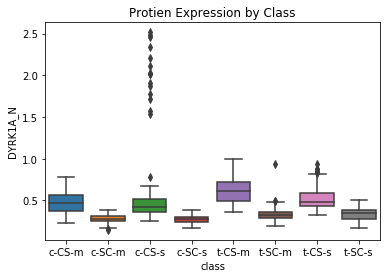

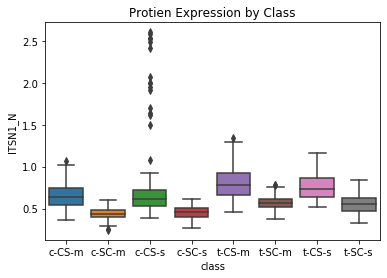

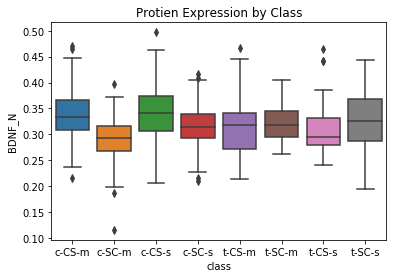

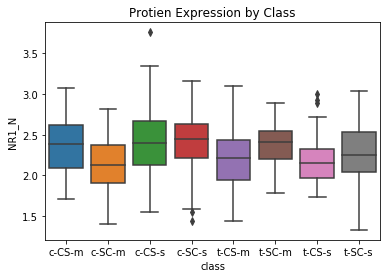

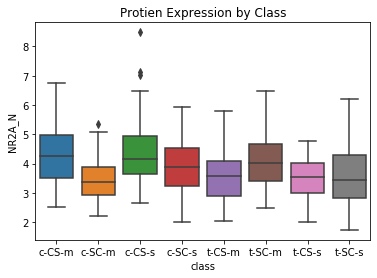

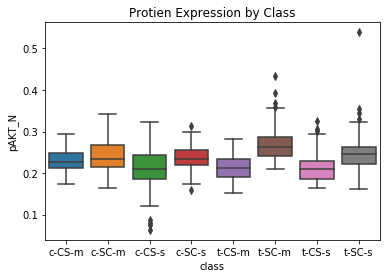

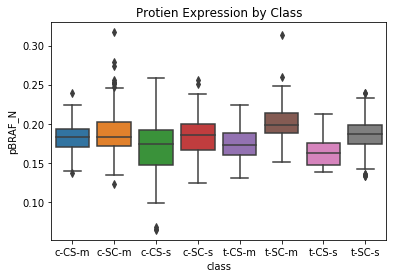

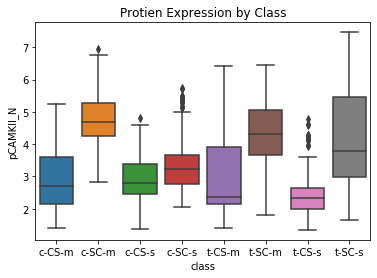

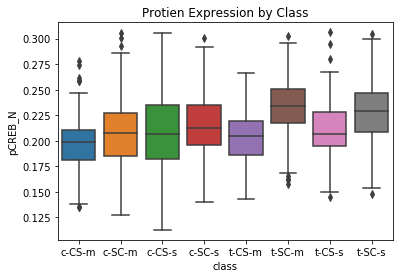

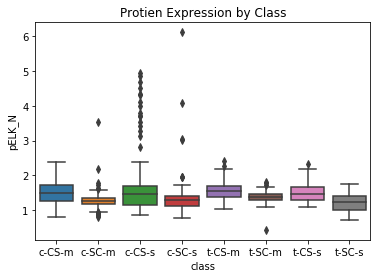

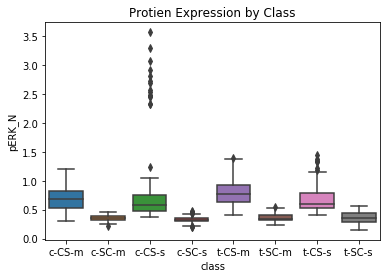

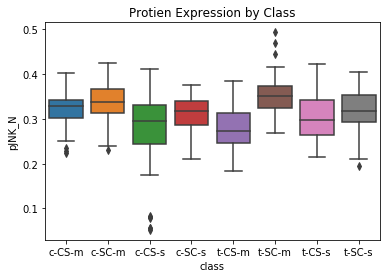

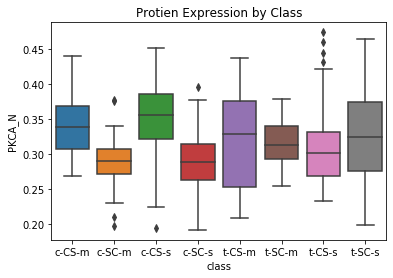

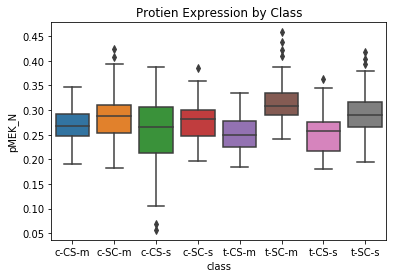

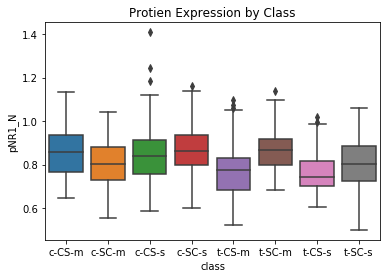

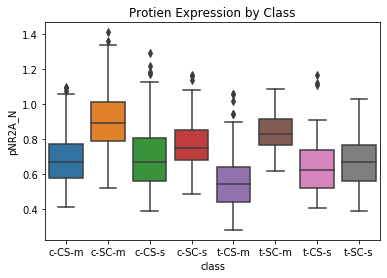

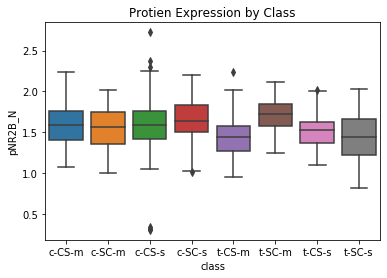

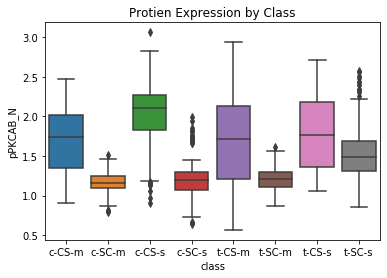

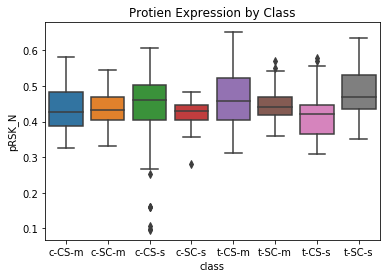

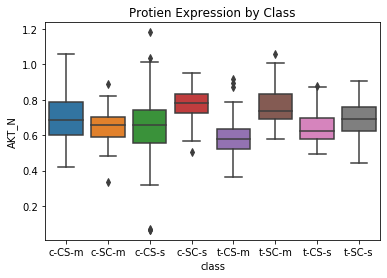

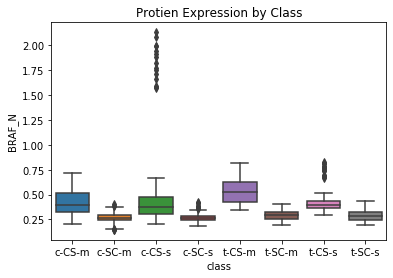

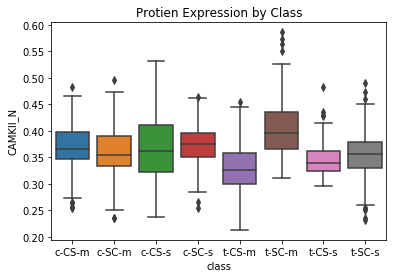

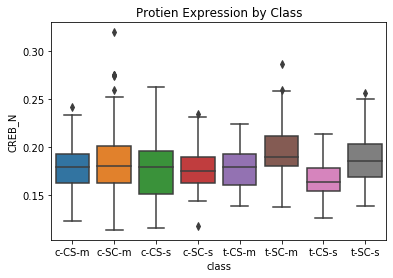

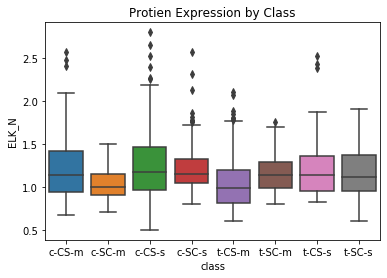

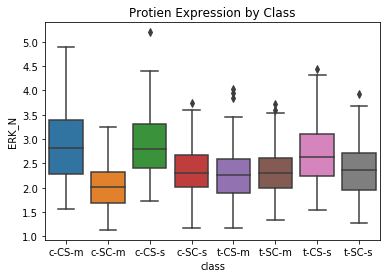

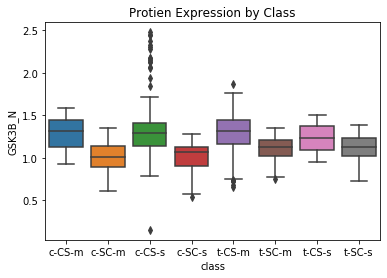

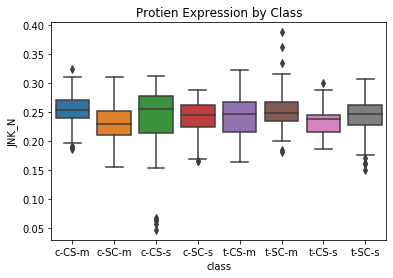

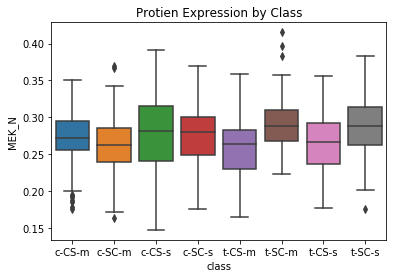

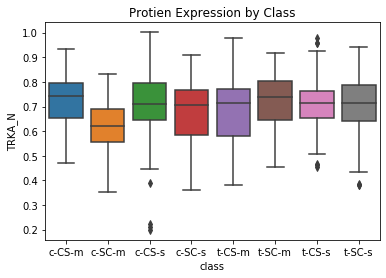

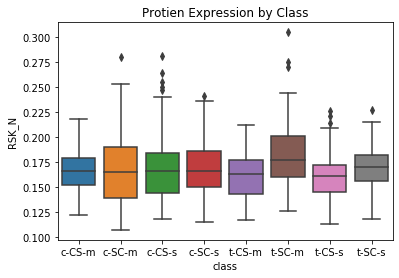

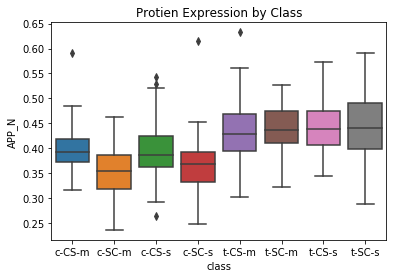

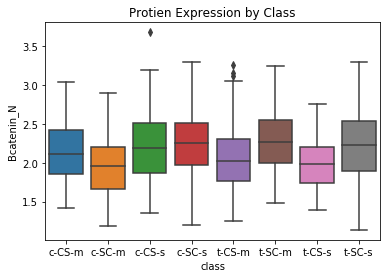

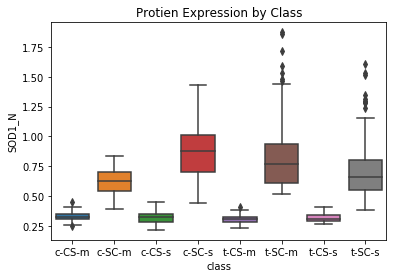

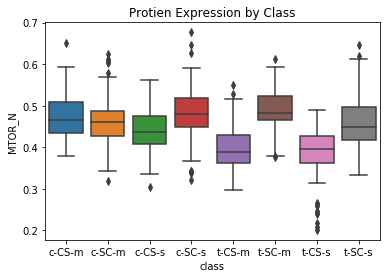

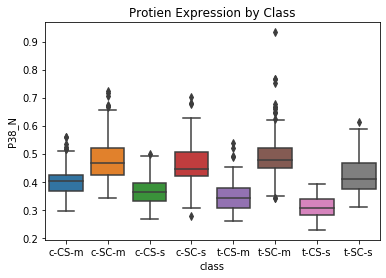

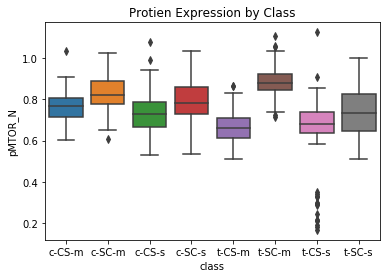

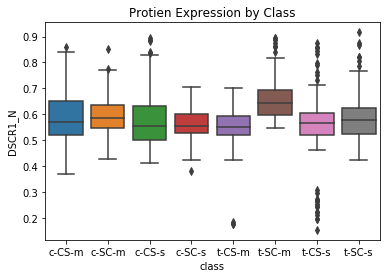

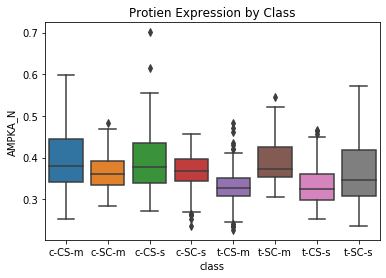

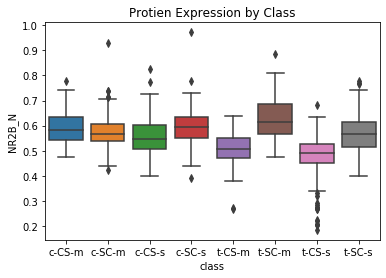

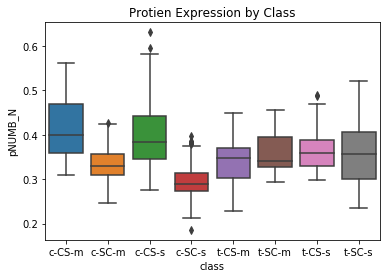

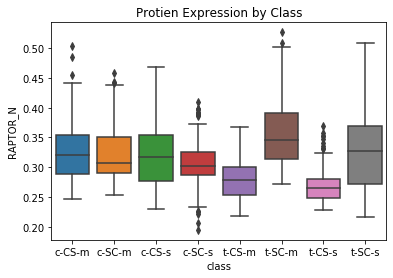

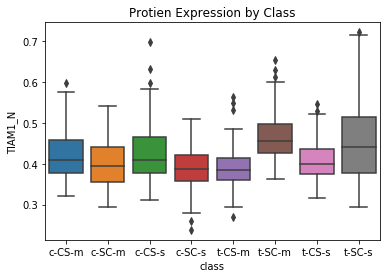

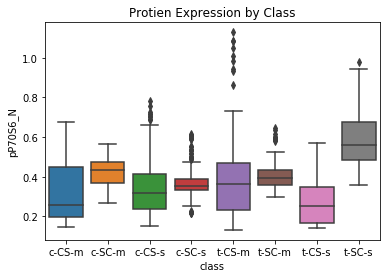

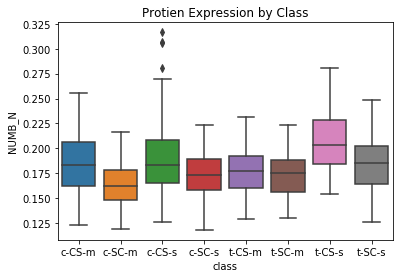

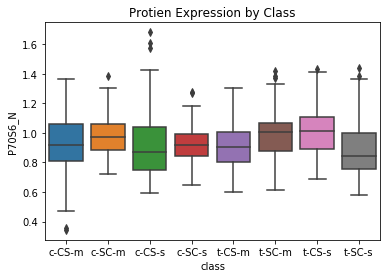

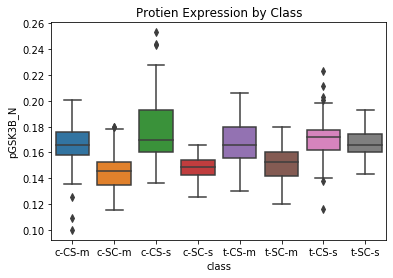

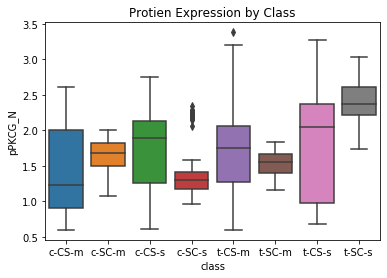

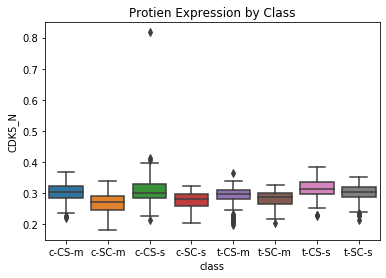

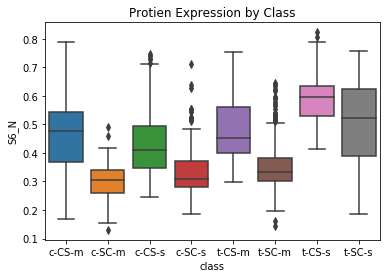

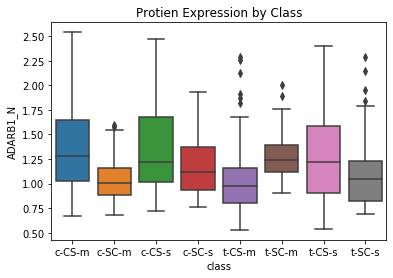

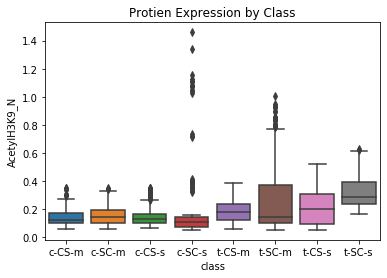

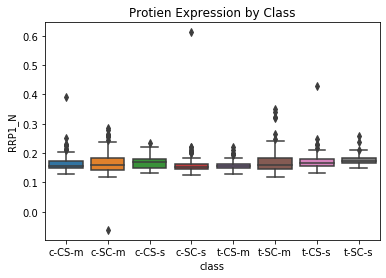

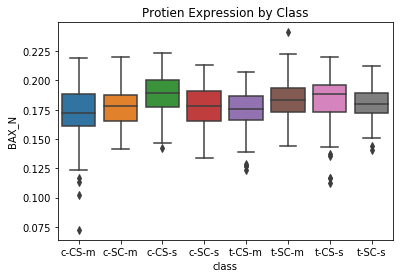

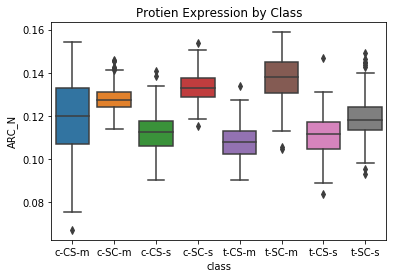

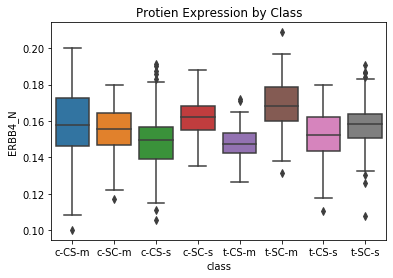

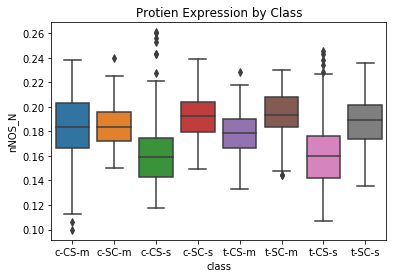

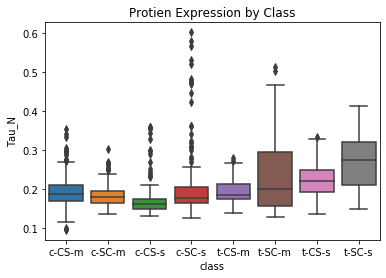

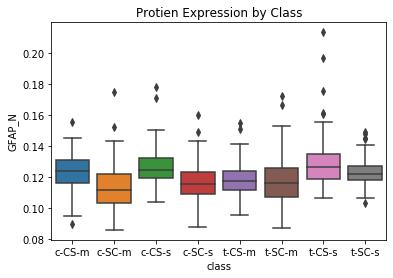

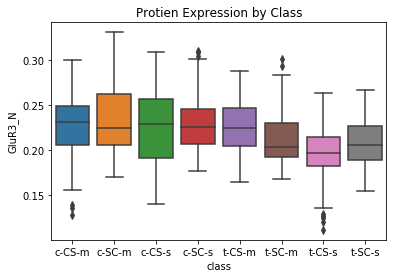

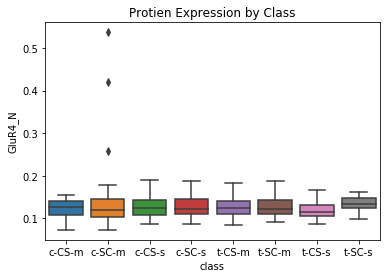

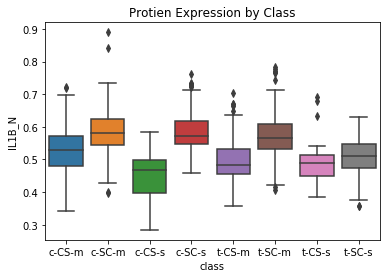

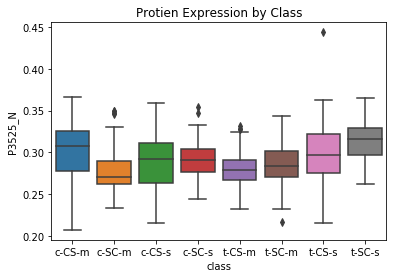

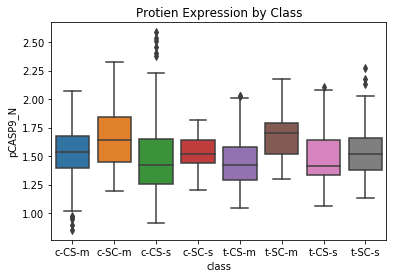

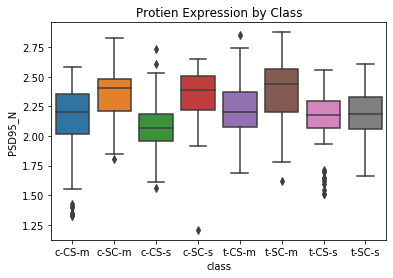

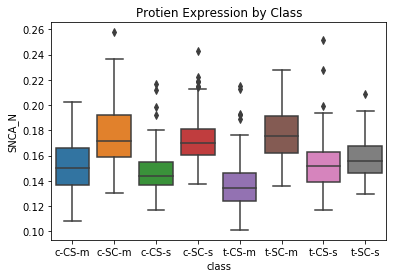

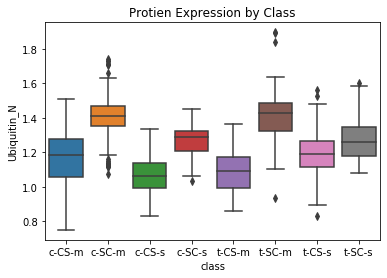

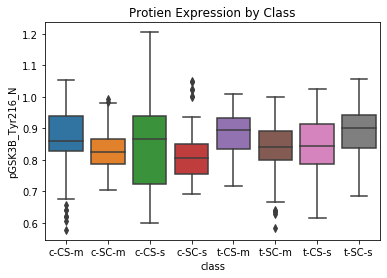

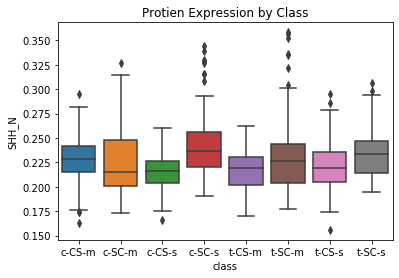

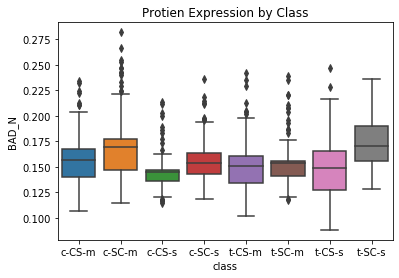

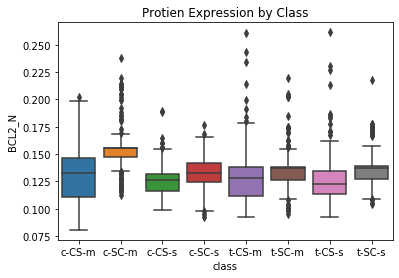

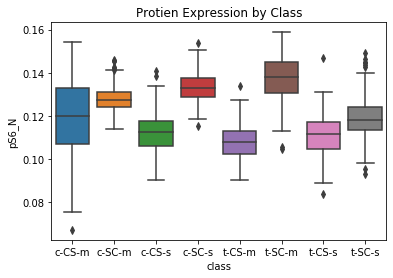

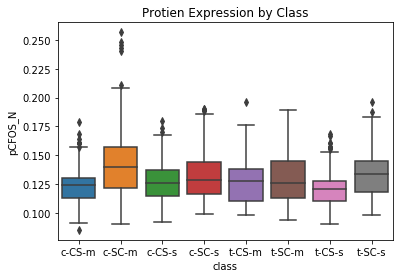

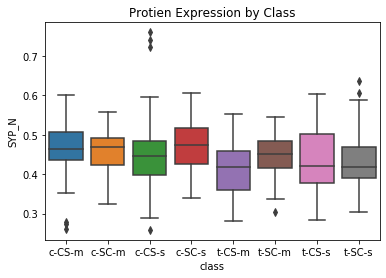

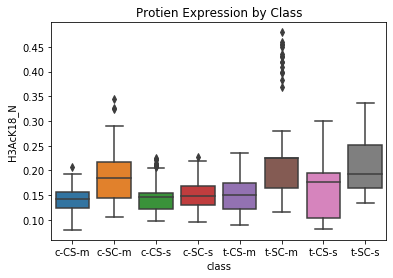

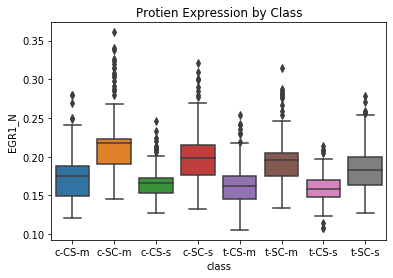

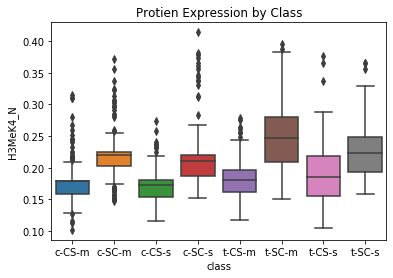

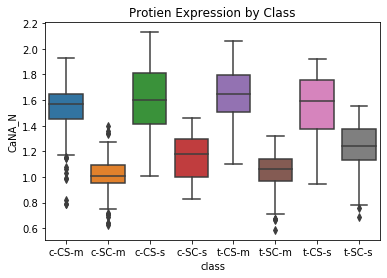

In [22]:
for p in proteins:
    plt.title("Protien Expression by Class")
    sns.boxplot(data = Mice_raw, x = 'class', y = p)
    plt.show()
    


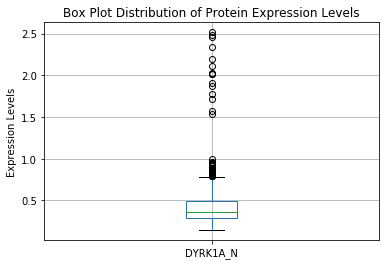

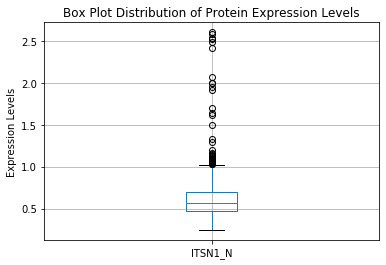

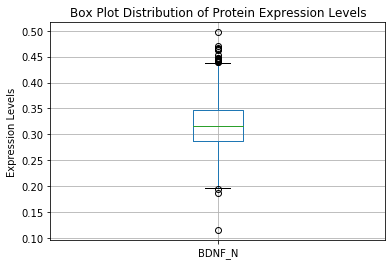

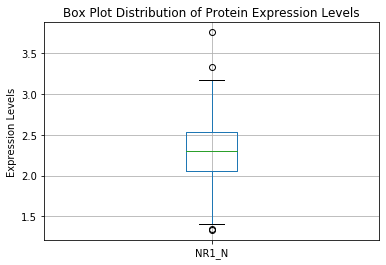

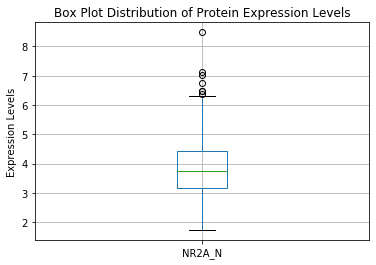

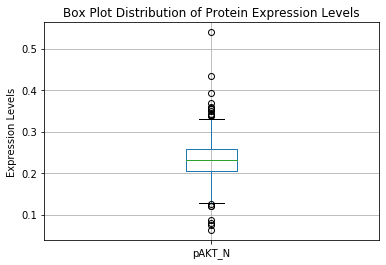

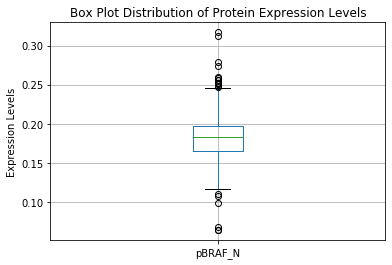

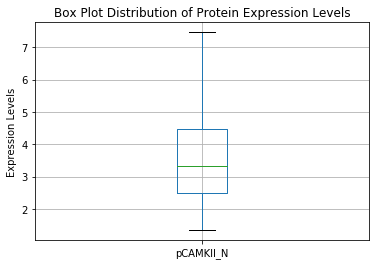

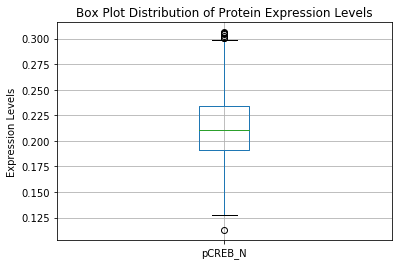

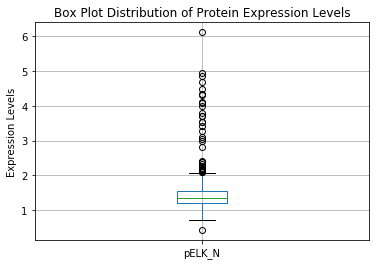

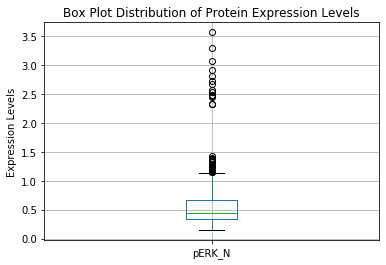

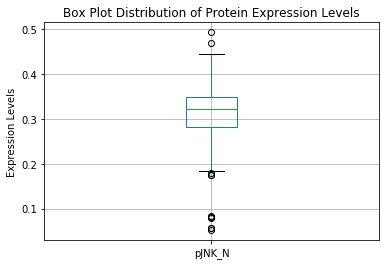

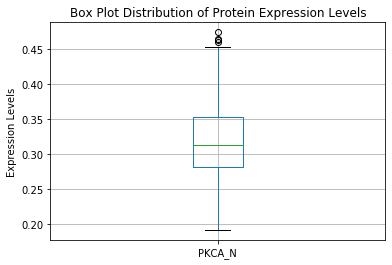

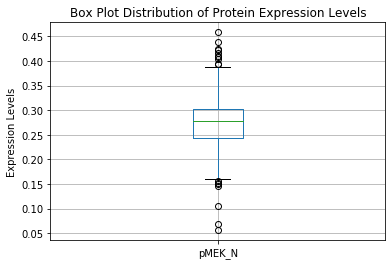

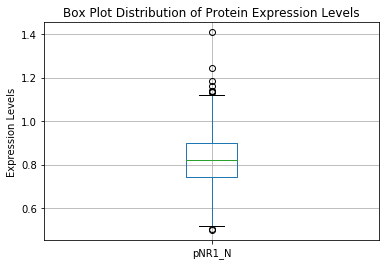

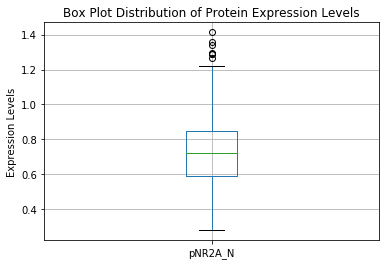

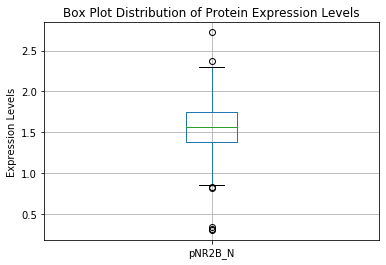

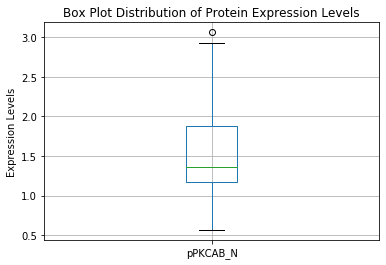

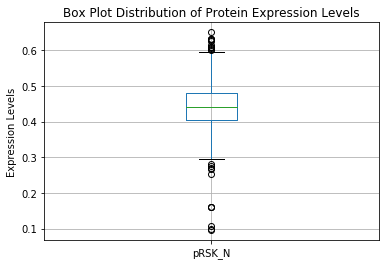

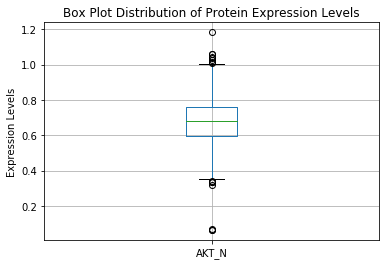

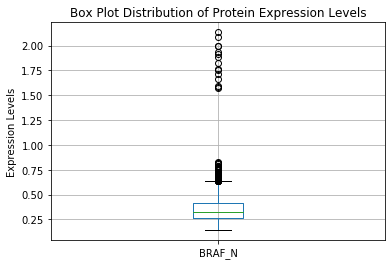

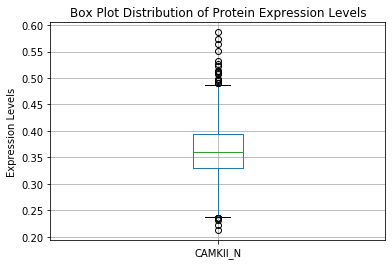

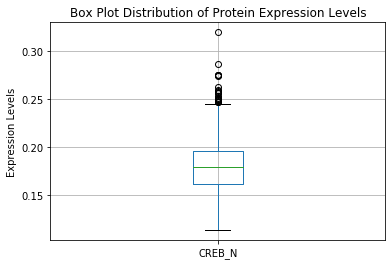

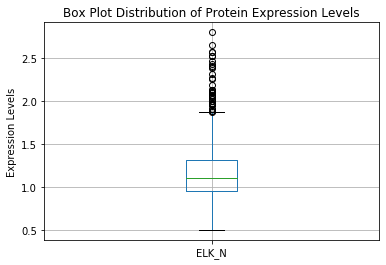

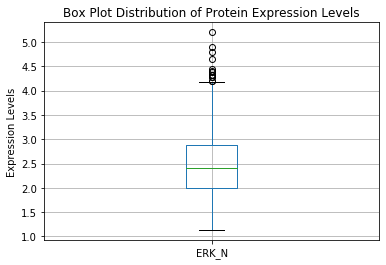

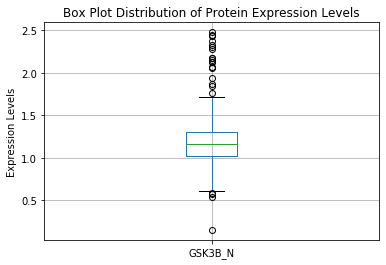

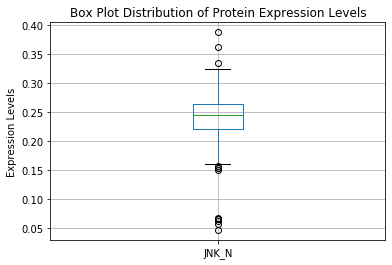

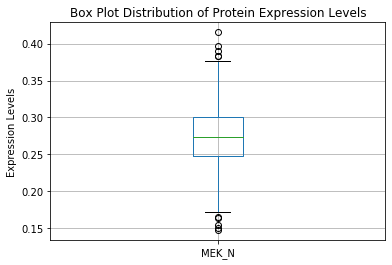

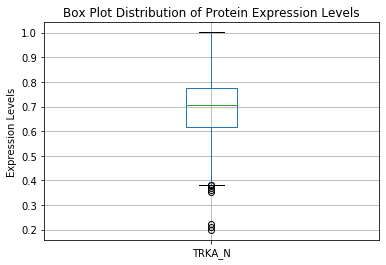

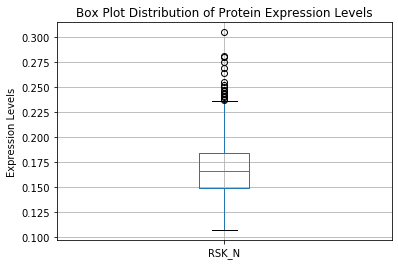

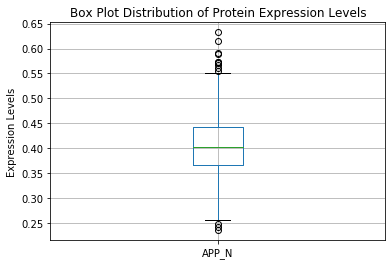

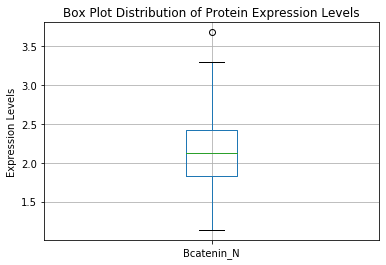

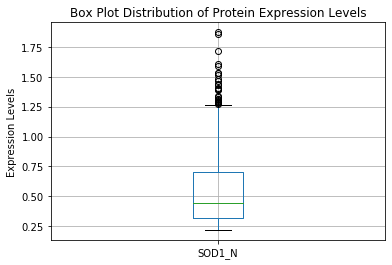

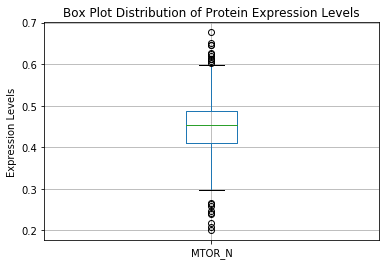

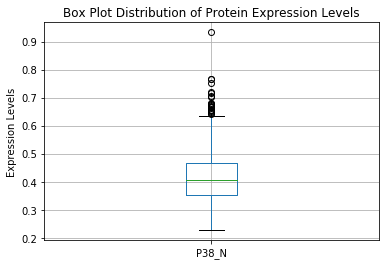

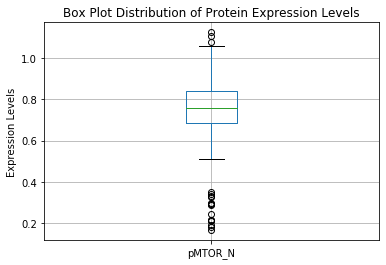

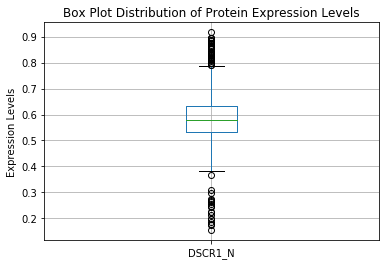

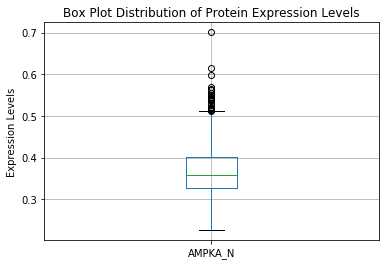

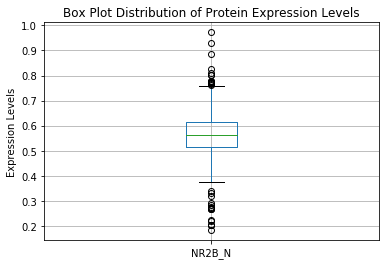

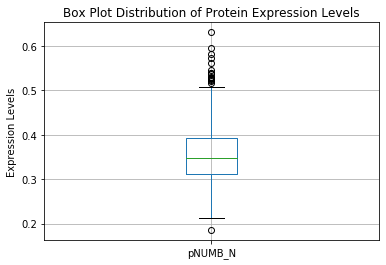

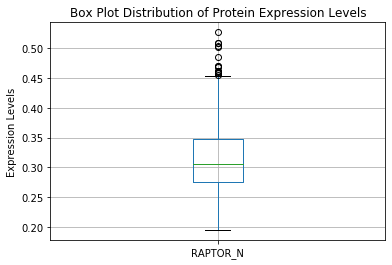

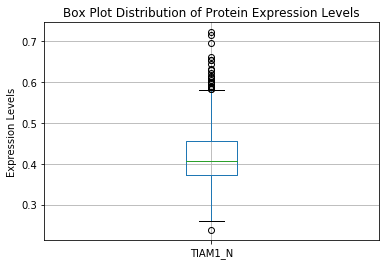

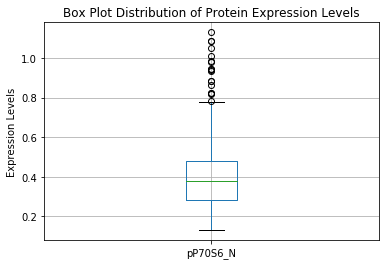

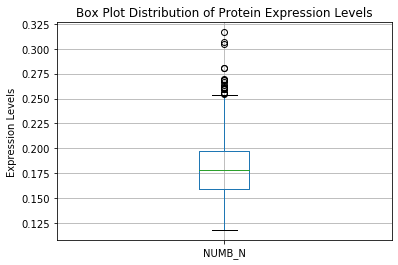

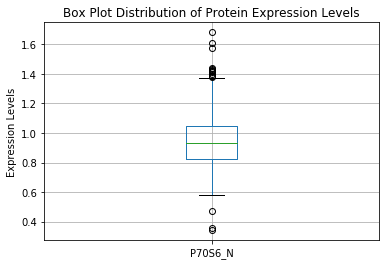

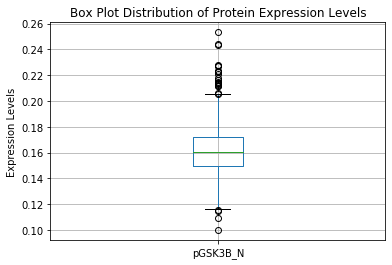

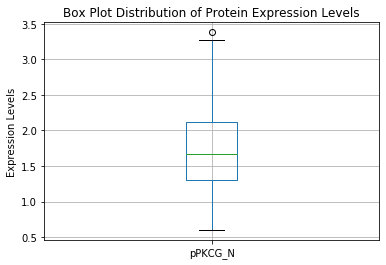

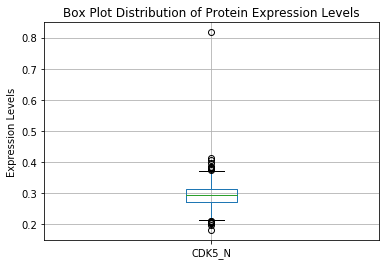

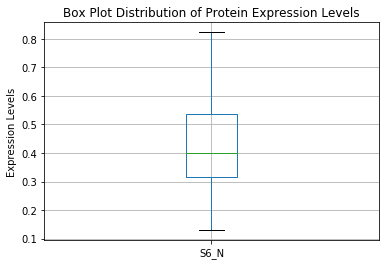

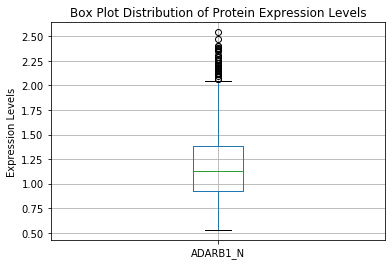

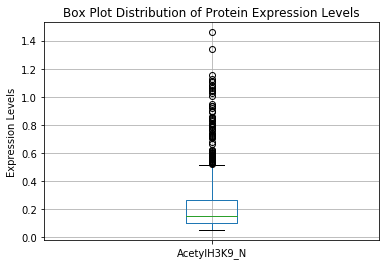

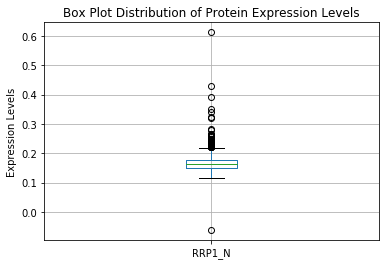

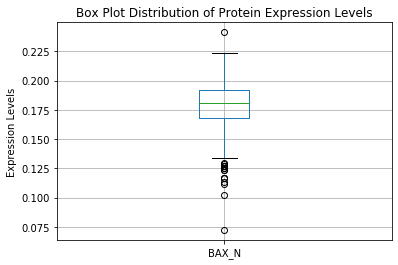

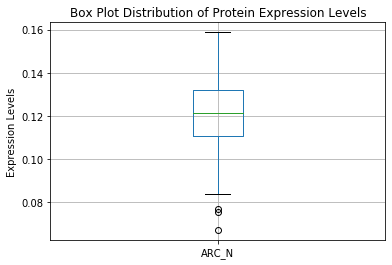

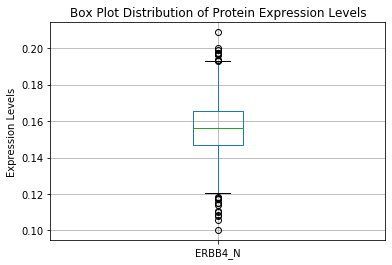

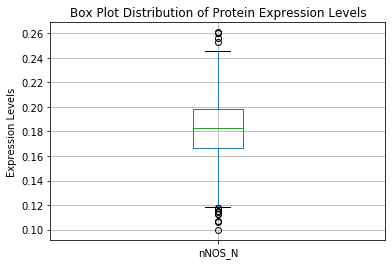

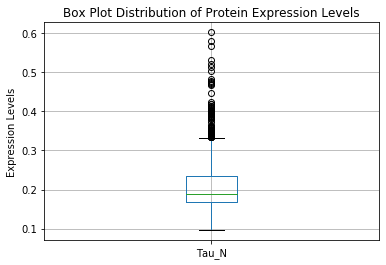

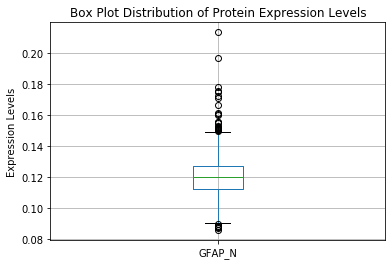

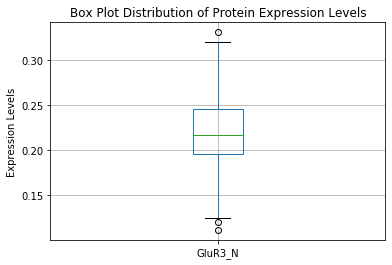

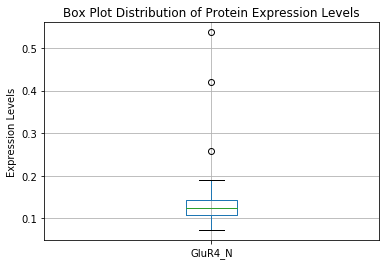

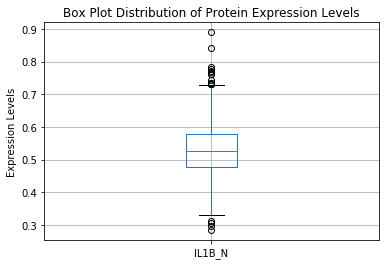

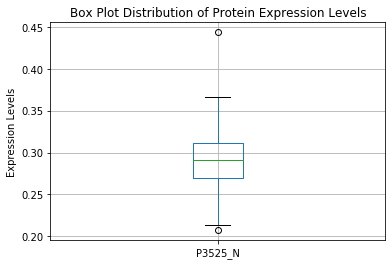

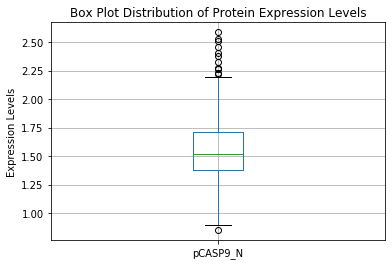

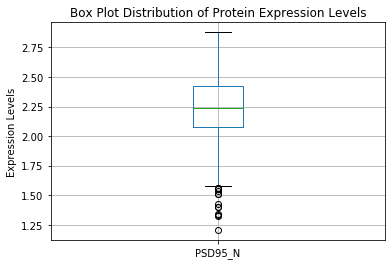

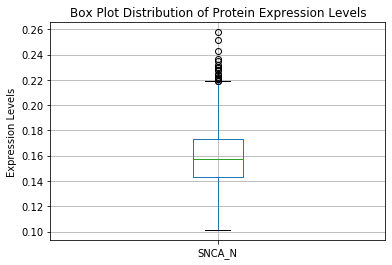

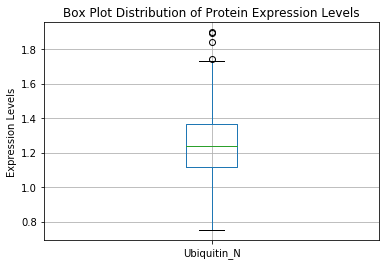

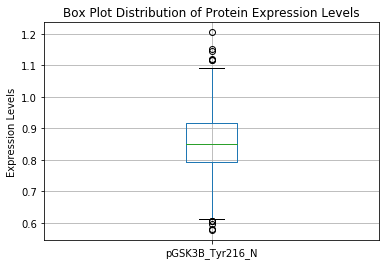

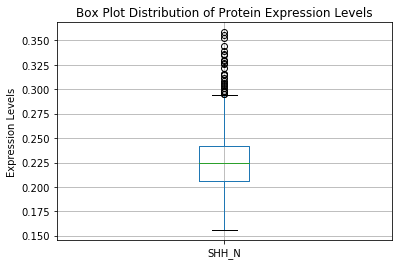

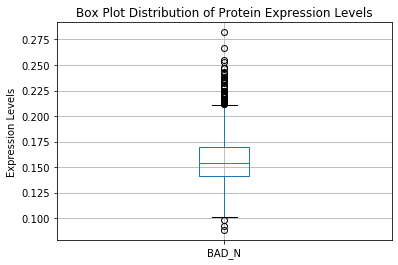

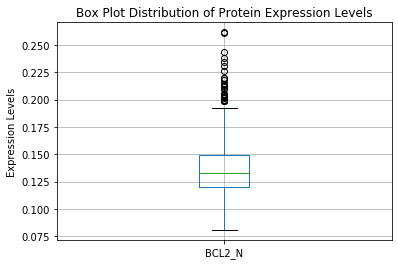

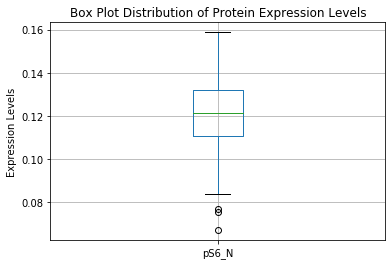

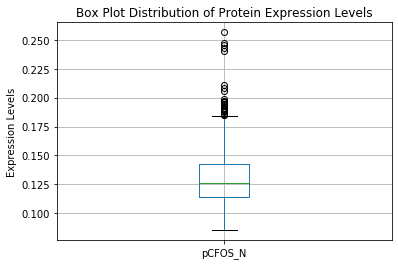

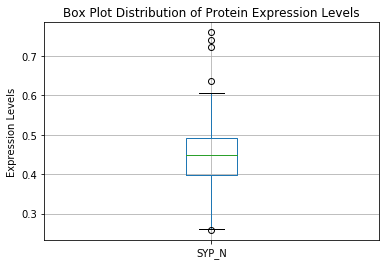

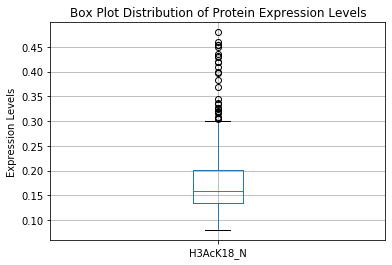

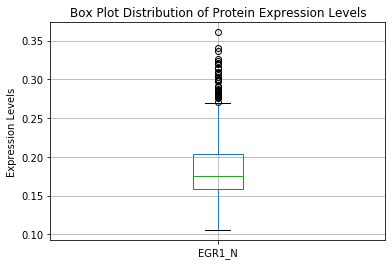

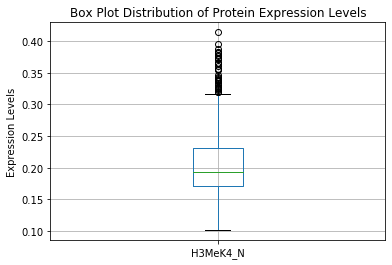

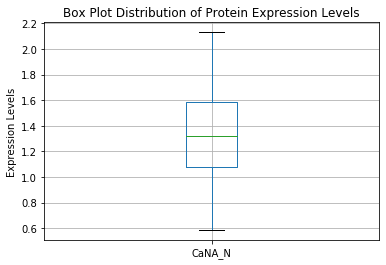

In [23]:
for p in proteins:
    Mice_raw.boxplot(p)
    plt.title("Box Plot Distribution of Protein Expression Levels")
    plt.ylabel('Expression Levels')

    plt.show()

In [24]:
Mice_raw.shape


(1080, 83)

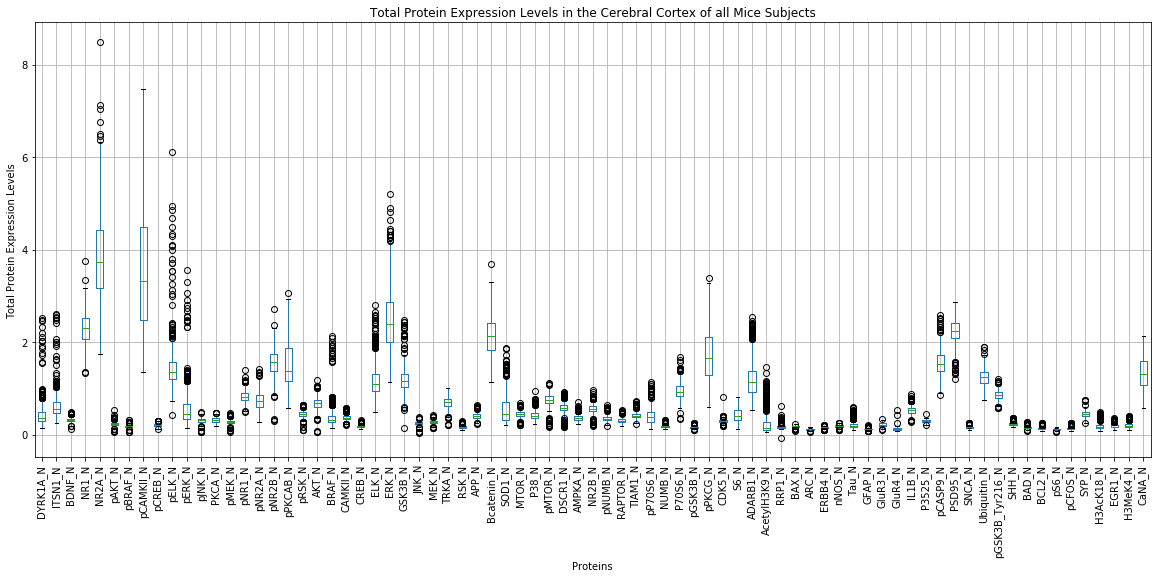

In [25]:
Mice_raw.boxplot(figsize=(20,8))
plt.title("Total Protein Expression Levels in the Cerebral Cortex of all Mice Subjects")
plt.ylabel('Total Protein Expression Levels')
plt.xlabel('Proteins')
plt.xticks(rotation=90)
plt.show()

**Some observations**

RRP1_N has a negative value? From a mouse of c-SC-m class

It appears that a number of proteins have huge numbers of outliers:
    
* DYRK1A_N
* ITSN1_N
* AcetylH3K9_N
* ADARB1_N
* ELK_N
* pERK_N


In [26]:
#Finding the neagtive value c-SC-m mouse in RRP1_N 
RRP1_N = Mice_raw[['class','RRP1_N']]
RRP1_N.head()

class    RRP1_N
0  c-CS-m  0.159102
1  c-CS-m  0.158129
2  c-CS-m  0.148696
3  c-CS-m  0.166112
4  c-CS-m  0.160687

In [27]:
#Find out which one is negative 
RRP1_N.loc[RRP1_N['RRP1_N']<0]

class    RRP1_N
298  c-SC-m -0.062008

In [28]:
Mice_raw.loc[Mice_raw['RRP1_N']<0]

DYRK1A_N   ITSN1_N    BDNF_N    NR1_N    NR2A_N  pAKT_N  pBRAF_N  \
298  0.294966  0.498586  0.317025  2.20871  3.060238  0.2944  0.24095   

     pCAMKII_N   pCREB_N    pELK_N    pERK_N    pJNK_N    PKCA_N    pMEK_N  \
298   3.947115  0.231052  1.424208  0.370475  0.374152  0.322681  0.332014   

      pNR1_N   pNR2A_N   pNR2B_N  pPKCAB_N    pRSK_N     AKT_N    BRAF_N  \
298  0.82862  0.735577  1.496889  1.307975  0.541007  0.746889  0.323529   

     CAMKII_N    CREB_N     ELK_N    ERK_N   GSK3B_N     JNK_N     MEK_N  \
298    0.4375  0.223982  1.008484  2.14112  1.158088  0.280543  0.367081   

      TRKA_N     RSK_N     APP_N  Bcatenin_N    SOD1_N    MTOR_N     P38_N  \
298  0.69457  0.222568  0.356618    1.785916  0.700792  0.493495  0.501414   

      pMTOR_N   DSCR1_N   AMPKA_N    NR2B_N   pNUMB_N  RAPTOR_N   TIAM1_N  \
298  0.864536  0.697964  0.349265  0.590781  0.340215  0.310238  0.379242   

     pP70S6_N    NUMB_N   P70S6_N  pGSK3B_N   pPKCG_N    CDK5_N      S6_N  \
298  0.372738  0.167126  0.889173  0.156693  1.624409  0.283465  0.311614   

     ADARB1_N  AcetylH3K9_N    RRP1_N     BAX_N     ARC_N   ERBB4_N    nNOS_N  \
298  0.840354      0.110827 -0.062008  0.179331  0.126181  0.174016  0.170472   

        Tau_N    GFAP_N   GluR3_N   GluR4_N    IL1B_N   P3525_N  pCASP9_N  \
298  0.191732  0.126378  0.200787  0.095866  0.719488  0.288976  1.802559   

      PSD95_N    SNCA_N  Ubiquitin_N  pGSK3B_Tyr216_N     SHH_N     BAD_N  \
298  2.349213  0.199409     1.386811         0.969291  0.269094  0.169294   

      BCL2_N     pS6_N  pCFOS_N     SYP_N  H3AcK18_N    EGR1_N  H3MeK4_N  \
298  0.15598  0.126181  0.19626  0.538976   0.185664  0.315157  0.220825   

       CaNA_N Genotype  Treatment Behavior   class MouseName Mouse_Test  
298  1.362205  Control  Memantine      S/C  c-SC-m       365         14

It was mouse 365 replicate 14. 
Now I'll replace that with 0 in the new data frame (Mice_clean) and re-calcualte averages protein expression for each class and protein. 

In [29]:
Mice_clean= pd.DataFrame(Mice)
Mice_clean.drop(['MouseID'], axis=1, inplace=True)
Mice_clean.head()

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   

   pCAMKII_N   pCREB_N    pELK_N    pERK_N    pJNK_N    PKCA_N    pMEK_N  \
0   2.373744  0.232224  1.750936  0.687906  0.306382  0.402698  0.296927   
1   2.292150  0.226972  1.596377  0.695006  0.299051  0.385987  0.281319   
2   2.283337  0.230247  1.561316  0.677348  0.291276  0.381002  0.281710   
3   2.152301  0.207004  1.595086  0.583277  0.296729  0.377087  0.313832   
4   2.134014  0.192158  1.504230  0.550960  0.286961  0.363502  0.277964   

     pNR1_N   pNR2A_N   pNR2B_N  pPKCAB_N    pRSK_N     AKT_N    BRAF_N  \
0  1.022060  0.605673  1.877684  2.308745  0.441599  0.859366  0.416289   
1  0.956676  0.587559  1.725774  2.043037  0.445222  0.834659  0.400364   
2  1.003635  0.602449  1.731873  2.017984  0.467668  0.814329  0.399847   
3  0.875390  0.520293  1.566852  2.132754  0.477671  0.727705  0.385639   
4  0.864912  0.507990  1.480059  2.013697  0.483416  0.687794  0.367531   

   CAMKII_N    CREB_N     ELK_N     ERK_N   GSK3B_N     JNK_N     MEK_N  \
0  0.369608  0.178944  1.866358  3.685247  1.537227  0.264526  0.319677   
1  0.356178  0.173680  1.761047  3.485287  1.509249  0.255727  0.304419   
2  0.368089  0.173905  1.765544  3.571456  1.501244  0.259614  0.311747   
3  0.362970  0.179449  1.286277  2.970137  1.419710  0.259536  0.279218   
4  0.355311  0.174836  1.324695  2.896334  1.359876  0.250705  0.273667   

     TRKA_N     RSK_N     APP_N  Bcatenin_N    SOD1_N    MTOR_N     P38_N  \
0  0.813866  0.165846  0.453910    3.037621  0.369510  0.458539  0.335336   
1  0.780504  0.157194  0.430940    2.921882  0.342279  0.423560  0.324835   
2  0.785154  0.160895  0.423187    2.944136  0.343696  0.425005  0.324852   
3  0.734492  0.162210  0.410615    2.500204  0.344509  0.429211  0.330121   
4  0.702699  0.154827  0.398550    2.456560  0.329126  0.408755  0.313415   

    pMTOR_N   DSCR1_N   AMPKA_N    NR2B_N   pNUMB_N  RAPTOR_N   TIAM1_N  \
0  0.825192  0.576916  0.448099  0.586271  0.394721  0.339571  0.482864   
1  0.761718  0.545097  0.420876  0.545097  0.368255  0.321959  0.454519   
2  0.757031  0.543620  0.404630  0.552994  0.363880  0.313086  0.447197   
3  0.746980  0.546763  0.386860  0.547849  0.366771  0.328492  0.442650   
4  0.691956  0.536860  0.360816  0.512824  0.351551  0.312206  0.419095   

   pP70S6_N    NUMB_N   P70S6_N  pGSK3B_N   pPKCG_N    CDK5_N      S6_N  \
0  0.294170  0.182150  0.842725  0.192608  1.443091  0.294700  0.354605   
1  0.276431  0.182086  0.847615  0.194815  1.439460  0.294060  0.354548   
2  0.256648  0.184388  0.856166  0.200737  1.524364  0.301881  0.386087   
3  0.398534  0.161768  0.760234  0.184169  1.612382  0.296382  0.290680   
4  0.393447  0.160200  0.768113  0.185718  1.645807  0.296829  0.309345   

   ADARB1_N  AcetylH3K9_N    RRP1_N     BAX_N     ARC_N   ERBB4_N    nNOS_N  \
0  1.339070      0.170119  0.159102  0.188852  0.106305  0.144989  0.176668   
1  1.306323      0.171427  0.158129  0.184570  0.106592  0.150471  0.178309   
2  1.279600      0.185456  0.148696  0.190532  0.108303  0.145330  0.176213   
3  1.198765      0.159799  0.166112  0.185323  0.103184  0.140656  0.163804   
4  1.206995      0.164650  0.160687  0.188221  0.104784  0.141983  0.167710   

      Tau_N    GFAP_N   GluR3_N   GluR4_N    IL1B_N   P3525_N  pCASP9_N  \
0  0.125190  0.115291  0.228043  0.142756  0.430957  0.247538  1.603310   
1  0.134275  0.118235  0.238073  0.142037  0.457156  0.257632  1.671738   
2  0.132560  0.117760  0.244817  0.142445  0.510472  0.255343  1.663550   
3  0.123210  0.117439  0.234947  0.145068  0.430996  

In [30]:
Mice_clean.loc[Mice_clean['RRP1_N']<0]

DYRK1A_N   ITSN1_N    BDNF_N    NR1_N    NR2A_N  pAKT_N  pBRAF_N  \
298  0.294966  0.498586  0.317025  2.20871  3.060238  0.2944  0.24095   

     pCAMKII_N   pCREB_N    pELK_N    pERK_N    pJNK_N    PKCA_N    pMEK_N  \
298   3.947115  0.231052  1.424208  0.370475  0.374152  0.322681  0.332014   

      pNR1_N   pNR2A_N   pNR2B_N  pPKCAB_N    pRSK_N     AKT_N    BRAF_N  \
298  0.82862  0.735577  1.496889  1.307975  0.541007  0.746889  0.323529   

     CAMKII_N    CREB_N     ELK_N    ERK_N   GSK3B_N     JNK_N     MEK_N  \
298    0.4375  0.223982  1.008484  2.14112  1.158088  0.280543  0.367081   

      TRKA_N     RSK_N     APP_N  Bcatenin_N    SOD1_N    MTOR_N     P38_N  \
298  0.69457  0.222568  0.356618    1.785916  0.700792  0.493495  0.501414   

      pMTOR_N   DSCR1_N   AMPKA_N    NR2B_N   pNUMB_N  RAPTOR_N   TIAM1_N  \
298  0.864536  0.697964  0.349265  0.590781  0.340215  0.310238  0.379242   

     pP70S6_N    NUMB_N   P70S6_N  pGSK3B_N   pPKCG_N    CDK5_N      S6_N  \
298  0.372738  0.167126  0.889173  0.156693  1.624409  0.283465  0.311614   

     ADARB1_N  AcetylH3K9_N    RRP1_N     BAX_N     ARC_N   ERBB4_N    nNOS_N  \
298  0.840354      0.110827 -0.062008  0.179331  0.126181  0.174016  0.170472   

        Tau_N    GFAP_N   GluR3_N   GluR4_N    IL1B_N   P3525_N  pCASP9_N  \
298  0.191732  0.126378  0.200787  0.095866  0.719488  0.288976  1.802559   

      PSD95_N    SNCA_N  Ubiquitin_N  pGSK3B_Tyr216_N     SHH_N  BAD_N  \
298  2.349213  0.199409     1.386811         0.969291  0.269094    NaN   

     BCL2_N     pS6_N  pCFOS_N     SYP_N  H3AcK18_N    EGR1_N  H3MeK4_N  \
298     NaN  0.126181  0.19626  0.538976        NaN  0.315157       NaN   

       CaNA_N Genotype  Treatment Behavior   class MouseName Mouse_Test  
298  1.362205  Control  Memantine      S/C  c-SC-m       365         14

In [31]:
Mice_clean['RRP1_N'].mask(Mice_clean['RRP1_N'] <0, 0, inplace=True)

In [32]:
Mice_clean.loc[Mice_clean['RRP1_N']<0]

Empty DataFrame
Columns: [DYRK1A_N, ITSN1_N, BDNF_N, NR1_N, NR2A_N, pAKT_N, pBRAF_N, pCAMKII_N, pCREB_N, pELK_N, pERK_N, pJNK_N, PKCA_N, pMEK_N, pNR1_N, pNR2A_N, pNR2B_N, pPKCAB_N, pRSK_N, AKT_N, BRAF_N, CAMKII_N, CREB_N, ELK_N, ERK_N, GSK3B_N, JNK_N, MEK_N, TRKA_N, RSK_N, APP_N, Bcatenin_N, SOD1_N, MTOR_N, P38_N, pMTOR_N, DSCR1_N, AMPKA_N, NR2B_N, pNUMB_N, RAPTOR_N, TIAM1_N, pP70S6_N, NUMB_N, P70S6_N, pGSK3B_N, pPKCG_N, CDK5_N, S6_N, ADARB1_N, AcetylH3K9_N, RRP1_N, BAX_N, ARC_N, ERBB4_N, nNOS_N, Tau_N, GFAP_N, GluR3_N, GluR4_N, IL1B_N, P3525_N, pCASP9_N, PSD95_N, SNCA_N, Ubiquitin_N, pGSK3B_Tyr216_N, SHH_N, BAD_N, BCL2_N, pS6_N, pCFOS_N, SYP_N, H3AcK18_N, EGR1_N, H3MeK4_N, CaNA_N, Genotype, Treatment, Behavior, class, MouseName, Mouse_Test]
Index: []

No more negative values. Now I need to null values in the mice_clean dataset with the average for each class and proteins. 

In [33]:
proteins = Mice_clean.columns[0:77]
print(proteins)

Index(['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N',
       'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N'],
      dtype='object')


In [34]:
for p in proteins: 
    Mice_clean[p] = Mice_clean[p].fillna(Mice_clean.groupby('class')[p].transform('mean'))



In [35]:
Mice_clean.isnull().sum()

DYRK1A_N           0
ITSN1_N            0
BDNF_N             0
NR1_N              0
NR2A_N             0
pAKT_N             0
pBRAF_N            0
pCAMKII_N          0
pCREB_N            0
pELK_N             0
pERK_N             0
pJNK_N             0
PKCA_N             0
pMEK_N             0
pNR1_N             0
pNR2A_N            0
pNR2B_N            0
pPKCAB_N           0
pRSK_N             0
AKT_N              0
BRAF_N             0
CAMKII_N           0
CREB_N             0
ELK_N              0
ERK_N              0
GSK3B_N            0
JNK_N              0
MEK_N              0
TRKA_N             0
RSK_N              0
APP_N              0
Bcatenin_N         0
SOD1_N             0
MTOR_N             0
P38_N              0
pMTOR_N            0
DSCR1_N            0
AMPKA_N            0
NR2B_N             0
pNUMB_N            0
RAPTOR_N           0
TIAM1_N            0
pP70S6_N           0
NUMB_N             0
P70S6_N            0
pGSK3B_N           0
pPKCG_N            0
CDK5_N       

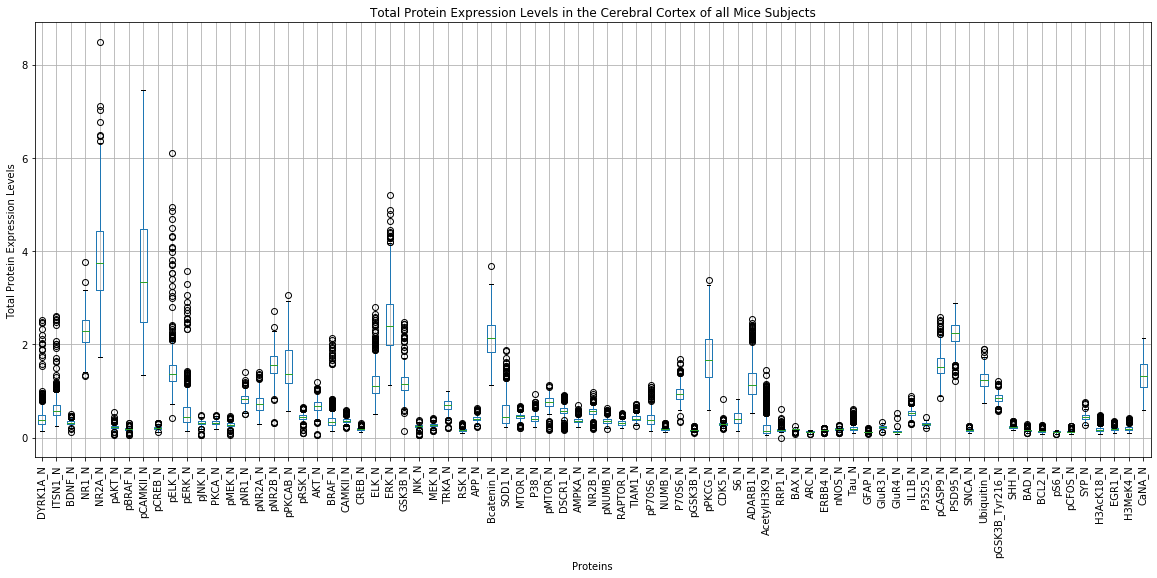

In [36]:
Mice_clean.boxplot(figsize=(20,8))
plt.title("Total Protein Expression Levels in the Cerebral Cortex of all Mice Subjects")
plt.ylabel('Total Protein Expression Levels')
plt.xlabel('Proteins')
plt.xticks(rotation=90)
plt.show()

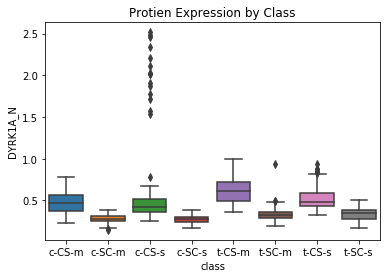

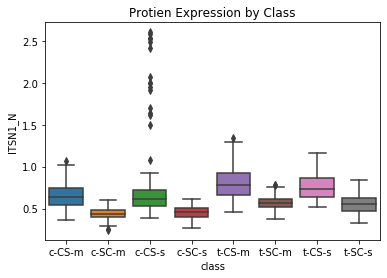

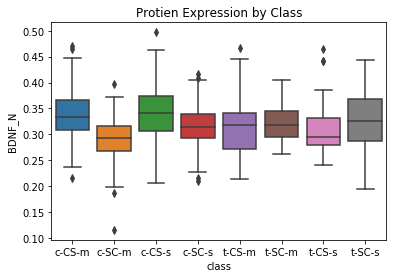

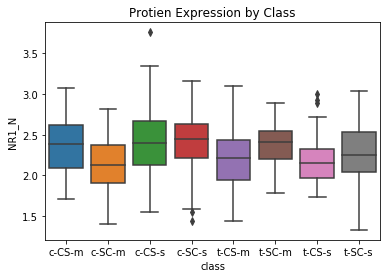

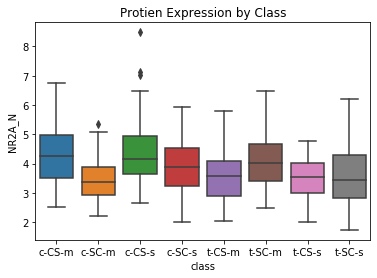

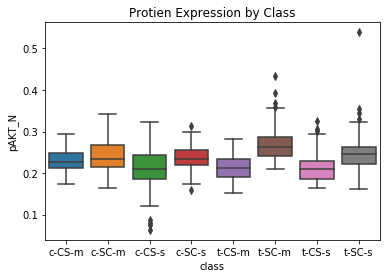

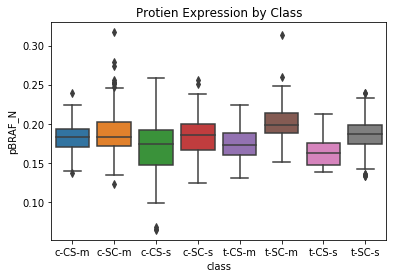

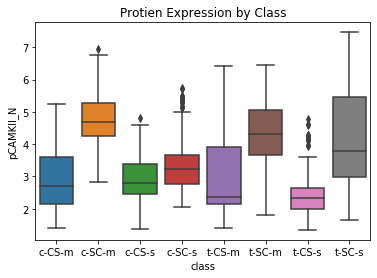

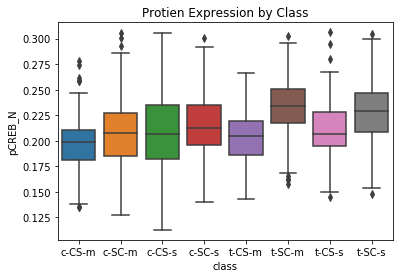

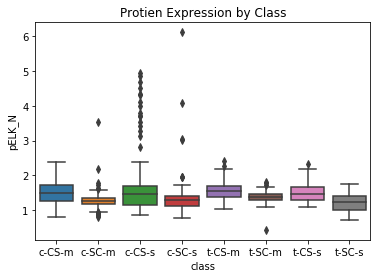

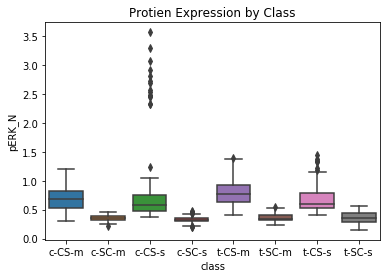

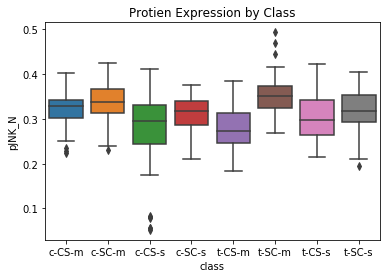

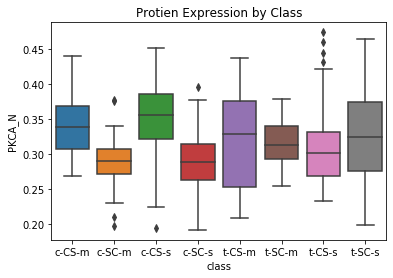

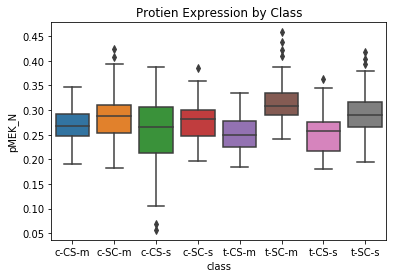

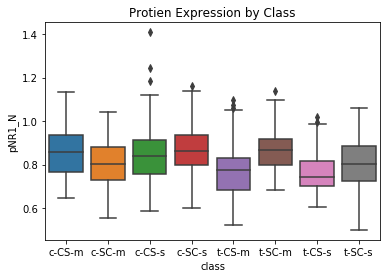

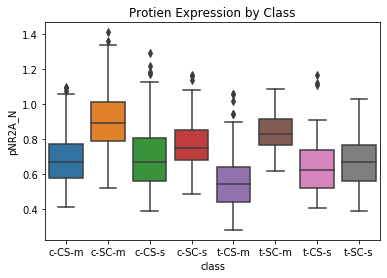

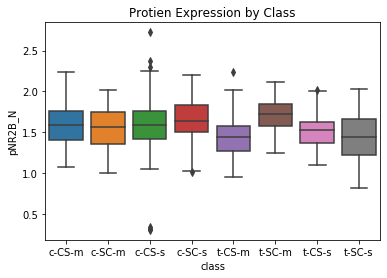

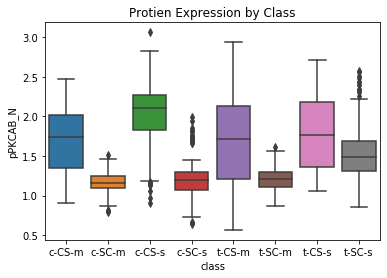

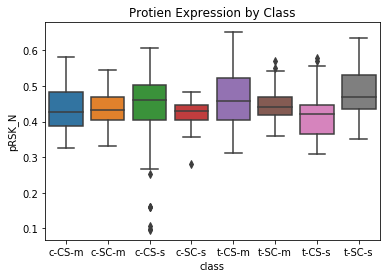

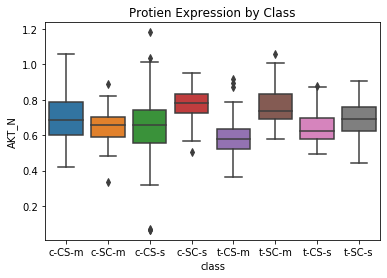

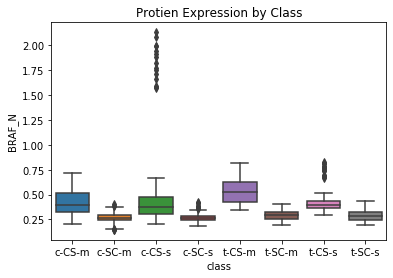

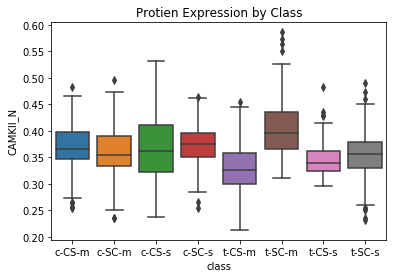

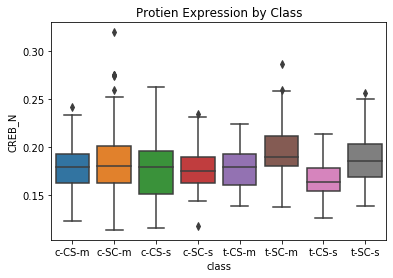

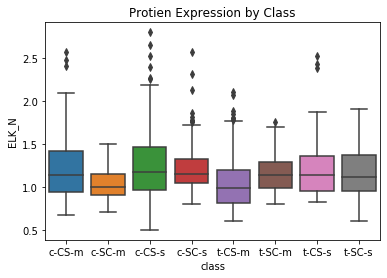

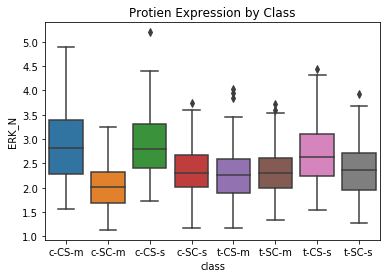

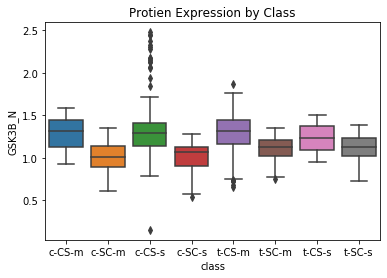

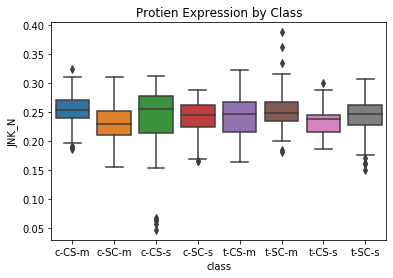

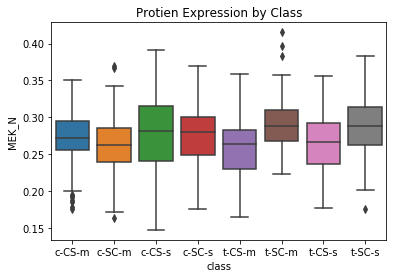

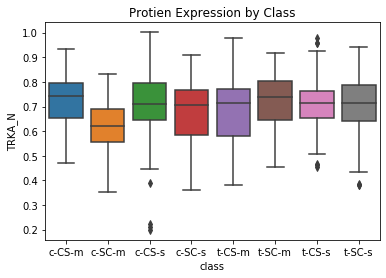

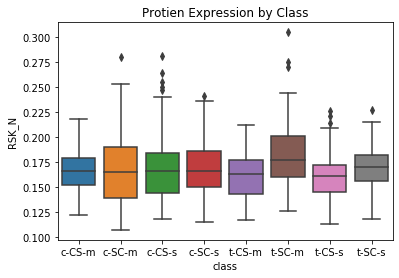

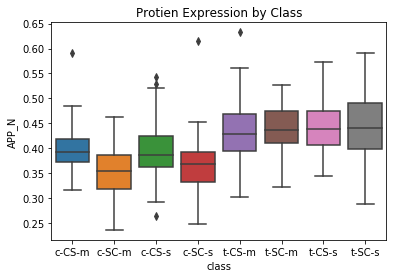

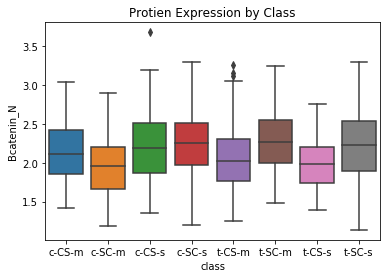

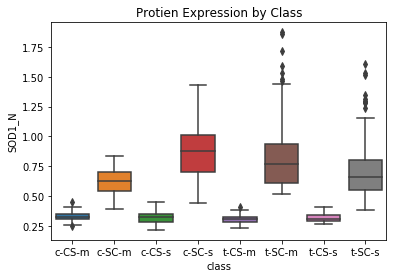

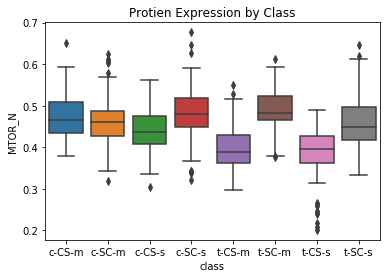

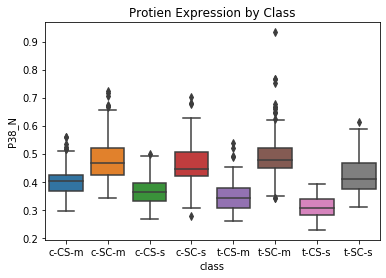

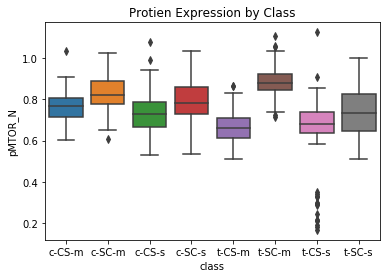

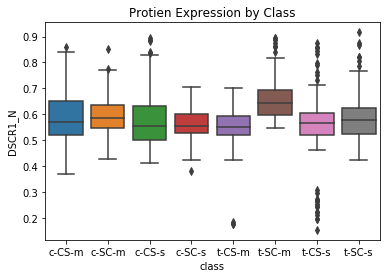

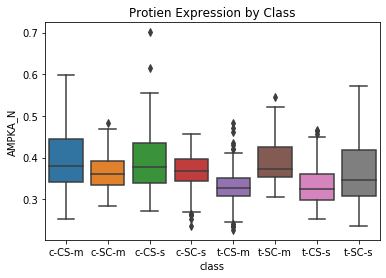

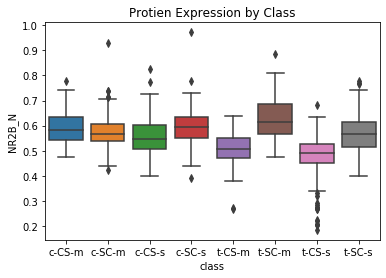

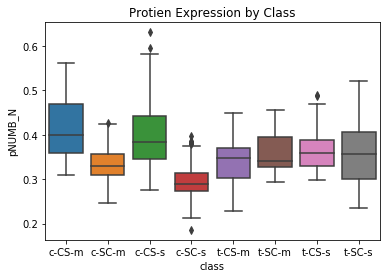

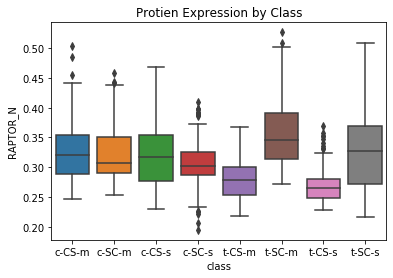

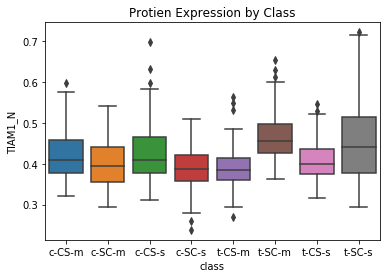

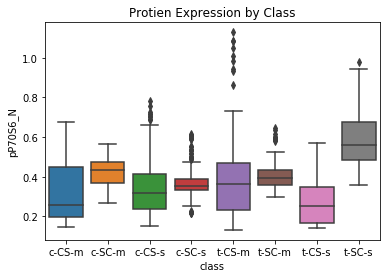

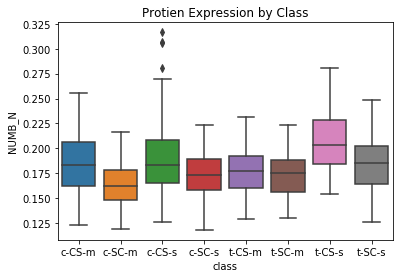

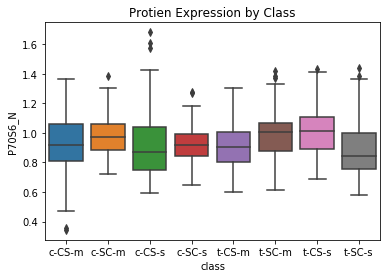

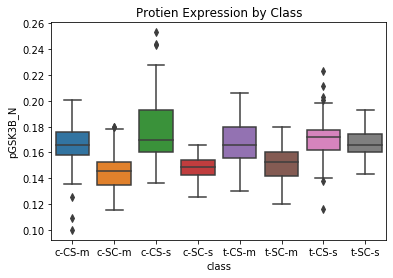

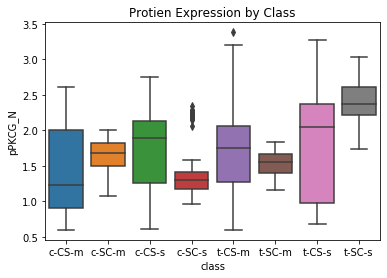

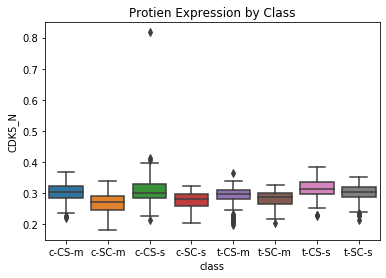

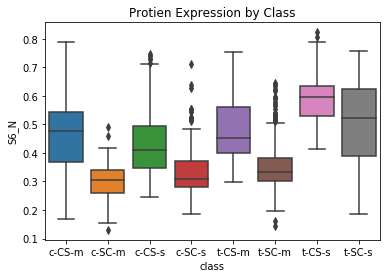

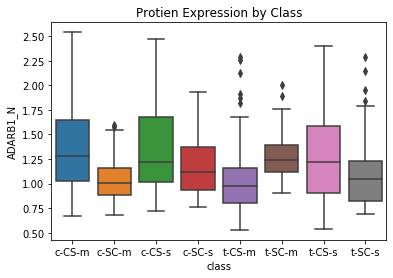

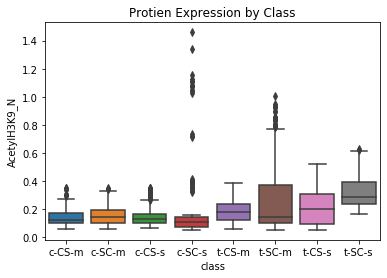

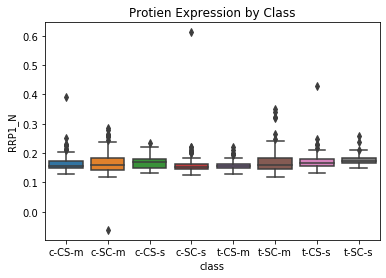

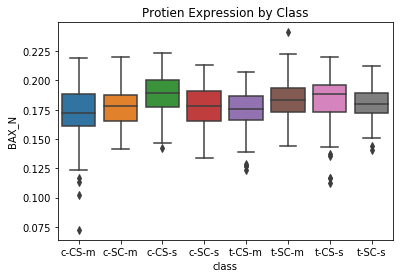

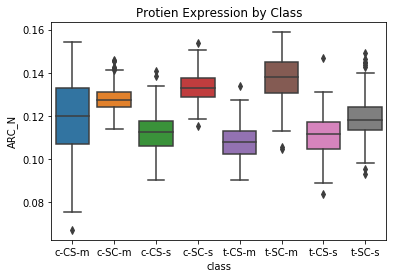

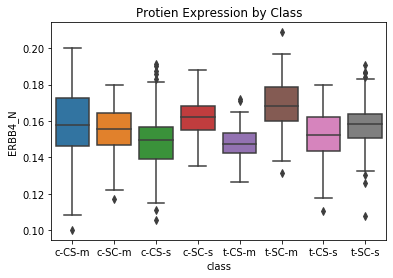

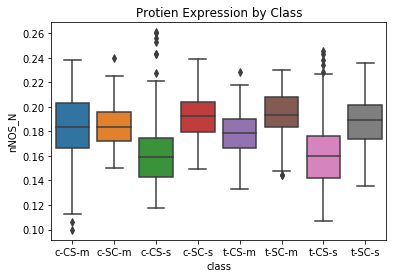

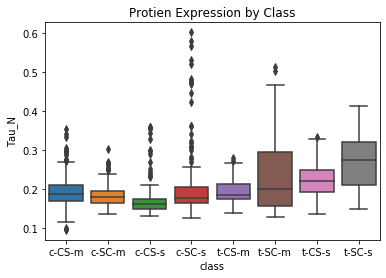

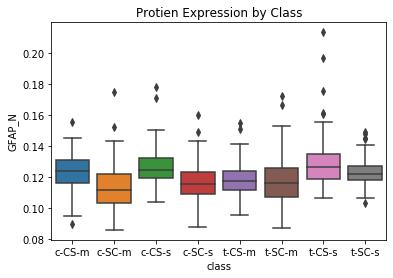

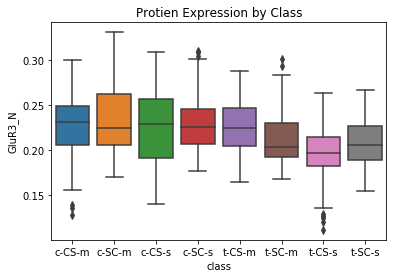

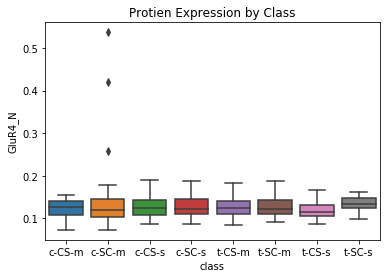

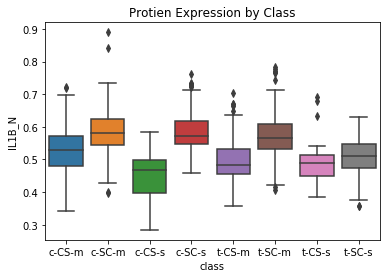

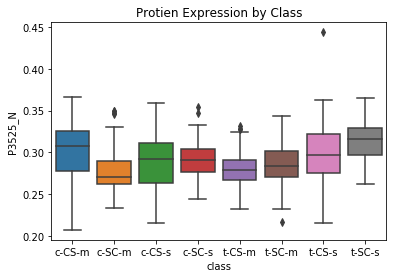

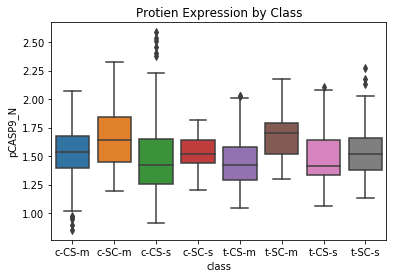

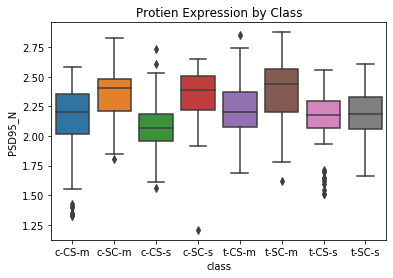

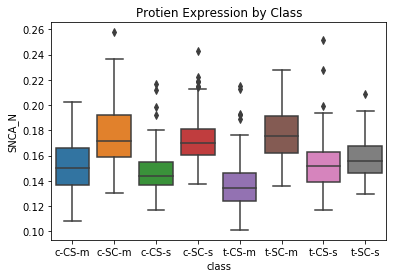

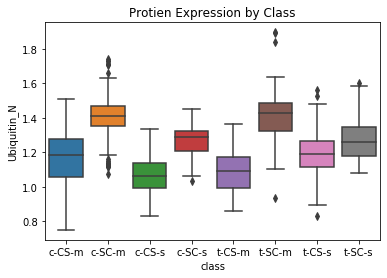

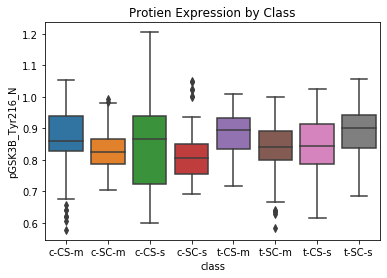

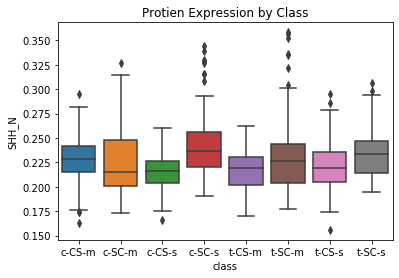

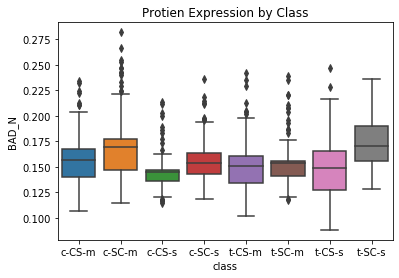

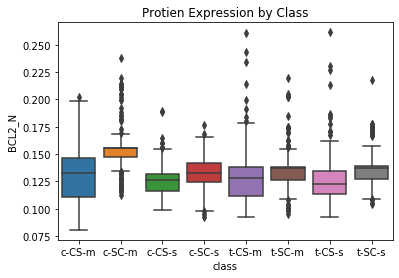

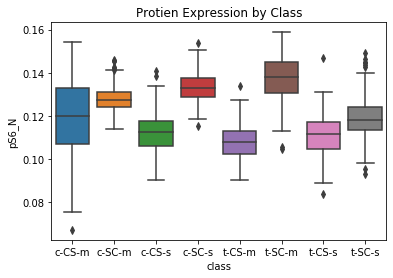

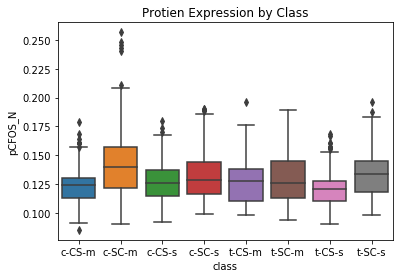

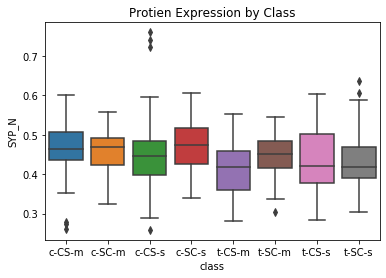

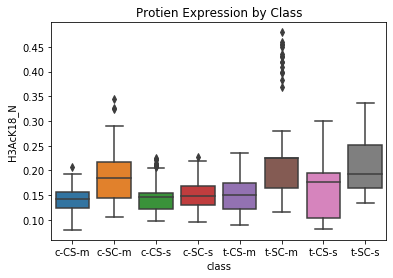

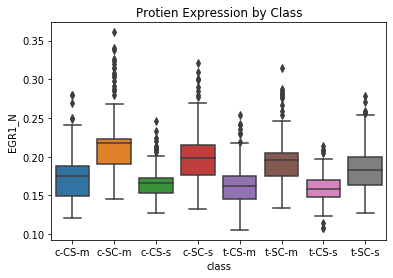

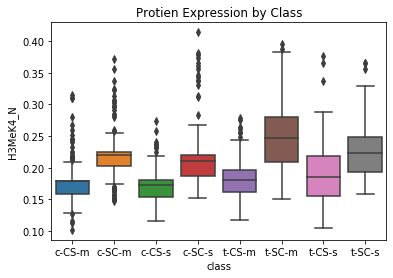

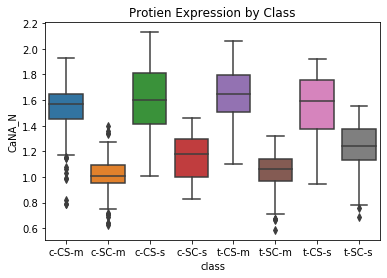

In [37]:
for p in proteins:
    plt.title("Protien Expression by Class")
    sns.boxplot(data = Mice_raw, x = 'class', y = p)
    plt.show()

In [38]:
#Calculating the standard deviation of each class and protein
for p in proteins:
    print(Mice_clean.groupby('class').std())

        DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
class                                                                          
c-CS-m  0.129722  0.153911  0.046883  0.320972  0.973575  0.024935  0.019315   
c-CS-s  0.529338  0.503299  0.054885  0.368772  1.001889  0.052908  0.033505   
c-SC-m  0.047923  0.068982  0.038587  0.286331  0.670048  0.037195  0.030927   
c-SC-s  0.046671  0.074120  0.043637  0.353018  0.872614  0.030627  0.023067   
t-CS-m  0.156636  0.187409  0.051175  0.379840  0.876532  0.027822  0.020831   
t-CS-s  0.139950  0.154217  0.043350  0.275957  0.636877  0.035932  0.018745   
t-SC-m  0.078622  0.077883  0.033216  0.258372  0.837798  0.038921  0.024047   
t-SC-s  0.073700  0.110211  0.056896  0.377737  0.999831  0.044707  0.022848   

        pCAMKII_N   pCREB_N    pELK_N    pERK_N    pJNK_N    PKCA_N    pMEK_N  \
class                                                                           
c-CS-m   0.926526  0.027469  0.302739

        DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
class                                                                          
c-CS-m  0.129722  0.153911  0.046883  0.320972  0.973575  0.024935  0.019315   
c-CS-s  0.529338  0.503299  0.054885  0.368772  1.001889  0.052908  0.033505   
c-SC-m  0.047923  0.068982  0.038587  0.286331  0.670048  0.037195  0.030927   
c-SC-s  0.046671  0.074120  0.043637  0.353018  0.872614  0.030627  0.023067   
t-CS-m  0.156636  0.187409  0.051175  0.379840  0.876532  0.027822  0.020831   
t-CS-s  0.139950  0.154217  0.043350  0.275957  0.636877  0.035932  0.018745   
t-SC-m  0.078622  0.077883  0.033216  0.258372  0.837798  0.038921  0.024047   
t-SC-s  0.073700  0.110211  0.056896  0.377737  0.999831  0.044707  0.022848   

        pCAMKII_N   pCREB_N    pELK_N    pERK_N    pJNK_N    PKCA_N    pMEK_N  \
class                                                                           
c-CS-m   0.926526  0.027469  0.302739

        DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
class                                                                          
c-CS-m  0.129722  0.153911  0.046883  0.320972  0.973575  0.024935  0.019315   
c-CS-s  0.529338  0.503299  0.054885  0.368772  1.001889  0.052908  0.033505   
c-SC-m  0.047923  0.068982  0.038587  0.286331  0.670048  0.037195  0.030927   
c-SC-s  0.046671  0.074120  0.043637  0.353018  0.872614  0.030627  0.023067   
t-CS-m  0.156636  0.187409  0.051175  0.379840  0.876532  0.027822  0.020831   
t-CS-s  0.139950  0.154217  0.043350  0.275957  0.636877  0.035932  0.018745   
t-SC-m  0.078622  0.077883  0.033216  0.258372  0.837798  0.038921  0.024047   
t-SC-s  0.073700  0.110211  0.056896  0.377737  0.999831  0.044707  0.022848   

        pCAMKII_N   pCREB_N    pELK_N    pERK_N    pJNK_N    PKCA_N    pMEK_N  \
class                                                                           
c-CS-m   0.926526  0.027469  0.302739

        DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
class                                                                          
c-CS-m  0.129722  0.153911  0.046883  0.320972  0.973575  0.024935  0.019315   
c-CS-s  0.529338  0.503299  0.054885  0.368772  1.001889  0.052908  0.033505   
c-SC-m  0.047923  0.068982  0.038587  0.286331  0.670048  0.037195  0.030927   
c-SC-s  0.046671  0.074120  0.043637  0.353018  0.872614  0.030627  0.023067   
t-CS-m  0.156636  0.187409  0.051175  0.379840  0.876532  0.027822  0.020831   
t-CS-s  0.139950  0.154217  0.043350  0.275957  0.636877  0.035932  0.018745   
t-SC-m  0.078622  0.077883  0.033216  0.258372  0.837798  0.038921  0.024047   
t-SC-s  0.073700  0.110211  0.056896  0.377737  0.999831  0.044707  0.022848   

        pCAMKII_N   pCREB_N    pELK_N    pERK_N    pJNK_N    PKCA_N    pMEK_N  \
class                                                                           
c-CS-m   0.926526  0.027469  0.302739

        DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
class                                                                          
c-CS-m  0.129722  0.153911  0.046883  0.320972  0.973575  0.024935  0.019315   
c-CS-s  0.529338  0.503299  0.054885  0.368772  1.001889  0.052908  0.033505   
c-SC-m  0.047923  0.068982  0.038587  0.286331  0.670048  0.037195  0.030927   
c-SC-s  0.046671  0.074120  0.043637  0.353018  0.872614  0.030627  0.023067   
t-CS-m  0.156636  0.187409  0.051175  0.379840  0.876532  0.027822  0.020831   
t-CS-s  0.139950  0.154217  0.043350  0.275957  0.636877  0.035932  0.018745   
t-SC-m  0.078622  0.077883  0.033216  0.258372  0.837798  0.038921  0.024047   
t-SC-s  0.073700  0.110211  0.056896  0.377737  0.999831  0.044707  0.022848   

        pCAMKII_N   pCREB_N    pELK_N    pERK_N    pJNK_N    PKCA_N    pMEK_N  \
class                                                                           
c-CS-m   0.926526  0.027469  0.302739

        DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
class                                                                          
c-CS-m  0.129722  0.153911  0.046883  0.320972  0.973575  0.024935  0.019315   
c-CS-s  0.529338  0.503299  0.054885  0.368772  1.001889  0.052908  0.033505   
c-SC-m  0.047923  0.068982  0.038587  0.286331  0.670048  0.037195  0.030927   
c-SC-s  0.046671  0.074120  0.043637  0.353018  0.872614  0.030627  0.023067   
t-CS-m  0.156636  0.187409  0.051175  0.379840  0.876532  0.027822  0.020831   
t-CS-s  0.139950  0.154217  0.043350  0.275957  0.636877  0.035932  0.018745   
t-SC-m  0.078622  0.077883  0.033216  0.258372  0.837798  0.038921  0.024047   
t-SC-s  0.073700  0.110211  0.056896  0.377737  0.999831  0.044707  0.022848   

        pCAMKII_N   pCREB_N    pELK_N    pERK_N    pJNK_N    PKCA_N    pMEK_N  \
class                                                                           
c-CS-m   0.926526  0.027469  0.302739

        DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
class                                                                          
c-CS-m  0.129722  0.153911  0.046883  0.320972  0.973575  0.024935  0.019315   
c-CS-s  0.529338  0.503299  0.054885  0.368772  1.001889  0.052908  0.033505   
c-SC-m  0.047923  0.068982  0.038587  0.286331  0.670048  0.037195  0.030927   
c-SC-s  0.046671  0.074120  0.043637  0.353018  0.872614  0.030627  0.023067   
t-CS-m  0.156636  0.187409  0.051175  0.379840  0.876532  0.027822  0.020831   
t-CS-s  0.139950  0.154217  0.043350  0.275957  0.636877  0.035932  0.018745   
t-SC-m  0.078622  0.077883  0.033216  0.258372  0.837798  0.038921  0.024047   
t-SC-s  0.073700  0.110211  0.056896  0.377737  0.999831  0.044707  0.022848   

        pCAMKII_N   pCREB_N    pELK_N    pERK_N    pJNK_N    PKCA_N    pMEK_N  \
class                                                                           
c-CS-m   0.926526  0.027469  0.302739

        DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
class                                                                          
c-CS-m  0.129722  0.153911  0.046883  0.320972  0.973575  0.024935  0.019315   
c-CS-s  0.529338  0.503299  0.054885  0.368772  1.001889  0.052908  0.033505   
c-SC-m  0.047923  0.068982  0.038587  0.286331  0.670048  0.037195  0.030927   
c-SC-s  0.046671  0.074120  0.043637  0.353018  0.872614  0.030627  0.023067   
t-CS-m  0.156636  0.187409  0.051175  0.379840  0.876532  0.027822  0.020831   
t-CS-s  0.139950  0.154217  0.043350  0.275957  0.636877  0.035932  0.018745   
t-SC-m  0.078622  0.077883  0.033216  0.258372  0.837798  0.038921  0.024047   
t-SC-s  0.073700  0.110211  0.056896  0.377737  0.999831  0.044707  0.022848   

        pCAMKII_N   pCREB_N    pELK_N    pERK_N    pJNK_N    PKCA_N    pMEK_N  \
class                                                                           
c-CS-m   0.926526  0.027469  0.302739

In [39]:
#Calcualting just the protein with the highest standard deviation
#http://www.datasciencemadesimple.com/standard-deviation-function-python-pandas-row-column/
Protein_std= Mice_clean.groupby('class').std()
Protein_std.sort_values(by= 'class',ascending=False)

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
class                                                                          
t-SC-s  0.073700  0.110211  0.056896  0.377737  0.999831  0.044707  0.022848   
t-SC-m  0.078622  0.077883  0.033216  0.258372  0.837798  0.038921  0.024047   
t-CS-s  0.139950  0.154217  0.043350  0.275957  0.636877  0.035932  0.018745   
t-CS-m  0.156636  0.187409  0.051175  0.379840  0.876532  0.027822  0.020831   
c-SC-s  0.046671  0.074120  0.043637  0.353018  0.872614  0.030627  0.023067   
c-SC-m  0.047923  0.068982  0.038587  0.286331  0.670048  0.037195  0.030927   
c-CS-s  0.529338  0.503299  0.054885  0.368772  1.001889  0.052908  0.033505   
c-CS-m  0.129722  0.153911  0.046883  0.320972  0.973575  0.024935  0.019315   

        pCAMKII_N   pCREB_N    pELK_N    pERK_N    pJNK_N    PKCA_N    pMEK_N  \
class                                                                           
t-SC-s   1.514613  0.033829  0.250408  0.091615  0.046742  0.067060  0.044556   
t-SC-m   1.018710  0.028202  0.164232  0.063067  0.036657  0.029856  0.037099   
t-CS-s   0.755425  0.028183  0.285628  0.241785  0.047906  0.052949  0.039849   
t-CS-m   1.505956  0.024670  0.287460  0.212233  0.044221  0.066332  0.032850   
c-SC-s   0.864917  0.029505  0.571705  0.056372  0.040177  0.039523  0.036075   
c-SC-m   0.847418  0.033489  0.263146  0.045737  0.041399  0.027966  0.042888   
c-CS-s   0.706755  0.038301  0.908641  0.680304  0.072862  0.047822  0.062129   
c-CS-m   0.926526  0.027469  0.302739  0.195403  0.030709  0.038414  0.030128   

          pNR1_N   pNR2A_N   pNR2B_N  pPKCAB_N    pRSK_N     AKT_N    BRAF_N  \
class                                                                          
t-SC-s  0.131384  0.147546  0.297943  0.379788  0.059402  0.095836  0.051386   
t-SC-m  0.086637  0.112708  0.211469  0.157958  0.041203  0.101639  0.050026   
t-CS-s  0.094346  0.155739  0.212284  0.460307  0.063167  0.081987  0.134312   
t-CS-m  0.120998  0.162097  0.237627  0.608067  0.083813  0.101549  0.122863   
c-SC-s  0.111942  0.140036  0.255941  0.271064  0.031805  0.082028  0.048356   
c-SC-m  0.094418  0.178203  0.225756  0.135874  0.047777  0.078439  0.053751   
c-CS-s  0.129504  0.188861  0.329835  0.411379  0.099561  0.178280  0.473213   
c-CS-m  0.110172  0.152334  0.253778  0.400179  0.061022  0.133535  0.118573   

        CAMKII_N    CREB_N     ELK_N     ERK_N   GSK3B_N     JNK_N     MEK_N  \
class                                                                          
t-SC-s  0.048542  0.023654  0.294825  0.592960  0.155482  0.032324  0.039301   
t-SC-m  0.056515  0.027234  0.208885  0.496349  0.130097  0.031053  0.033819   
t-CS-s  0.033911  0.017938  0.358507  0.636804  0.166835  0.021771  0.039784   
t-CS-m  0.043149  0.021355  0.327774  0.570559  0.253710  0.032770  0.038485   
c-SC-s  0.041103  0.020151  0.290263  0.546689  0.172318  0.028180  0.040146   
c-SC-m  0.049642  0.034502  0.177734  0.443649  0.153607  0.029025  0.036043   
c-CS-s  0.061406  0.029113  0.460782  0.672993  0.366621  0.053819  0.052498   
c-CS-m  0.045037  0.021208  0.385578  0.722838  0.188845  0.024002  0.034518   

          TRKA_N     RSK_N     APP_N  Bcatenin_N    SOD1_N    MTOR_N  \
class                                                                  
t-SC-s  0.123336  0.023140  0.067560    0.503043  0.241808  0.066726   
t-SC-m  0.109751  0.030379  0.042835    0.399100  0.294221  0.048514   
t-CS-s  0.106247  0.023284  0.049532    0.337091  0.032591  0.060270   
t-CS-m  0.134424  0.022410  0.055441    0.432374  0.032773  0.049400   
c-SC-s  0.118395  0.026171  0.047447    0.449961  0.229727  0.062193   
c-SC-m  0.093140  0.036470  0.046022    0.358327  0.107601  0.054823   
c-CS-s  0.136539  0.032333  0.051111    0.453690  0.049362  0.051478   
c-CS-m  0.103889  0.019838  0.037820    0.370498  0.035127  0.052758   

           P38_N   pMTOR_N   DSCR1_N   AMPKA_N    NR2B_N   pNUMB_N  RAPTO

In [40]:
#http://www.datasciencemadesimple.com/standard-deviation-function-python-pandas-row-column/
Protein_std= Mice_clean.std()
Protein_std.sort_values(ascending=False)

pCAMKII_N          1.293806
NR2A_N             0.931918
ERK_N              0.652512
pPKCG_N            0.578442
pPKCAB_N           0.481110
pELK_N             0.466403
Bcatenin_N         0.432306
ADARB1_N           0.361743
NR1_N              0.346819
pERK_N             0.344971
ELK_N              0.333267
CaNA_N             0.317126
SOD1_N             0.280336
pNR2B_N            0.270444
PSD95_N            0.254395
ITSN1_N            0.251316
DYRK1A_N           0.249058
pCASP9_N           0.248132
GSK3B_N            0.244430
BRAF_N             0.216141
pNR2A_N            0.187773
AcetylH3K9_N       0.185309
Ubiquitin_N        0.173580
P70S6_N            0.172838
pP70S6_N           0.156267
S6_N               0.137440
AKT_N              0.127257
pMTOR_N            0.122281
TRKA_N             0.120658
pNR1_N             0.117811
DSCR1_N            0.100461
pGSK3B_Tyr216_N    0.094311
P38_N              0.089167
NR2B_N             0.088079
IL1B_N             0.082057
Tau_N              0

# Feature Selection 

Seperating the protein expression levels from the class and feature columns. 

In [41]:
Mice_data = Mice_clean.drop(columns=['Genotype', 'Treatment','Behavior','class','MouseName', 'Mouse_Test'])
Mice_data_np= Mice_data.to_numpy()
Mice_data.head()

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   

   pCAMKII_N   pCREB_N    pELK_N    pERK_N    pJNK_N    PKCA_N    pMEK_N  \
0   2.373744  0.232224  1.750936  0.687906  0.306382  0.402698  0.296927   
1   2.292150  0.226972  1.596377  0.695006  0.299051  0.385987  0.281319   
2   2.283337  0.230247  1.561316  0.677348  0.291276  0.381002  0.281710   
3   2.152301  0.207004  1.595086  0.583277  0.296729  0.377087  0.313832   
4   2.134014  0.192158  1.504230  0.550960  0.286961  0.363502  0.277964   

     pNR1_N   pNR2A_N   pNR2B_N  pPKCAB_N    pRSK_N     AKT_N    BRAF_N  \
0  1.022060  0.605673  1.877684  2.308745  0.441599  0.859366  0.416289   
1  0.956676  0.587559  1.725774  2.043037  0.445222  0.834659  0.400364   
2  1.003635  0.602449  1.731873  2.017984  0.467668  0.814329  0.399847   
3  0.875390  0.520293  1.566852  2.132754  0.477671  0.727705  0.385639   
4  0.864912  0.507990  1.480059  2.013697  0.483416  0.687794  0.367531   

   CAMKII_N    CREB_N     ELK_N     ERK_N   GSK3B_N     JNK_N     MEK_N  \
0  0.369608  0.178944  1.866358  3.685247  1.537227  0.264526  0.319677   
1  0.356178  0.173680  1.761047  3.485287  1.509249  0.255727  0.304419   
2  0.368089  0.173905  1.765544  3.571456  1.501244  0.259614  0.311747   
3  0.362970  0.179449  1.286277  2.970137  1.419710  0.259536  0.279218   
4  0.355311  0.174836  1.324695  2.896334  1.359876  0.250705  0.273667   

     TRKA_N     RSK_N     APP_N  Bcatenin_N    SOD1_N    MTOR_N     P38_N  \
0  0.813866  0.165846  0.453910    3.037621  0.369510  0.458539  0.335336   
1  0.780504  0.157194  0.430940    2.921882  0.342279  0.423560  0.324835   
2  0.785154  0.160895  0.423187    2.944136  0.343696  0.425005  0.324852   
3  0.734492  0.162210  0.410615    2.500204  0.344509  0.429211  0.330121   
4  0.702699  0.154827  0.398550    2.456560  0.329126  0.408755  0.313415   

    pMTOR_N   DSCR1_N   AMPKA_N    NR2B_N   pNUMB_N  RAPTOR_N   TIAM1_N  \
0  0.825192  0.576916  0.448099  0.586271  0.394721  0.339571  0.482864   
1  0.761718  0.545097  0.420876  0.545097  0.368255  0.321959  0.454519   
2  0.757031  0.543620  0.404630  0.552994  0.363880  0.313086  0.447197   
3  0.746980  0.546763  0.386860  0.547849  0.366771  0.328492  0.442650   
4  0.691956  0.536860  0.360816  0.512824  0.351551  0.312206  0.419095   

   pP70S6_N    NUMB_N   P70S6_N  pGSK3B_N   pPKCG_N    CDK5_N      S6_N  \
0  0.294170  0.182150  0.842725  0.192608  1.443091  0.294700  0.354605   
1  0.276431  0.182086  0.847615  0.194815  1.439460  0.294060  0.354548   
2  0.256648  0.184388  0.856166  0.200737  1.524364  0.301881  0.386087   
3  0.398534  0.161768  0.760234  0.184169  1.612382  0.296382  0.290680   
4  0.393447  0.160200  0.768113  0.185718  1.645807  0.296829  0.309345   

   ADARB1_N  AcetylH3K9_N    RRP1_N     BAX_N     ARC_N   ERBB4_N    nNOS_N  \
0  1.339070      0.170119  0.159102  0.188852  0.106305  0.144989  0.176668   
1  1.306323      0.171427  0.158129  0.184570  0.106592  0.150471  0.178309   
2  1.279600      0.185456  0.148696  0.190532  0.108303  0.145330  0.176213   
3  1.198765      0.159799  0.166112  0.185323  0.103184  0.140656  0.163804   
4  1.206995      0.164650  0.160687  0.188221  0.104784  0.141983  0.167710   

      Tau_N    GFAP_N   GluR3_N   GluR4_N    IL1B_N   P3525_N  pCASP9_N  \
0  0.125190  0.115291  0.228043  0.142756  0.430957  0.247538  1.603310   
1  0.134275  0.118235  0.238073  0.142037  0.457156  0.257632  1.671738   
2  0.132560  0.117760  0.244817  0.142445  0.510472  0.255343  1.663550   
3  0.123210  0.117439  0.234947  0.145068  0.430996  

In [42]:
Mice_target= Mice_clean['class']
Mice_target_np= Mice_target.to_numpy()
print(Mice_target_np)

['c-CS-m' 'c-CS-m' 'c-CS-m' ... 't-SC-s' 't-SC-s' 't-SC-s']


Hill Climbing for feature selection 
https://www.geeksforgeeks.org/introduction-hill-climbing-artificial-intelligence/
    
Convert pandas dataframe into an numpy arrray. 
https://pythonexamples.org/convert-pandas-dataframe-to-numpy-array/

In [43]:

from sklearn.utils import shuffle
new_Ind = []
cur_MaxScore = 0.0
col_num = 77
col_Ind_Random = shuffle(range(0,col_num), random_state=1)

for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = Mice_data_np[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData, Mice_target_np, test_size=0.3, random_state=0)
    clf = KNeighborsClassifier(5, weights='distance', p=1)
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))
print("There are " + str(len(new_Ind)) + " features selected:")
print(new_Ind)


Score with 1 selected features: 0.1574074074074074
Score with 2 selected features: 0.2037037037037037
Score with 3 selected features: 0.2777777777777778
Score with 4 selected features: 0.3395061728395062
Score with 5 selected features: 0.44753086419753085
Score with 6 selected features: 0.47530864197530864
Score with 7 selected features: 0.5
Score with 8 selected features: 0.5
Score with 9 selected features: 0.5462962962962963
Score with 10 selected features: 0.5679012345679012
Score with 11 selected features: 0.7191358024691358
Score with 12 selected features: 0.7407407407407407
Score with 13 selected features: 0.7962962962962963
Score with 14 selected features: 0.8950617283950617
Score with 15 selected features: 0.9074074074074074
Score with 16 selected features: 0.9104938271604939
Score with 17 selected features: 0.9197530864197531
Score with 18 selected features: 0.9320987654320988
Score with 19 selected features: 0.941358024691358
Score with 20 selected features: 0.941358024691358

In [44]:
print(sorted(new_Ind))
#Sorted the indexes of the most relevant proteins.

[0, 1, 7, 10, 12, 13, 15, 16, 17, 18, 19, 22, 26, 29, 30, 31, 32, 34, 35, 36, 43, 45, 46, 48, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 67, 68, 69, 70, 72, 73, 74, 75, 76]


In [45]:
#Select the data that are  the most significant features 
Mice_selected= Mice_data.iloc[0:,[0, 7, 10, 11, 13, 14, 15, 17, 19, 20, 22, 26, 27, 30, 31, 32, 34, 36, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 69, 70, 71, 73, 74, 75, 76] ]
Mice_selected.head()

DYRK1A_N  pCAMKII_N    pERK_N    pJNK_N    pMEK_N    pNR1_N   pNR2A_N  \
0  0.503644   2.373744  0.687906  0.306382  0.296927  1.022060  0.605673   
1  0.514617   2.292150  0.695006  0.299051  0.281319  0.956676  0.587559   
2  0.509183   2.283337  0.677348  0.291276  0.281710  1.003635  0.602449   
3  0.442107   2.152301  0.583277  0.296729  0.313832  0.875390  0.520293   
4  0.434940   2.134014  0.550960  0.286961  0.277964  0.864912  0.507990   

   pPKCAB_N     AKT_N    BRAF_N    CREB_N     JNK_N     MEK_N     APP_N  \
0  2.308745  0.859366  0.416289  0.178944  0.264526  0.319677  0.453910   
1  2.043037  0.834659  0.400364  0.173680  0.255727  0.304419  0.430940   
2  2.017984  0.814329  0.399847  0.173905  0.259614  0.311747  0.423187   
3  2.132754  0.727705  0.385639  0.179449  0.259536  0.279218  0.410615   
4  2.013697  0.687794  0.367531  0.174836  0.250705  0.273667  0.398550   

   Bcatenin_N    SOD1_N     P38_N   DSCR1_N   pNUMB_N  RAPTOR_N   TIAM1_N  \
0    3.037621  0.369510  0.335336  0.576916  0.394721  0.339571  0.482864   
1    2.921882  0.342279  0.324835  0.545097  0.368255  0.321959  0.454519   
2    2.944136  0.343696  0.324852  0.543620  0.363880  0.313086  0.447197   
3    2.500204  0.344509  0.330121  0.546763  0.366771  0.328492  0.442650   
4    2.456560  0.329126  0.313415  0.536860  0.351551  0.312206  0.419095   

   pP70S6_N    NUMB_N   P70S6_N  pGSK3B_N   pPKCG_N    CDK5_N      S6_N  \
0  0.294170  0.182150  0.842725  0.192608  1.443091  0.294700  0.354605   
1  0.276431  0.182086  0.847615  0.194815  1.439460  0.294060  0.354548   
2  0.256648  0.184388  0.856166  0.200737  1.524364  0.301881  0.386087   
3  0.398534  0.161768  0.760234  0.184169  1.612382  0.296382  0.290680   
4  0.393447  0.160200  0.768113  0.185718  1.645807  0.296829  0.309345   

   ADARB1_N    RRP1_N     BAX_N     ARC_N   ERBB4_N    nNOS_N     Tau_N  \
0  1.339070  0.159102  0.188852  0.106305  0.144989  0.176668  0.125190   
1  1.306323  0.158129  0.184570  0.106592  0.150471  0.178309  0.134275   
2  1.279600  0.148696  0.190532  0.108303  0.145330  0.176213  0.132560   
3  1.198765  0.166112  0.185323  0.103184  0.140656  0.163804  0.123210   
4  1.206995  0.160687  0.188221  0.104784  0.141983  0.167710  0.136838   

     GFAP_N   GluR3_N   GluR4_N    IL1B_N   P3525_N  pCASP9_N   PSD95_N  \
0  0.115291  0.228043  0.142756  0.430957  0.247538  1.603310  2.014875   
1  0.118235  0.238073  0.142037  0.457156  0.257632  1.671738  2.004605   
2  0.117760  0.244817  0.142445  0.510472  0.255343  1.663550  2.016831   
3  0.117439  0.234947  0.145068  0.430996  0.251103  1.484624  1.957233   
4  0.116048  0.255528  0.140871  0.481227  0.251773  1.534835  2.009109   

     BCL2_N     pS6_N   pCFOS_N  H3AcK18_N    EGR1_N  H3MeK4_N    CaNA_N  
0  0.132539  0.106305  0.108336   0.114783  0.131790  0.128186  1.675652  
1  0.132539  0.106592  0.104315   0.111974  0.135103  0.131119  1.743610  
2  0.132539  0.108303  0.106219   0.111883  0.133362  0.127431  1.926427  
3  0.132539  0.103184  0.111262   0.130405  0.147444  0.146901  1.700563  
4  0.132539  0.104784  0.110694   0.118481  0.140314  0.148380  1.839730

# Classification Modelling

Here we need to prepare teh data for the decison tree classifier. 
First we test the perfomance of the default parameters


To plot the confusion matrix with labels https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix


# Decision Tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
[[28  4  0  0  5  0  0  0]
 [ 4 31  0  0  2  2  0  0]
 [ 0  3 33  3  1  0  1  2]
 [ 0  0  0 41  0  0  3  0]
 [ 3 10  0  0 34  1  0  2]
 [ 1  0  0  0  1 32  0  0]
 [ 0  0  1  2  0  0 32  0]
 [ 0  0  1  0  0  0  1 40]]
              precision    recall  f1-score   support

      c-CS-m       0.78      0.76      0.77        37
      c-CS-s       0.65      0.79      0.71        39
      c-SC-m       0.94      0.77      0.85        43
      c-SC-s       0.89      0.93      0.91        44
      t-CS-m       0.79      0.68      0.73        50
      t-CS-s       0.91      0.

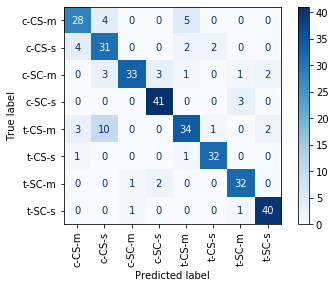

In [46]:
X_train, X_test, y_train, y_test = train_test_split(Mice_selected,Mice_target,test_size=0.3,random_state=0)
clf =DecisionTreeClassifier()
print(clf)
fit = clf.fit(X_train,y_train)
y_pre =fit.predict(X_test)
y_pre
cm=confusion_matrix(y_test,y_pre)
cm
print(cm)
plot_confusion_matrix(clf, X_test, y_test, xticks_rotation='vertical', cmap=plt.cm.Blues)
print(classification_report(y_test,y_pre))

References for the below: 
Precision-Recall curve: https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py

Tailor code for DT: https://stackoverflow.com/questions/45376410/how-to-get-roc-curve-for-decision-tree

Linear Binaraize documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.label_binarize.html#sklearn.preprocessing.label_binarize


In [47]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize


X=Mice_selected
y=Mice_target

Y = label_binarize(y, classes=['c-CS-m', 'c-CS-s', 'c-SC-m','c-SC-s','t-CS-m','t-CS-s','t-SC-m','t-SC-s'])
n_classes = Y.shape[1]
# Split into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=0)
clf =DecisionTreeClassifier()

fit = clf.fit(X_train,y_train)
#y_pre =fit.predict(X_test)
y_score = clf.fit(X_train, y_train).predict_proba(X_test)

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_score,average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.78


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.78')

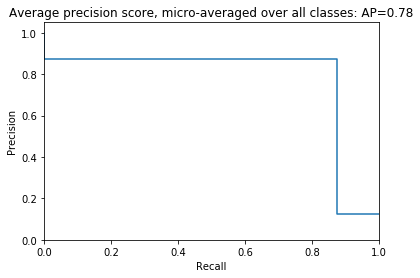

In [48]:
plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision["micro"]))


Testing entropy 

In [49]:
#run the KFlod cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=15,random_state=4, shuffle=True)

##Instantiatie my chosen model 
clf
print(clf)

for k, (train_index, test_index) in enumerate(kf.split(Mice_selected)):
 
    X_train, X_test = Mice_selected.iloc[train_index], Mice_selected.iloc[test_index]
    y_train, y_test = Mice_target.iloc[train_index], Mice_target.iloc[test_index]
     
    clf.fit(X_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))
    
print("Fold,Mean ",k, clf.score(X_test, y_test).mean())

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
[fold 0] score: 0.83333
[fold 1] score: 0.88889
[fold 2] score: 0.86111
[fold 3] score: 0.88889
[fold 4] score: 0.83333
[fold 5] score: 0.87500
[fold 6] score: 0.83333
[fold 7] score: 0.94444
[fold 8] score: 0.80556
[fold 9] score: 0.87500
[fold 10] score: 0.87500
[fold 11] score: 0.81944
[fold 12] score: 0.87500
[fold 13] score: 0.86111
[fold 14] score: 0.84722
Fold,Mean  14 0.8472222222222222


Feature: 0, Score: 0.02761
Feature: 1, Score: 0.07698
Feature: 2, Score: 0.02006
Feature: 3, Score: 0.02287
Feature: 4, Score: 0.01123
Feature: 5, Score: 0.02507
Feature: 6, Score: 0.00806
Feature: 7, Score: 0.03563
Feature: 8, Score: 0.01476
Feature: 9, Score: 0.04596
Feature: 10, Score: 0.00852
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.07563
Feature: 14, Score: 0.00353
Feature: 15, Score: 0.17342
Feature: 16, Score: 0.04291
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.03090
Feature: 19, Score: 0.00170
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.03153
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00406
Feature: 25, Score: 0.11634
Feature: 26, Score: 0.00446
Feature: 27, Score: 0.00395
Feature: 28, Score: 0.00825
Feature: 29, Score: 0.00227
Feature: 30, Score: 0.00923
Feature: 31, Score: 0.00540
Feature: 32, Score: 0.00353
Feature: 33, Score: 0.01315
Feature: 34, Score: 0.05851
Feature: 35, Score: 0.00219
Fe

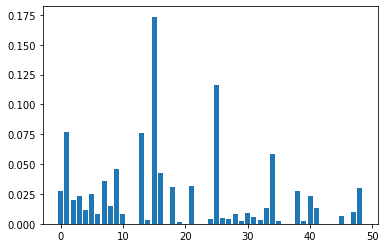

In [50]:
dt_importance = clf.feature_importances_
names = np.array(Mice_target)
from matplotlib import pyplot
# summarize feature importance
for i,v in enumerate(dt_importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(dt_importance))], dt_importance)
pyplot.show()

Text(0, 0.5, 'Proteins')

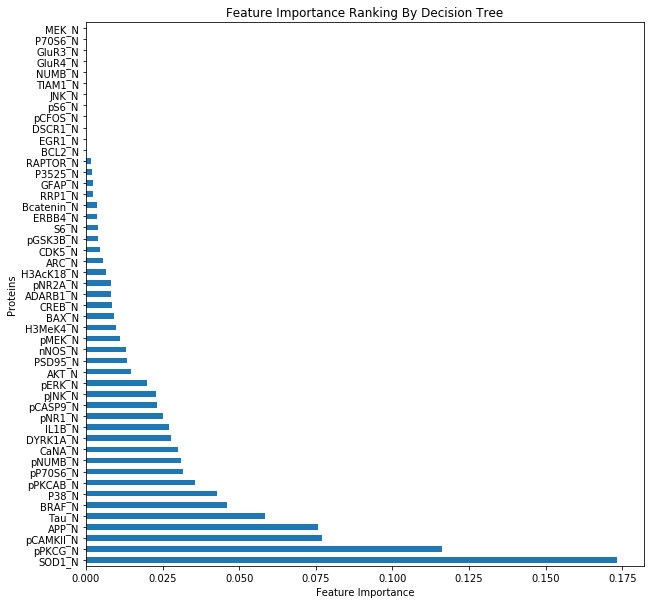

In [51]:
dt_feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
dt_feat_importances.nlargest(50).plot(kind='barh', figsize=(10,10))
plt.title('Feature Importance Ranking By Decision Tree')
plt.xlabel('Feature Importance')
plt.ylabel('Proteins')

#https://stackoverflow.com/questions/44101458/random-forest-feature-importance-chart-using-python

In [52]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=15,random_state=999, shuffle=True)

##Instantiatie my chosen model 
clf
print(clf)

for k, (train_index, test_index) in enumerate(kf.split(Mice_selected)):
 
    X_train, X_test = Mice_selected.iloc[train_index], Mice_selected.iloc[test_index]
    y_train, y_test = Mice_target.iloc[train_index], Mice_target.iloc[test_index]
     
    clf.fit(X_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))
    
print("Fold,Mean ",k, clf.score(X_test, y_test).mean())

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
[fold 0] score: 0.86111
[fold 1] score: 0.91667
[fold 2] score: 0.86111
[fold 3] score: 0.84722
[fold 4] score: 0.79167
[fold 5] score: 0.83333
[fold 6] score: 0.90278
[fold 7] score: 0.86111
[fold 8] score: 0.79167
[fold 9] score: 0.81944
[fold 10] score: 0.91667
[fold 11] score: 0.95833
[fold 12] score: 0.91667
[fold 13] score: 0.80556
[fold 14] score: 0.90278
Fold,Mean  14 0.9027777777777778


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
[[24  9  0  0  4  0  0  0]
 [ 2 30  0  0  2  5  0  0]
 [ 0  5 32  4  0  0  2  0]
 [ 0  0  0 41  0  0  3  0]
 [ 1  8  0  0 40  1  0  0]
 [ 2  2  0  0  2 28  0  0]
 [ 0  0  0  1  0  0 34  0]
 [ 0  0  1  0  0  0  1 40]]
              precision    recall  f1-score   support

      c-CS-m       0.83      0.65      0.73        37
      c-CS-s       0.56      0.77      0.65        39
      c-SC-m       0.97      0.74      0.84        43
      c-SC-s       0.89      0.93      0.91        44
      t-CS-m       0.83      0.80      0.82        50
      t-CS-s       0.82     

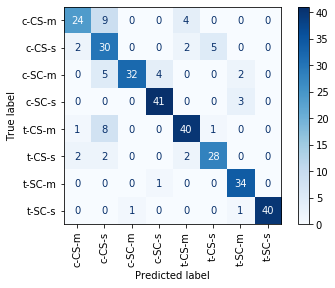

In [53]:
X_train, X_test, y_train, y_test = train_test_split(Mice_selected,Mice_target,test_size=0.3,random_state=0)
clf =DecisionTreeClassifier(criterion= 'entropy')
print(clf)
fit = clf.fit(X_train,y_train)
y_pre =fit.predict(X_test)
y_pre
cm=confusion_matrix(y_test,y_pre)
cm
print(cm)
plot_confusion_matrix(clf, X_test, y_test, xticks_rotation='vertical', cmap=plt.cm.Blues)
print(classification_report(y_test,y_pre))

In [54]:
X=Mice_selected
y=Mice_target

Y = label_binarize(y, classes=['c-CS-m', 'c-CS-s', 'c-SC-m','c-SC-s','t-CS-m','t-CS-s','t-SC-m','t-SC-s'])
n_classes = Y.shape[1]
# Split into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=0)

clf =DecisionTreeClassifier(criterion= 'entropy')
fit = clf.fit(X_train,y_train)
#y_pre =fit.predict(X_test)
y_score = clf.fit(X_train, y_train).predict_proba(X_test)

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_score,average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.71


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.71')

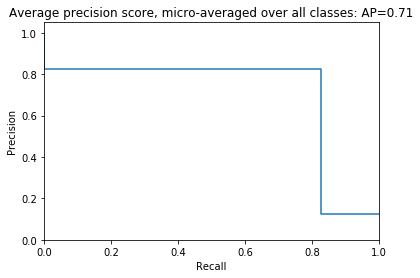

In [55]:
plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision["micro"]))


In [56]:
#run the KFlod cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=15,random_state=4, shuffle=True)

##Instantiatie my chosen model 
clf
print(clf)

for k, (train_index, test_index) in enumerate(kf.split(Mice_selected)):
 
    X_train, X_test = Mice_selected.iloc[train_index], Mice_selected.iloc[test_index]
    y_train, y_test = Mice_target.iloc[train_index], Mice_target.iloc[test_index]
     
    clf.fit(X_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))
    
print("Fold,Mean ",k, clf.score(X_test, y_test).mean())

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
[fold 0] score: 0.80556
[fold 1] score: 0.87500
[fold 2] score: 0.83333
[fold 3] score: 0.84722
[fold 4] score: 0.84722
[fold 5] score: 0.93056
[fold 6] score: 0.88889
[fold 7] score: 0.93056
[fold 8] score: 0.83333
[fold 9] score: 0.81944
[fold 10] score: 0.84722
[fold 11] score: 0.86111
[fold 12] score: 0.88889
[fold 13] score: 0.95833
[fold 14] score: 0.88889
Fold,Mean  14 0.8888888888888888


Looks like the gini is the preferred metric with the greater accuracy f1 and precision.

However there is a greater K- folds cross validation average and a lower precision and recall. 

In [57]:
X_train, X_test, y_train, y_test = train_test_split(Mice_selected,Mice_target,test_size=0.4,random_state=0)
clf =DecisionTreeClassifier()

##Import Grisd search CV to narrow down the optimum set of parametners
from sklearn.model_selection import StratifiedKFold,cross_val_score,GridSearchCV

cv_method = StratifiedKFold(n_splits=3,shuffle=True, random_state=0)

In [58]:
param_grid_DT = {'max_depth':range(2,100,50), 'min_samples_leaf':[1,2,3,4,5,10,15], 'min_samples_split':[2,3,4,5,10,15],'criterion' : ['gini','entropy']}
param_grid_DT

{'max_depth': range(2, 100, 50),
 'min_samples_leaf': [1, 2, 3, 4, 5, 10, 15],
 'min_samples_split': [2, 3, 4, 5, 10, 15],
 'criterion': ['gini', 'entropy']}

In [59]:
gs_DT = GridSearchCV(DecisionTreeClassifier(criterion = 'gini'),param_grid=param_grid_DT, cv=cv_method,scoring='accuracy')

gs_DT.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
         

In [60]:
best_clf = gs_DT.best_estimator_
best_clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=52, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [61]:
print(gs_DT.best_score_)
print(gs_DT.best_params_)

0.8024691358024691
{'criterion': 'entropy', 'max_depth': 52, 'min_samples_leaf': 1, 'min_samples_split': 3}


[[27  8  0  0  2  0  0  0]
 [ 2 29  0  0  5  3  0  0]
 [ 3  1 35  3  1  0  0  0]
 [ 0  0  0 41  0  0  3  0]
 [ 2  6  0  0 41  1  0  0]
 [ 2  2  0  0  2 28  0  0]
 [ 0  0  1  1  0  0 33  0]
 [ 0  0  0  0  0  0  2 40]]
              precision    recall  f1-score   support

      c-CS-m       0.75      0.73      0.74        37
      c-CS-s       0.63      0.74      0.68        39
      c-SC-m       0.97      0.81      0.89        43
      c-SC-s       0.91      0.93      0.92        44
      t-CS-m       0.80      0.82      0.81        50
      t-CS-s       0.88      0.82      0.85        34
      t-SC-m       0.87      0.94      0.90        35
      t-SC-s       1.00      0.95      0.98        42

    accuracy                           0.85       324
   macro avg       0.85      0.84      0.85       324
weighted avg       0.85      0.85      0.85       324



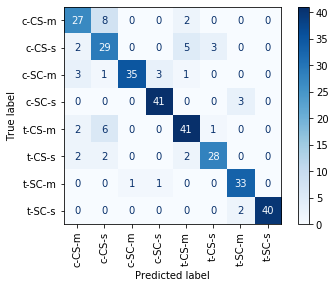

In [62]:
X_train, X_test, y_train, y_test = train_test_split(Mice_selected,Mice_target,test_size=0.3,random_state=0)

fit= best_clf.fit(X_train,y_train)
y_pre =fit.predict(X_test)
y_pre
cm=confusion_matrix(y_test,y_pre)
cm
print(cm)
plot_confusion_matrix(best_clf, X_test, y_test, xticks_rotation='vertical', cmap=plt.cm.Blues)
print(classification_report(y_test,y_pre))

In [63]:
X=Mice_selected
y=Mice_target

Y = label_binarize(y, classes=['c-CS-m', 'c-CS-s', 'c-SC-m','c-SC-s','t-CS-m','t-CS-s','t-SC-m','t-SC-s'])
n_classes = Y.shape[1]
# Split into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=0)

clf =best_clf
fit = clf.fit(X_train,y_train)
#y_pre =fit.predict(X_test)
y_score = clf.fit(X_train, y_train).predict_proba(X_test)

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_score,average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.71


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.71')

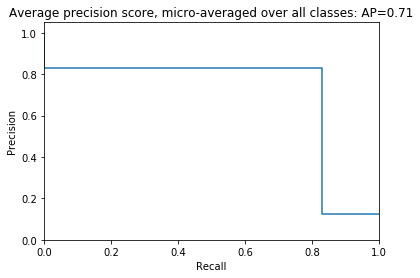

In [64]:
plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision["micro"]))


In [65]:
#run the KFlod cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=15,random_state=4, shuffle=True)

##Instantiatie my chosen model 
best_clf
print(best_clf)

for k, (train_index, test_index) in enumerate(kf.split(Mice_selected)):
 
    X_train, X_test = Mice_selected.iloc[train_index], Mice_selected.iloc[test_index]
    y_train, y_test = Mice_target.iloc[train_index], Mice_target.iloc[test_index]
     
    clf.fit(X_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))
    
print("Fold,Mean ",k, clf.score(X_test, y_test).mean())

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=52, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
[fold 0] score: 0.79167
[fold 1] score: 0.86111
[fold 2] score: 0.86111
[fold 3] score: 0.84722
[fold 4] score: 0.87500
[fold 5] score: 0.90278
[fold 6] score: 0.88889
[fold 7] score: 0.94444
[fold 8] score: 0.81944
[fold 9] score: 0.81944
[fold 10] score: 0.90278
[fold 11] score: 0.84722
[fold 12] score: 0.87500
[fold 13] score: 0.88889
[fold 14] score: 0.88889
Fold,Mean  14 0.8888888888888888


Higher k folds average, lower precisison and f1-scores and precision recall. 

In [66]:
X_train, X_test, y_train, y_test = train_test_split(Mice_data,Mice_target,test_size=0.3,random_state=0)
clf =DecisionTreeClassifier()

param_grid = {'max_features':range(2,10,50), 'min_samples_leaf':[1,2,3,4,5], 'min_samples_split':[2,3,4,5],'criterion' : ['gini','entropy']}
param_grid 

grid_obj = GridSearchCV(clf, param_grid,cv=10,scoring= 'f1_macro')
grid_fit = grid_obj.fit(X_train, y_train)

In [67]:
best_clf = grid_fit.best_estimator_
best_clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [68]:
print(grid_obj.best_score_)
print(grid_obj.best_params_)

0.7093311402534465
{'criterion': 'entropy', 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 3}


In [69]:
scores = cross_val_score(best_clf, X_train, y_train, cv=10, scoring='f1_macro')
scores.mean()

0.676102665409821

[[27  5  0  0  1  1  0  3]
 [ 7 28  0  0  1  1  0  2]
 [ 0  0 34  1  0  1  6  1]
 [ 2  2  5 32  0  0  3  0]
 [ 6  6  4  0 24  8  1  1]
 [ 3  1  1  0  9 20  0  0]
 [ 3  0  9  1  0  1 20  1]
 [ 0  4  1  1  0  9  1 26]]
              precision    recall  f1-score   support

      c-CS-m       0.56      0.73      0.64        37
      c-CS-s       0.61      0.72      0.66        39
      c-SC-m       0.63      0.79      0.70        43
      c-SC-s       0.91      0.73      0.81        44
      t-CS-m       0.69      0.48      0.56        50
      t-CS-s       0.49      0.59      0.53        34
      t-SC-m       0.65      0.57      0.61        35
      t-SC-s       0.76      0.62      0.68        42

    accuracy                           0.65       324
   macro avg       0.66      0.65      0.65       324
weighted avg       0.67      0.65      0.65       324



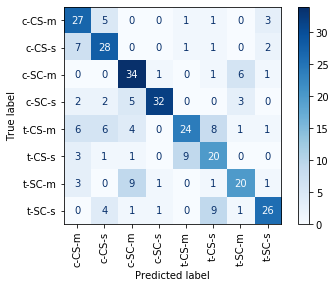

In [70]:
fit= best_clf.fit(X_train,y_train)
y_pre =fit.predict(X_test)
y_pre
cm=confusion_matrix(y_test,y_pre)
print(cm)
plot_confusion_matrix(best_clf, X_test, y_test, xticks_rotation='vertical', cmap=plt.cm.Blues)
print(classification_report(y_test,y_pre))
##Limiting the number of features actually worsens the result. 

In [71]:
X=Mice_selected
y=Mice_target

Y = label_binarize(y, classes=['c-CS-m', 'c-CS-s', 'c-SC-m','c-SC-s','t-CS-m','t-CS-s','t-SC-m','t-SC-s'])
n_classes = Y.shape[1]
# Split into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=0)

clf =best_clf
fit = clf.fit(X_train,y_train)
#y_pre =fit.predict(X_test)
y_score = clf.fit(X_train, y_train).predict_proba(X_test)

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_score,average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.50


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.50')

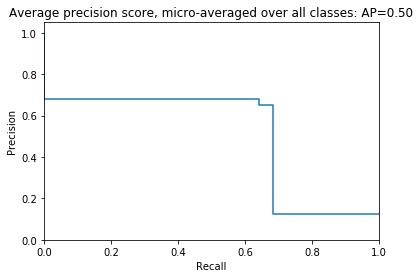

In [72]:
plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision["micro"]))


In [73]:
#run the KFlod cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=15,random_state=4, shuffle=True)

##Instantiatie my chosen model 
best_clf
print(best_clf)

for k, (train_index, test_index) in enumerate(kf.split(Mice_selected)):
 
    X_train, X_test = Mice_selected.iloc[train_index], Mice_selected.iloc[test_index]
    y_train, y_test = Mice_target.iloc[train_index], Mice_target.iloc[test_index]
     
    clf.fit(X_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))
    
print("Fold,Mean ",k, clf.score(X_test, y_test).mean())

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
[fold 0] score: 0.72222
[fold 1] score: 0.70833
[fold 2] score: 0.80556
[fold 3] score: 0.76389
[fold 4] score: 0.81944
[fold 5] score: 0.70833
[fold 6] score: 0.68056
[fold 7] score: 0.79167
[fold 8] score: 0.76389
[fold 9] score: 0.79167
[fold 10] score: 0.70833
[fold 11] score: 0.81944
[fold 12] score: 0.69444
[fold 13] score: 0.73611
[fold 14] score: 0.76389
Fold,Mean  14 0.7638888888888888


# KNN

KNN with default parameters. 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
[[37  0  0  0  0  0  0  0]
 [ 4 32  0  0  0  3  0  0]
 [ 0  0 39  1  0  0  3  0]
 [ 0  0  0 44  0  0  0  0]
 [ 5  3  0  0 40  1  0  1]
 [ 4  2  0  0  1 27  0  0]
 [ 0  0  5  0  0  0 30  0]
 [ 0  0  2  0  0  0  0 40]]
              precision    recall  f1-score   support

      c-CS-m       0.74      1.00      0.85        37
      c-CS-s       0.86      0.82      0.84        39
      c-SC-m       0.85      0.91      0.88        43
      c-SC-s       0.98      1.00      0.99        44
      t-CS-m       0.98      0.80      0.88        50
      t-CS-s       0.87      0.79      0.83        34
      t-SC-m       0.91      0.86      0.88        35
      t-SC-s       0.98      0.95      0.96        42

    accuracy                           0.89       324
   macro avg       0.90      0.89      0.89       324


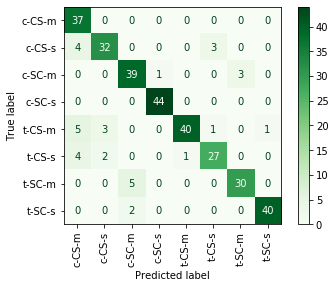

In [74]:
X_train, X_test, y_train, y_test = train_test_split(Mice_data,Mice_target,test_size=0.3,random_state=0)
clf =KNeighborsClassifier()
print(clf)
fit = clf.fit(X_train,y_train)
y_pre =fit.predict(X_test)
y_pre
cm=confusion_matrix(y_test,y_pre)
cm
print(cm)
plot_confusion_matrix(clf, X_test, y_test, xticks_rotation='vertical', cmap=plt.cm.Greens)
print(classification_report(y_test,y_pre))

In [75]:
#run the KFlod cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=15,random_state=4, shuffle=True)

##Instantiatie my chosen model 
clf
print(clf)

for k, (train_index, test_index) in enumerate(kf.split(Mice_selected)):
 
    X_train, X_test = Mice_selected.iloc[train_index], Mice_selected.iloc[test_index]
    y_train, y_test = Mice_target.iloc[train_index], Mice_target.iloc[test_index]
     
    clf.fit(X_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))
    
print("Fold,Mean ",k, clf.score(X_test, y_test).mean())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
[fold 0] score: 0.97222
[fold 1] score: 0.98611
[fold 2] score: 0.97222
[fold 3] score: 0.98611
[fold 4] score: 0.98611
[fold 5] score: 0.97222
[fold 6] score: 0.95833
[fold 7] score: 0.95833
[fold 8] score: 0.97222
[fold 9] score: 1.00000
[fold 10] score: 0.98611
[fold 11] score: 0.95833
[fold 12] score: 0.95833
[fold 13] score: 1.00000
[fold 14] score: 0.98611
Fold,Mean  14 0.9861111111111112


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')
[[37  0  0  0  0  0  0  0]
 [ 1 36  0  0  0  2  0  0]
 [ 0  0 41  1  0  0  1  0]
 [ 0  0  0 44  0  0  0  0]
 [ 4  0  0  0 45  0  0  1]
 [ 1  0  0  0  0 33  0  0]
 [ 0  0  2  0  0  0 33  0]
 [ 0  0  1  0  0  0  0 41]]
              precision    recall  f1-score   support

      c-CS-m       0.86      1.00      0.92        37
      c-CS-s       1.00      0.92      0.96        39
      c-SC-m       0.93      0.95      0.94        43
      c-SC-s       0.98      1.00      0.99        44
      t-CS-m       1.00      0.90      0.95        50
      t-CS-s       0.94      0.97      0.96        34
      t-SC-m       0.97      0.94      0.96        35
      t-SC-s       0.98      0.98      0.98        42

    accuracy                           0.96       324
   macro avg       0.96      0.96      0.96       324

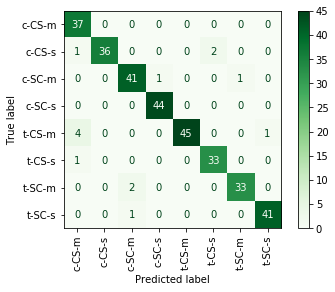

In [76]:
X_train, X_test, y_train, y_test = train_test_split(Mice_data,Mice_target,test_size=0.3,random_state=0)
clf =KNeighborsClassifier(weights = 'distance')
print(clf)
fit = clf.fit(X_train,y_train)
y_pre =fit.predict(X_test)
y_pre
cm=confusion_matrix(y_test,y_pre)
cm
print(cm)
plot_confusion_matrix(clf, X_test, y_test, xticks_rotation='vertical', cmap=plt.cm.Greens)
print(classification_report(y_test,y_pre))

In [77]:
#run the KFlod cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=15,random_state=4, shuffle=True)

##Instantiatie my chosen model 
best_clf
print(best_clf)

for k, (train_index, test_index) in enumerate(kf.split(Mice_selected)):
 
    X_train, X_test = Mice_selected.iloc[train_index], Mice_selected.iloc[test_index]
    y_train, y_test = Mice_target.iloc[train_index], Mice_target.iloc[test_index]
     
    clf.fit(X_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))
    
print("Fold,Mean ",k, clf.score(X_test, y_test).mean())

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
[fold 0] score: 1.00000
[fold 1] score: 1.00000
[fold 2] score: 0.98611
[fold 3] score: 0.98611
[fold 4] score: 1.00000
[fold 5] score: 1.00000
[fold 6] score: 0.97222
[fold 7] score: 0.95833
[fold 8] score: 0.97222
[fold 9] score: 1.00000
[fold 10] score: 0.98611
[fold 11] score: 0.95833
[fold 12] score: 0.97222
[fold 13] score: 1.00000
[fold 14] score: 0.98611
Fold,Mean  14 0.9861111111111112


In [78]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
cv_method = StratifiedKFold(n_splits=3,shuffle=True, random_state=0)
#https://www.kaggle.com/emmaweizhang/knn-and-decision-tree-classifiers
# define the parameter values
KNN_para = {'n_neighbors': [1, 2, 3, 4, 5,6, 7], 'p': [1, 2]}
KNN_gs = GridSearchCV(KNeighborsClassifier(weights = 'distance'), KNN_para, cv=cv_method, scoring = 'accuracy')

In [79]:
KNN_gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='distance'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7], 'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [80]:
best_clf=KNN_gs.best_estimator_
best_clf 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=1,
                     weights='distance')

[[12  0  0  0  0  0  0  0]
 [ 0  6  0  0  0  1  0  0]
 [ 0  0 13  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0]
 [ 0  0  0  0  4  0  0  0]
 [ 0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0 12]]
              precision    recall  f1-score   support

      c-CS-m       1.00      1.00      1.00        12
      c-CS-s       1.00      0.86      0.92         7
      c-SC-m       1.00      1.00      1.00        13
      c-SC-s       1.00      1.00      1.00        12
      t-CS-m       1.00      1.00      1.00         4
      t-CS-s       0.67      1.00      0.80         2
      t-SC-m       1.00      1.00      1.00        10
      t-SC-s       1.00      1.00      1.00        12

    accuracy                           0.99        72
   macro avg       0.96      0.98      0.97        72
weighted avg       0.99      0.99      0.99        72



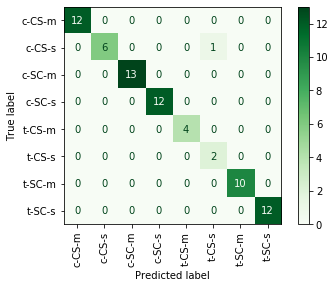

In [81]:
fit= best_clf.fit(X_train,y_train)
y_pre =fit.predict(X_test)
y_pre
cm=confusion_matrix(y_test,y_pre)
print(cm)
plot_confusion_matrix(best_clf, X_test, y_test, xticks_rotation='vertical', cmap=plt.cm.Greens)
print(classification_report(y_test,y_pre))

# Random Forest 

Classifying by class. First testing the random forest classifier with default parameters. 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
[[37  0  0  0  0  0  0  0]
 [ 2 37  0  0  0  0  0  0]
 [ 0  0 42  1  0  0  0  0]
 [ 0  0  0 44  0  0  0  0]
 [ 0  7  0  0 43  0  0  0]
 [ 0  0  0  0  0 34  0  0]
 [ 0  0  1  0  0  0 34  0]
 [ 0  0  0  0  0  0  0 42]]
              precision    recall  f1-score   support

      c-CS-m       0.95      1.00      0.97        37
      c-CS-s       0.84      0.95      0.89        39
      c-SC-m       0.98      0.98      0.98        43
      c-SC-s       

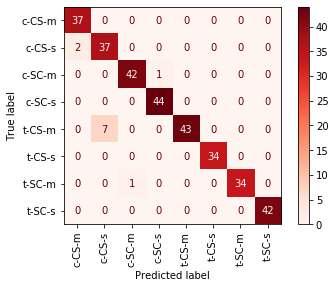

In [82]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(Mice_data,Mice_target,test_size=0.3,random_state=0)

clf =RandomForestClassifier()
print(clf)
fit = clf.fit(X_train,y_train)
y_pre =fit.predict(X_test)
y_pre
cm=confusion_matrix(y_test,y_pre)
cm
print(cm)
plot_confusion_matrix(clf, X_test, y_test, xticks_rotation='vertical', cmap=plt.cm.Reds)
print(classification_report(y_test,y_pre))

In [83]:
X=Mice_selected
y=Mice_target

Y = label_binarize(y, classes=['c-CS-m', 'c-CS-s', 'c-SC-m','c-SC-s','t-CS-m','t-CS-s','t-SC-m','t-SC-s'])
n_classes = Y.shape[1]
# Split into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=0)

clf = RandomForestClassifier()
fit = clf.fit(X_train,y_train)
#y_pre =fit.predict(X_test)
y_score = clf.fit(X_train, y_train).predict_proba(X_test)

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_score,average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 1.00


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=1.00')

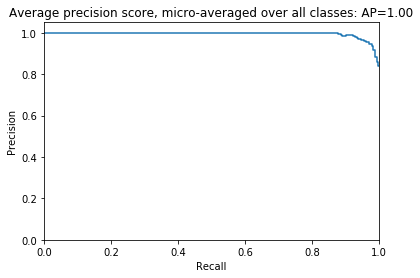

In [84]:
plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision["micro"]))


In [85]:
#run the KFlod cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=15,random_state=4, shuffle=True)

##Instantiatie my chosen model 
clf
print(clf)

for k, (train_index, test_index) in enumerate(kf.split(Mice_selected)):
 
    X_train, X_test = Mice_selected.iloc[train_index], Mice_selected.iloc[test_index]
    y_train, y_test = Mice_target.iloc[train_index], Mice_target.iloc[test_index]
     
    clf.fit(X_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))
    
print("Fold,Mean ",k, clf.score(X_test, y_test).mean())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
[fold 0] score: 0.98611
[fold 1] score: 1.00000
[fold 2] score: 1.00000
[fold 3] score: 0.95833
[fold 4] score: 1.00000
[fold 5] score: 1.00000
[fold 6] score: 0.98611
[fold 7] score: 1.00000
[fold 8] score: 1.00000
[fold 9] score: 1.00000
[fold 10] score: 1.00000
[fold 11] score: 0.98611
[fold 12] score: 0.97222
[fold 13] score: 1.00000
[fold 14] score: 0.98611
Fold,Mean  14 0.9861111111111112


Increasing the number of estimators in order to produce more decision trees. 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
[[37  0  0  0  0  0  0  0]
 [ 2 37  0  0  0  0  0  0]
 [ 0  0 43  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0]
 [ 0  4  0  0 46  0  0  0]
 [ 0  0  0  0  0 34  0  0]
 [ 0  0  2  0  0  0 33  0]
 [ 0  0  0  0  0  0  0 42]]
              precision    recall  f1-score   support

      c-CS-m       0.95      1.00      0.97        37
      c-CS-s       0.90      0.95      0.92        39
      c-SC-m       0.96      1.00      0.98        43
      c-SC-s      

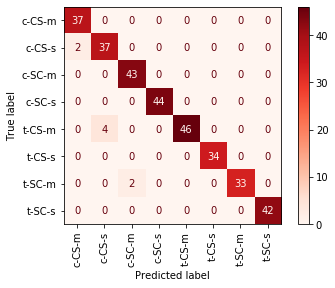

In [86]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(Mice_data,Mice_target,test_size=0.3,random_state=0)

clf = RandomForestClassifier(n_estimators=1000)
print(clf)
fit = clf.fit(X_train,y_train)
y_pre =fit.predict(X_test)
y_pre
cm=confusion_matrix(y_test,y_pre)
cm
print(cm)
plot_confusion_matrix(clf, X_test, y_test, xticks_rotation='vertical', cmap=plt.cm.Reds)
print(classification_report(y_test,y_pre))

In [87]:
X=Mice_selected
y=Mice_target

Y = label_binarize(y, classes=['c-CS-m', 'c-CS-s', 'c-SC-m','c-SC-s','t-CS-m','t-CS-s','t-SC-m','t-SC-s'])
n_classes = Y.shape[1]
# Split into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=0)

clf = clf 
fit = clf.fit(X_train,y_train)
#y_pre =fit.predict(X_test)
y_score = clf.fit(X_train, y_train).predict_proba(X_test)

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_score,average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 1.00


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=1.00')

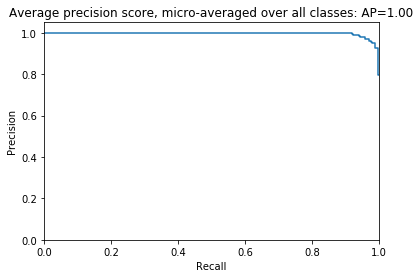

In [88]:
plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision["micro"]))


In [89]:
#run the KFlod cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=15,random_state=4, shuffle=True)

##Instantiatie my chosen model 
clf
print(clf)

for k, (train_index, test_index) in enumerate(kf.split(Mice_selected)):
 
    X_train, X_test = Mice_selected.iloc[train_index], Mice_selected.iloc[test_index]
    y_train, y_test = Mice_target.iloc[train_index], Mice_target.iloc[test_index]
     
    clf.fit(X_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))
    
print("Fold,Mean ",k, clf.score(X_test, y_test).mean())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
[fold 0] score: 1.00000
[fold 1] score: 1.00000
[fold 2] score: 1.00000
[fold 3] score: 0.98611
[fold 4] score: 1.00000
[fold 5] score: 1.00000
[fold 6] score: 1.00000
[fold 7] score: 1.00000
[fold 8] score: 1.00000
[fold 9] score: 1.00000
[fold 10] score: 1.00000
[fold 11] score: 1.00000
[fold 12] score: 1.00000
[fold 13] score: 1.00000
[fold 14] score: 1.00000
Fold,Mean  14 1.0


Could this be extremely overfitted? Potentially attempt to reduce the max depth and search through 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
[[32  5  0  0  0  0  0  0]
 [ 5 34  0  0  0  0  0  0]
 [ 0  0 38  4  0  0  1  0]
 [ 0  0  0 44  0  0  0  0]
 [ 0 10  0  0 40  0  0  0]
 [ 1  0  0  0  0 33  0  0]
 [ 0  0  2  0  0  0 33  0]
 [ 0  0  0  0  0  0  0 42]]
              precision    recall  f1-score   support

      c-CS-m       0.84      0.86      0.85        37
      c-CS-s       0.69      0.87      0.77        39
      c-SC-m       0.95      0.88      0.92        43
      c-SC-s       0.

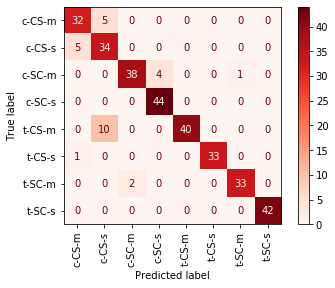

In [90]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(Mice_data,Mice_target,test_size=0.3,random_state=0)

clf =clf = RandomForestClassifier(max_depth=5, n_estimators=1000)
print(clf)
fit = clf.fit(X_train,y_train)
y_pre =fit.predict(X_test)
y_pre
cm=confusion_matrix(y_test,y_pre)
cm
print(cm)
plot_confusion_matrix(clf, X_test, y_test, xticks_rotation='vertical', cmap=plt.cm.Reds)
print(classification_report(y_test,y_pre))

In [91]:
X=Mice_selected
y=Mice_target

Y = label_binarize(y, classes=['c-CS-m', 'c-CS-s', 'c-SC-m','c-SC-s','t-CS-m','t-CS-s','t-SC-m','t-SC-s'])
n_classes = Y.shape[1]
# Split into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=0)

clf = clf 
fit = clf.fit(X_train,y_train)
#y_pre =fit.predict(X_test)
y_score = clf.fit(X_train, y_train).predict_proba(X_test)

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_score,average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.96


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.96')

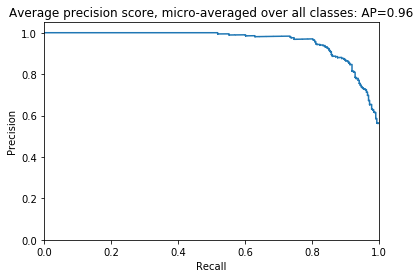

In [92]:
plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision["micro"]))


In [93]:
#run the KFlod cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=15,random_state=4, shuffle=True)

##Instantiatie my chosen model 
clf
print(clf)

for k, (train_index, test_index) in enumerate(kf.split(Mice_selected)):
 
    X_train, X_test = Mice_selected.iloc[train_index], Mice_selected.iloc[test_index]
    y_train, y_test = Mice_target.iloc[train_index], Mice_target.iloc[test_index]
     
    clf.fit(X_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))
    
print("Fold,Mean ",k, clf.score(X_test, y_test).mean())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
[fold 0] score: 0.93056
[fold 1] score: 0.87500
[fold 2] score: 0.90278
[fold 3] score: 0.91667
[fold 4] score: 0.95833
[fold 5] score: 0.97222
[fold 6] score: 0.95833
[fold 7] score: 0.94444
[fold 8] score: 0.84722
[fold 9] score: 0.91667
[fold 10] score: 0.94444
[fold 11] score: 0.90278
[fold 12] score: 0.91667
[fold 13] score: 0.93056
[fold 14] score: 0.93056
Fold,Mean  14 0.9305555555555556


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
[[37  0  0  0  0  0  0  0]
 [ 2 37  0  0  0  0  0  0]
 [ 0  0 43  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0]
 [ 0  6  0  0 44  0  0  0]
 [ 0  0  0  0  0 34  0  0]
 [ 0  0  2  0  0  0 33  0]
 [ 0  0  0  0  0  0  0 42]]
              precision    recall  f1-score   support

      c-CS-m       0.95      1.00      0.97        37
      c-CS-s       0.86      0.95      0.90        39
      c-SC-m       0.96      1.00      0.98        43
      c-SC-s       1

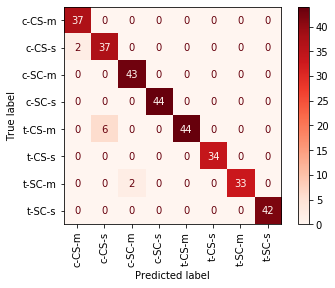

In [94]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(Mice_data,Mice_target,test_size=0.3,random_state=0)

clf =clf = RandomForestClassifier(max_depth=10, n_estimators=1000)
print(clf)
fit = clf.fit(X_train,y_train)
y_pre =fit.predict(X_test)
y_pre
cm=confusion_matrix(y_test,y_pre)
cm
print(cm)
plot_confusion_matrix(clf, X_test, y_test, xticks_rotation='vertical', cmap=plt.cm.Reds)
print(classification_report(y_test,y_pre))

In [95]:
X=Mice_selected
y=Mice_target

Y = label_binarize(y, classes=['c-CS-m', 'c-CS-s', 'c-SC-m','c-SC-s','t-CS-m','t-CS-s','t-SC-m','t-SC-s'])
n_classes = Y.shape[1]
# Split into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=0)

clf = clf 
fit = clf.fit(X_train,y_train)
#y_pre =fit.predict(X_test)
y_score = clf.fit(X_train, y_train).predict_proba(X_test)

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_score,average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 1.00


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=1.00')

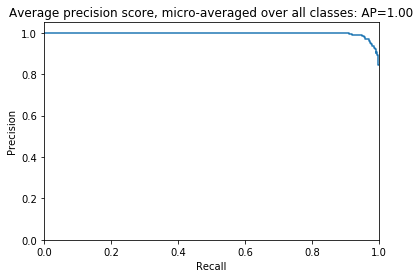

In [96]:
plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision["micro"]))


In [97]:
#run the KFlod cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=15,random_state=4, shuffle=True)

##Instantiatie my chosen model 
clf
print(clf)

for k, (train_index, test_index) in enumerate(kf.split(Mice_selected)):
 
    X_train, X_test = Mice_selected.iloc[train_index], Mice_selected.iloc[test_index]
    y_train, y_test = Mice_target.iloc[train_index], Mice_target.iloc[test_index]
     
    clf.fit(X_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))
    
print("Fold,Mean ",k, clf.score(X_test, y_test).mean())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
[fold 0] score: 1.00000
[fold 1] score: 1.00000
[fold 2] score: 1.00000
[fold 3] score: 0.98611
[fold 4] score: 1.00000
[fold 5] score: 1.00000
[fold 6] score: 1.00000
[fold 7] score: 1.00000
[fold 8] score: 1.00000
[fold 9] score: 1.00000
[fold 10] score: 1.00000
[fold 11] score: 1.00000
[fold 12] score: 1.00000
[fold 13] score: 1.00000
[fold 14] score: 1.00000
Fold,Mean  14 1.0


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=11, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
[[37  0  0  0  0  0  0  0]
 [ 2 37  0  0  0  0  0  0]
 [ 0  0 43  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0]
 [ 0  5  0  0 45  0  0  0]
 [ 0  0  0  0  0 34  0  0]
 [ 0  0  1  0  0  0 34  0]
 [ 0  0  0  0  0  0  0 42]]
              precision    recall  f1-score   support

      c-CS-m       0.95      1.00      0.97        37
      c-CS-s       0.88      0.95      0.91        39
      c-SC-m       0.98      1.00      0.99        43
      c-SC-s       1

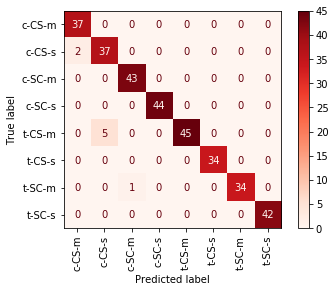

In [98]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(Mice_data,Mice_target,test_size=0.3,random_state=0)

clf =clf = RandomForestClassifier(max_depth=11, n_estimators=1000)
print(clf)
fit = clf.fit(X_train,y_train)
y_pre =fit.predict(X_test)
y_pre
cm=confusion_matrix(y_test,y_pre)
cm
print(cm)
plot_confusion_matrix(clf, X_test, y_test, xticks_rotation='vertical', cmap=plt.cm.Reds)
print(classification_report(y_test,y_pre))

In [99]:
X=Mice_selected
y=Mice_target

Y = label_binarize(y, classes=['c-CS-m', 'c-CS-s', 'c-SC-m','c-SC-s','t-CS-m','t-CS-s','t-SC-m','t-SC-s'])
n_classes = Y.shape[1]
# Split into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=0)

clf = clf 
fit = clf.fit(X_train,y_train)
#y_pre =fit.predict(X_test)
y_score = clf.fit(X_train, y_train).predict_proba(X_test)

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_score,average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 1.00


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=1.00')

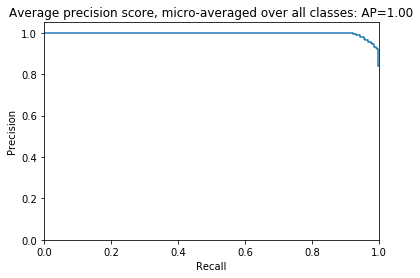

In [100]:
plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision["micro"]))


In [101]:
#run the KFlod cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=15,random_state=4, shuffle=True)

##Instantiatie my chosen model 
clf
print(clf)

for k, (train_index, test_index) in enumerate(kf.split(Mice_selected)):
 
    X_train, X_test = Mice_selected.iloc[train_index], Mice_selected.iloc[test_index]
    y_train, y_test = Mice_target.iloc[train_index], Mice_target.iloc[test_index]
     
    clf.fit(X_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))
    
print("Fold,Mean ",k, clf.score(X_test, y_test).mean())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=11, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
[fold 0] score: 1.00000
[fold 1] score: 1.00000
[fold 2] score: 1.00000
[fold 3] score: 0.98611
[fold 4] score: 1.00000
[fold 5] score: 1.00000
[fold 6] score: 1.00000
[fold 7] score: 1.00000
[fold 8] score: 1.00000
[fold 9] score: 1.00000
[fold 10] score: 1.00000
[fold 11] score: 1.00000
[fold 12] score: 1.00000
[fold 13] score: 1.00000
[fold 14] score: 1.00000
Fold,Mean  14 1.0


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
[[37  0  0  0  0  0  0  0]
 [ 2 37  0  0  0  0  0  0]
 [ 0  0 43  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0]
 [ 1  3  0  0 46  0  0  0]
 [ 0  0  0  0  0 34  0  0]
 [ 0  0  2  0  0  0 33  0]
 [ 0  0  0  0  0  0  0 42]]
              precision    recall  f1-score   support

      c-CS-m       0.93      1.00      0.96        37
      c-CS-s       0.93      0.95      0.94        39
      c-SC-m       0.96      1.00      0.98        43
      c-SC-s       1

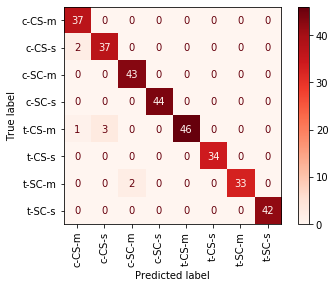

In [102]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(Mice_data,Mice_target,test_size=0.3,random_state=0)

clf =clf = RandomForestClassifier(max_depth=15, n_estimators=1000)
print(clf)
fit = clf.fit(X_train,y_train)
y_pre =fit.predict(X_test)
y_pre
cm=confusion_matrix(y_test,y_pre)
cm
print(cm)
plot_confusion_matrix(clf, X_test, y_test, xticks_rotation='vertical', cmap=plt.cm.Reds)
print(classification_report(y_test,y_pre))

In [103]:
X=Mice_selected
y=Mice_target

Y = label_binarize(y, classes=['c-CS-m', 'c-CS-s', 'c-SC-m','c-SC-s','t-CS-m','t-CS-s','t-SC-m','t-SC-s'])
n_classes = Y.shape[1]
# Split into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=0)

clf = clf 
fit = clf.fit(X_train,y_train)
#y_pre =fit.predict(X_test)
y_score = clf.fit(X_train, y_train).predict_proba(X_test)

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_score,average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 1.00


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=1.00')

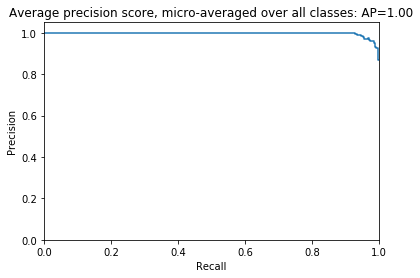

In [104]:
plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision["micro"]))


In [105]:
#run the KFlod cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=15,random_state=4, shuffle=True)

##Instantiatie my chosen model 
clf
print(clf)

for k, (train_index, test_index) in enumerate(kf.split(Mice_selected)):
 
    X_train, X_test = Mice_selected.iloc[train_index], Mice_selected.iloc[test_index]
    y_train, y_test = Mice_target.iloc[train_index], Mice_target.iloc[test_index]
     
    clf.fit(X_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test)))
    
print("Fold,Mean ",k, clf.score(X_test, y_test).mean())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
[fold 0] score: 1.00000
[fold 1] score: 1.00000
[fold 2] score: 1.00000
[fold 3] score: 0.98611
[fold 4] score: 1.00000
[fold 5] score: 1.00000
[fold 6] score: 1.00000
[fold 7] score: 1.00000
[fold 8] score: 1.00000
[fold 9] score: 1.00000
[fold 10] score: 1.00000
[fold 11] score: 1.00000
[fold 12] score: 1.00000
[fold 13] score: 1.00000
[fold 14] score: 1.00000
Fold,Mean  14 1.0


Text(0, 0.5, 'Proteins')

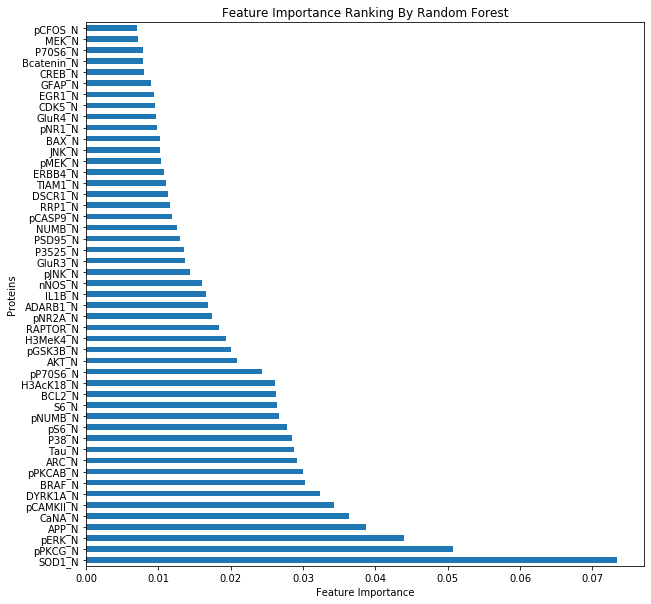

In [107]:
rf_feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
rf_feat_importances.nlargest(50).plot(kind='barh', figsize=(10,10))
plt.title('Feature Importance Ranking By Random Forest')
plt.xlabel('Feature Importance')
plt.ylabel('Proteins')

#https://stackoverflow.com/questions/44101458/random-forest-feature-importance-chart-using-python